In [1]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray

In [2]:
data = pd.read_excel("rice_spectral.xlsx")

In [3]:
data.shape
# (781, 1810)

(781, 1810)

In [4]:
data.head()

Unnamed: 0  Wavelength (nm)  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0  SWP (kPa)       350.000000  351.000000  352.000000  353.000000  354.000000   
1      -19.9         0.016877    0.016796    0.016760    0.016760    0.016788   
2      -19.9         0.014826    0.014702    0.014633    0.014610    0.014625   
3      -28.6         0.014441    0.014325    0.014278    0.014287    0.014335   
4      -28.6         0.012784    0.012637    0.012573    0.012573    0.012613   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 1800  \
0  355.000000  356.000000  357.000000  358.000000  ...    2431.000000   
1    0.016836    0.016898    0.016957    0.017015  ...       0.058065   
2    0.014668    0.014717    0.014798    0.014866  ...       0.023010   
3    0.014408    0.014487    0.014530    0.014552  ...       0.062549   
4    0.012672    0.012680    0.012710    0.012693  ...       0.067630   

   Unnamed: 1801  Unnamed: 1802  Unnamed: 1803  Unnamed: 1804  Unnamed: 1805  \
0    2432.000000    2433.000000    2434.000000    2435.000000    2436.000000   
1       0.057079       0.056342       0.056060       0.056115       0.057519   
2       0.021632       0.019577       0.017407       0.015142       0.013117   
3       0.061882       0.061262       0.060912       0.061572       0.061718   
4       0.065857       0.064240       0.063253       0.063218       0.064740   

   Unnamed: 1806  Unnamed: 1807  Unnamed: 1808  Unnamed: 1809  
0    2437.000000    2438.000000    2439.000000    2440.000000  
1       0.059664       0.062520       0.066055       0.070239  
2       0.010861       0.008288       0.005316       0.001860  
3       0.061402       0.060358       0.058323       0.055031  
4       0.066224       0.067124       0.066896       0.064997  

[5 rows x 1810 columns]

In [5]:
img_path = 'sp_1.png'
img = cv2.imread(img_path, 1)

In [6]:
img.shape

(288, 432, 3)

In [7]:
# (288, 432, 3)
# im_rows = 288
# im_cols = 432
im_rows = 432
im_cols = 432

In [8]:
def make_square(im, min_size=256, fill_color=(0, 0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im

In [9]:
def create_training_Data():
    l = 780;
    X_train = np.zeros(shape=[l,im_rows, im_cols, 3]);
    Y_train = np.zeros(shape = [l, 1]);
    # Y_train = np.zeros(l);
    for i in range(1, 781, 1):
        X_data = data.iloc[i]
        X = X_data[1:]
        Y = X_data[0:1]
        fs = 10e3
                   
        fig,ax = plt.subplots(1)
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
        ax.axis('off')
        pxx, freqs, bins, im = ax.specgram(x=X, Fs=fs)
        ax.axis('off')
        fig.savefig('sp_1.png')
        test_image = Image.open('sp_1.png')
        new_image = make_square(test_image)
        
        new_image.save("sp_2.png")
        # im = cv2.imread('sp_2.png')
                   
        img_path = 'sp_2.png'
        img = cv2.imread(img_path, 1)
                   
        X_train[i-1,:,:,:] = img
        Y_train[i-1, 0] = -Y
        # Y_train[i-1, 1] = 0.0
        
    return {'X_Train' : X_train, 'Y_Train': Y_train};

C:\Users\Nikhil\anaconda3\envs\data-science\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
C:\Users\Nikhil\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


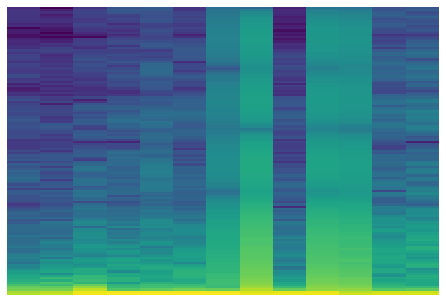

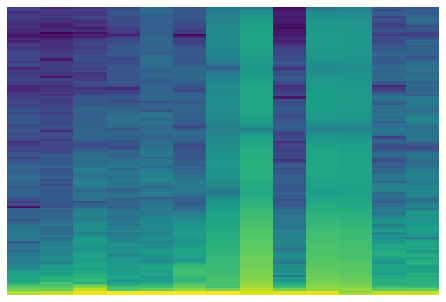

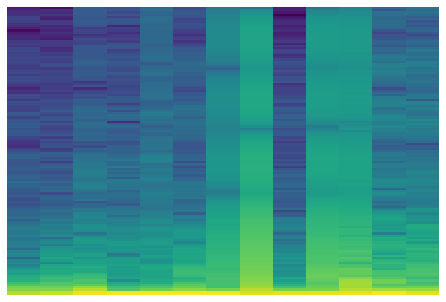

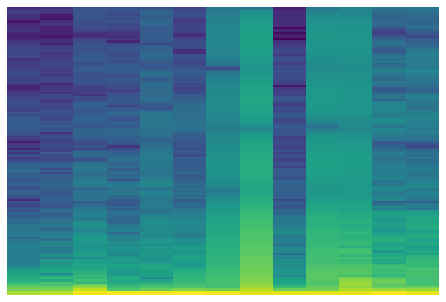

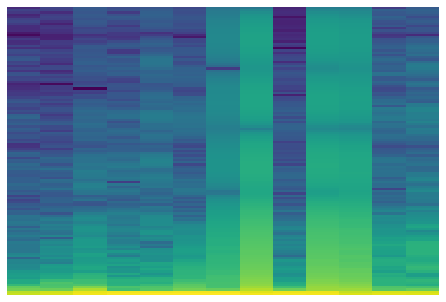

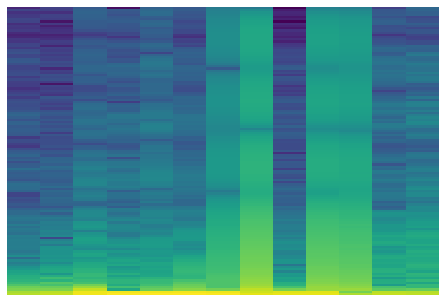

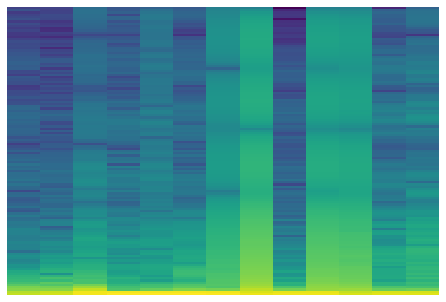

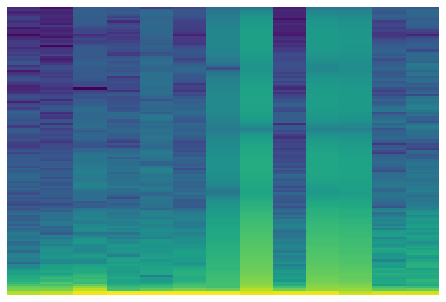

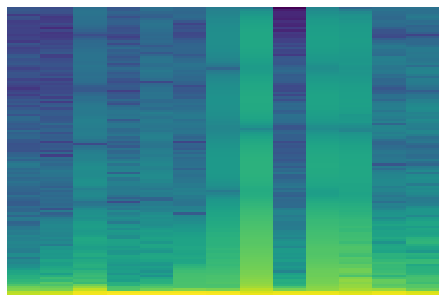

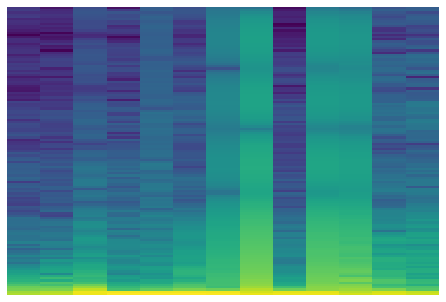

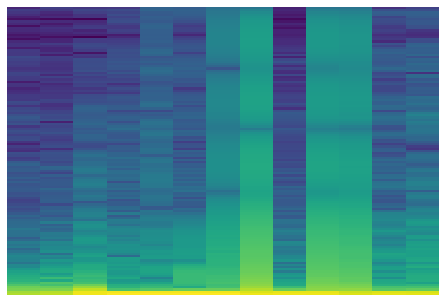

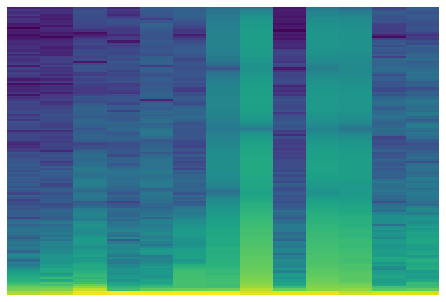

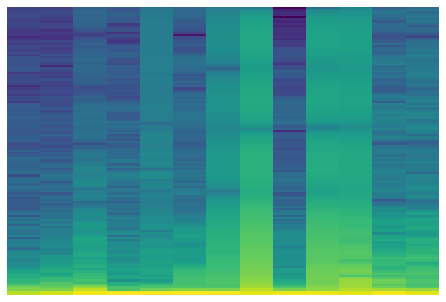

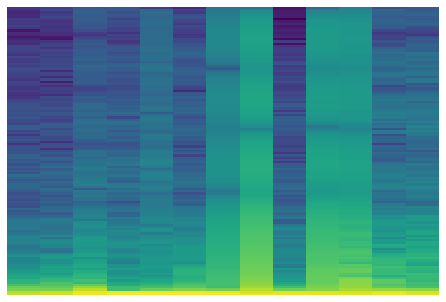

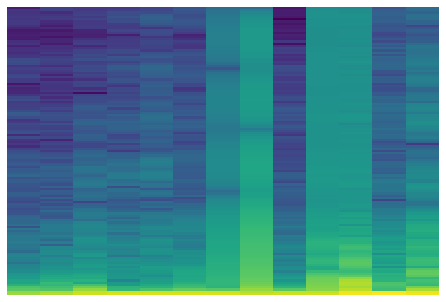

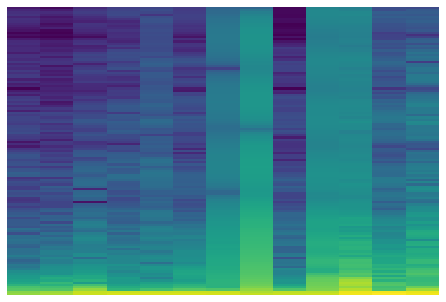

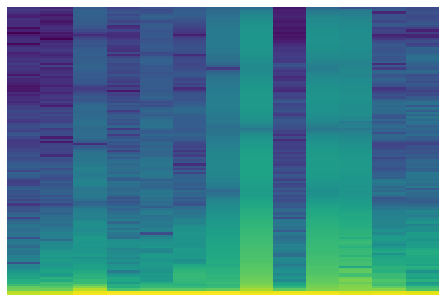

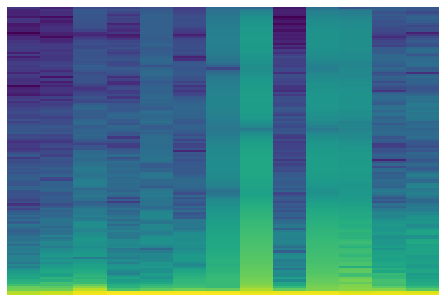

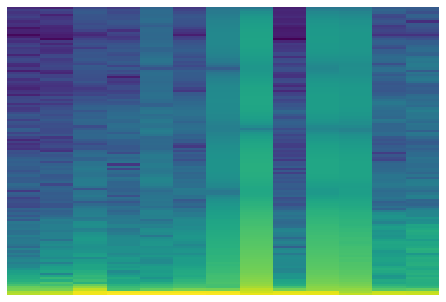

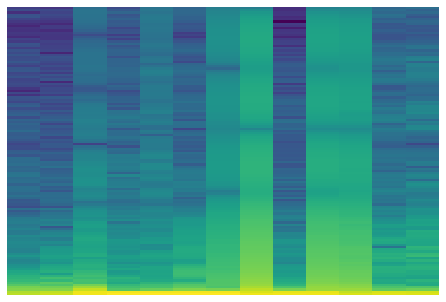

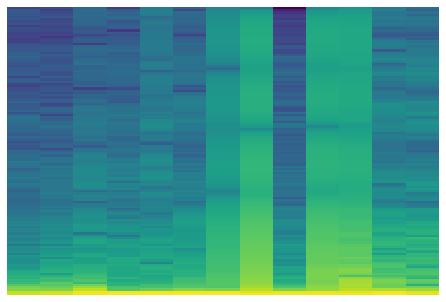

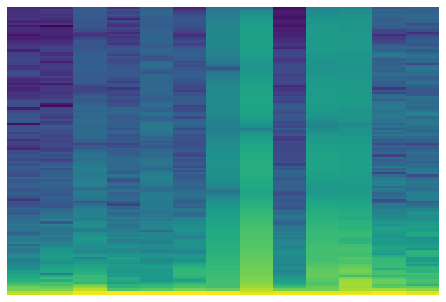

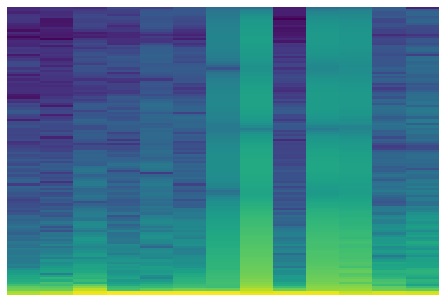

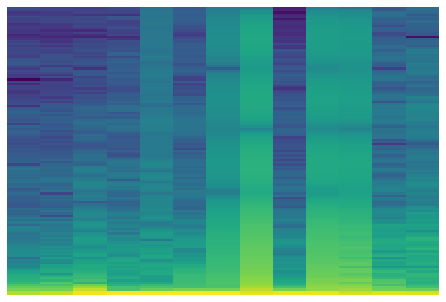

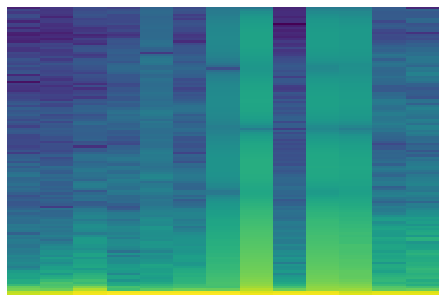

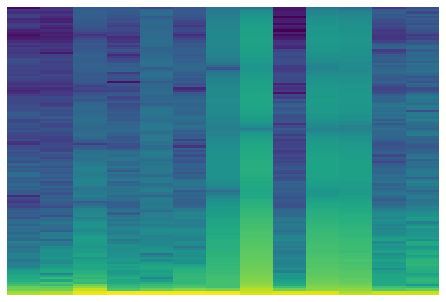

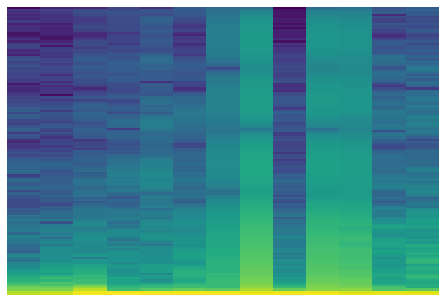

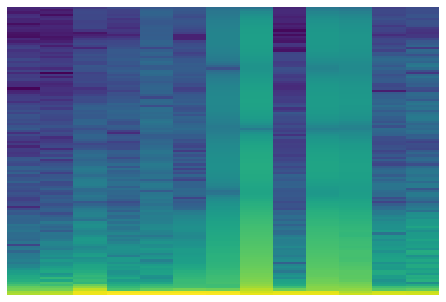

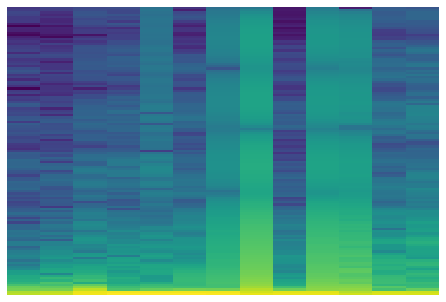

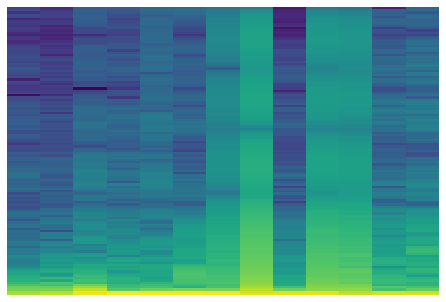

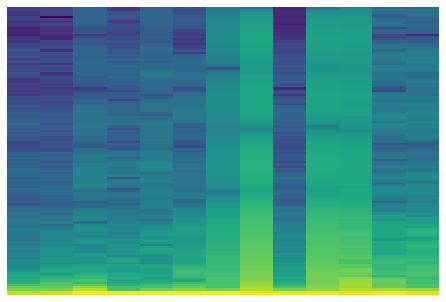

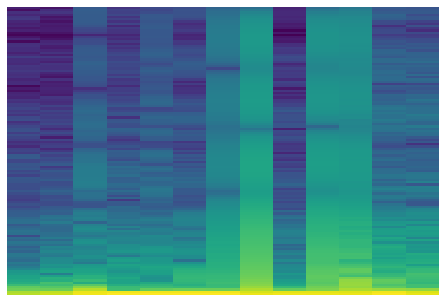

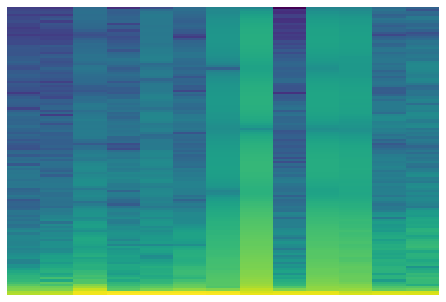

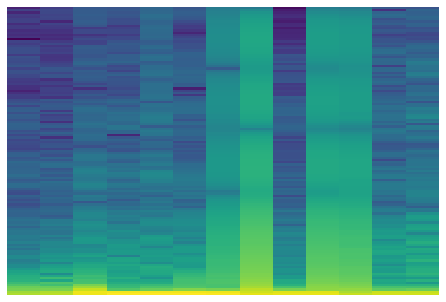

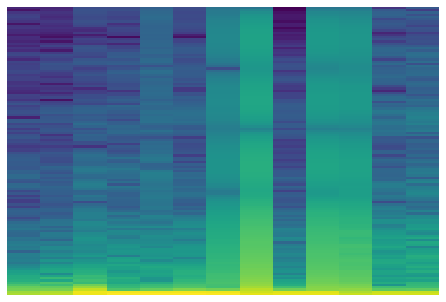

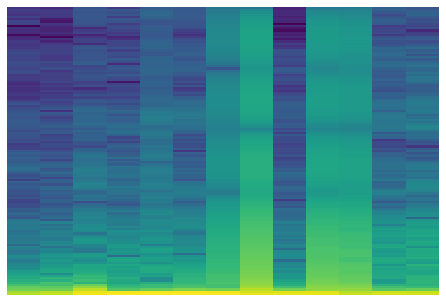

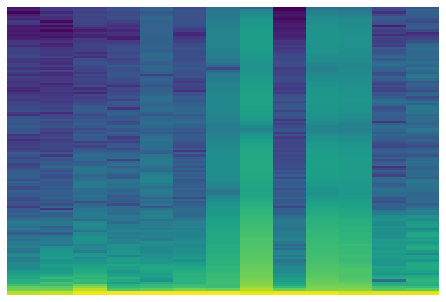

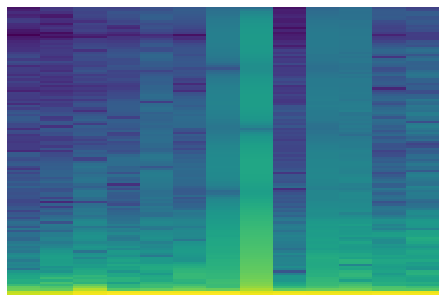

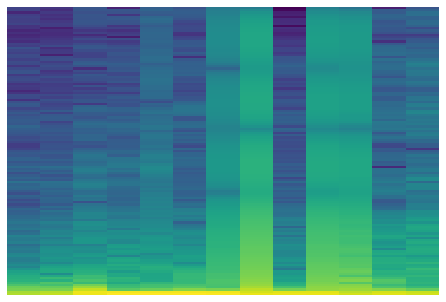

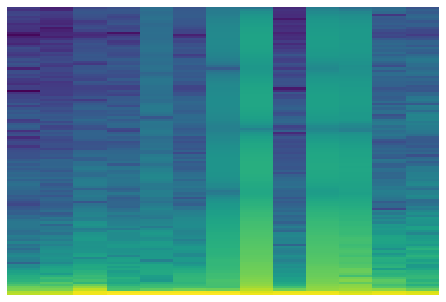

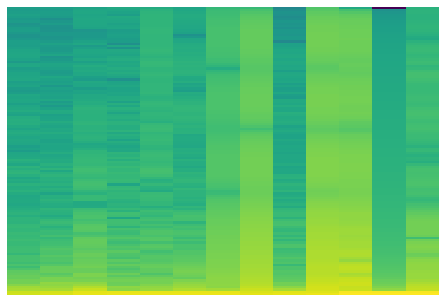

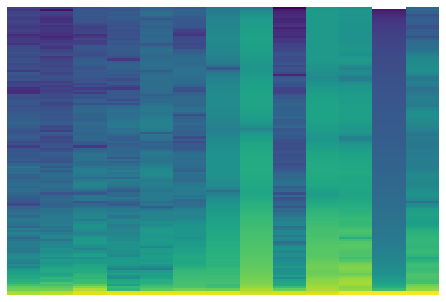

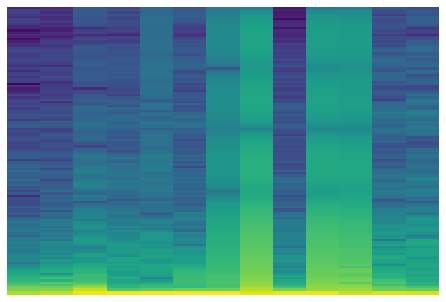

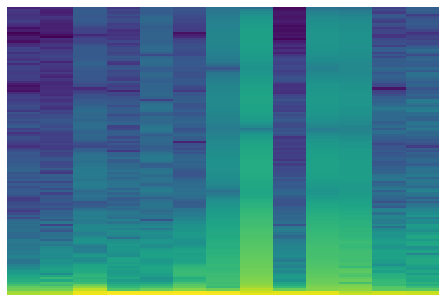

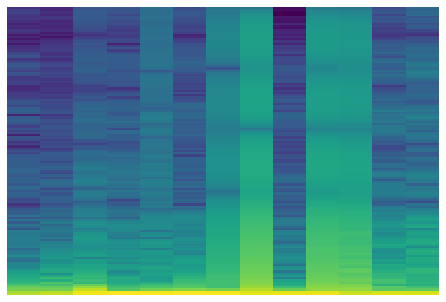

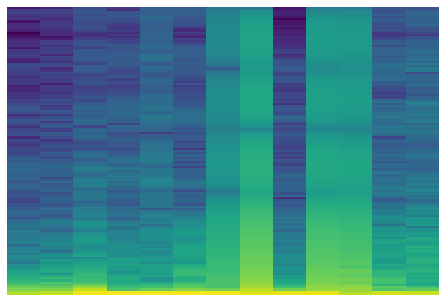

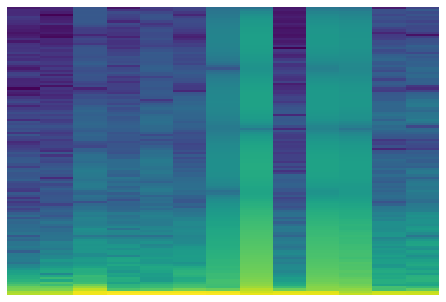

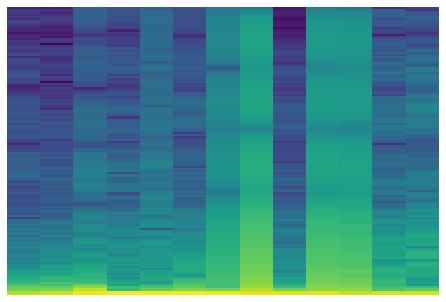

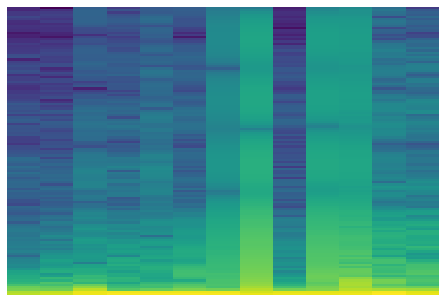

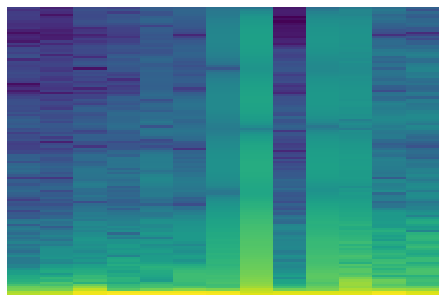

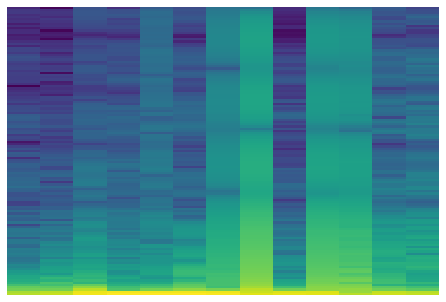

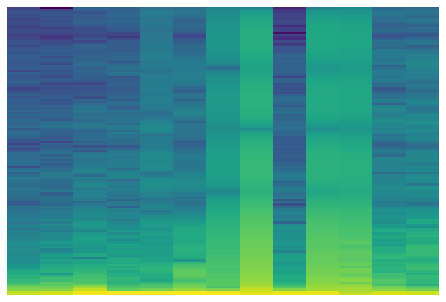

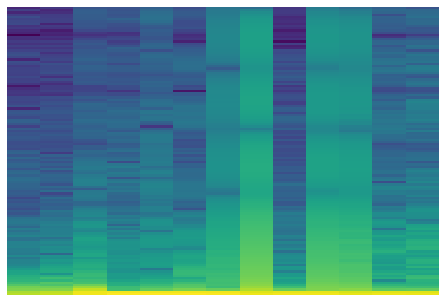

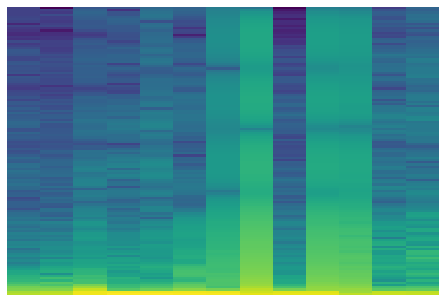

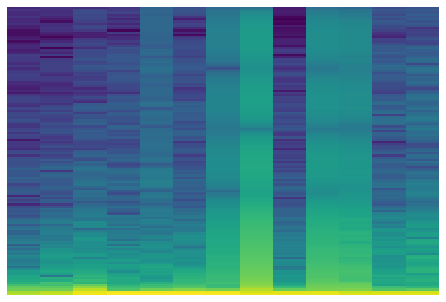

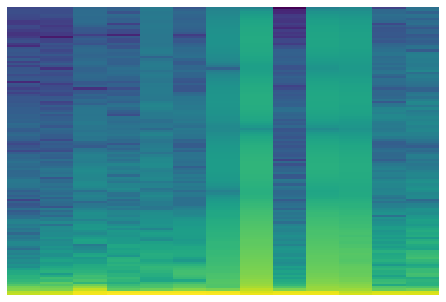

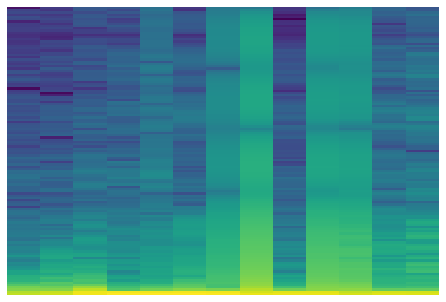

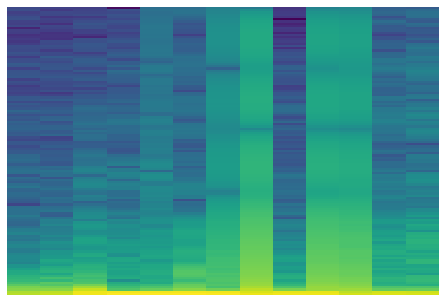

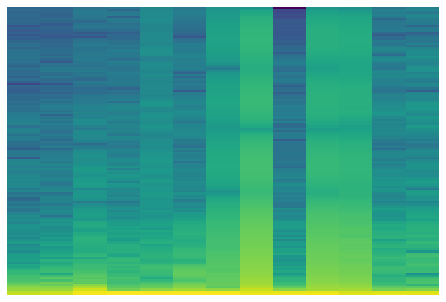

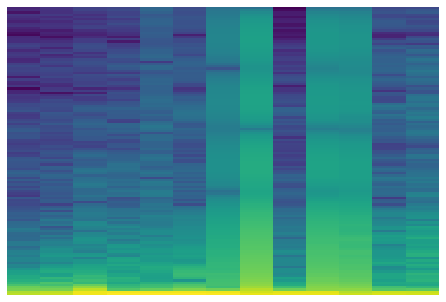

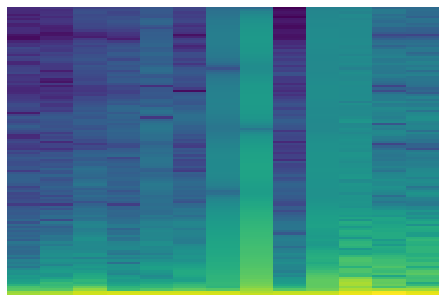

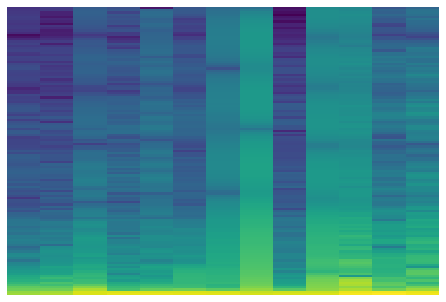

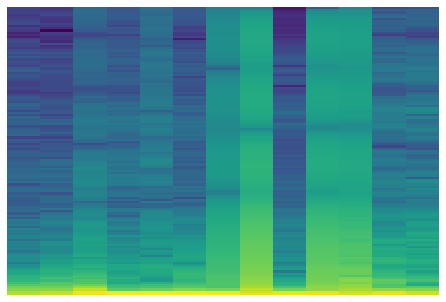

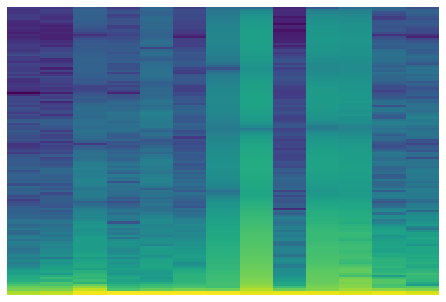

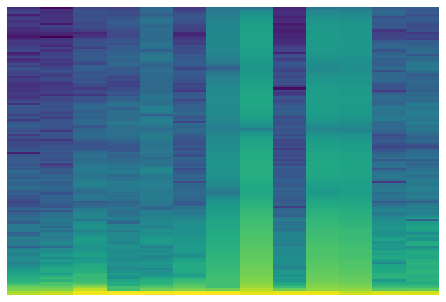

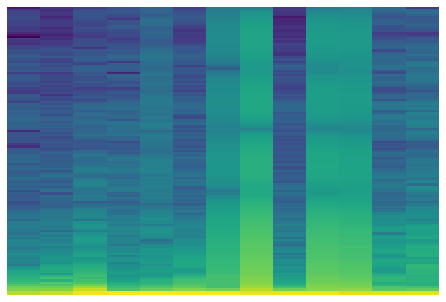

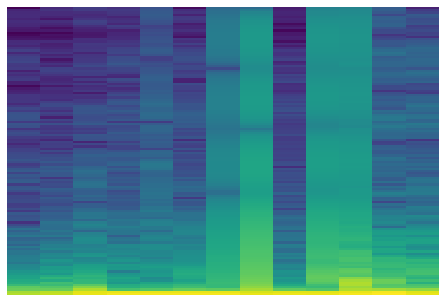

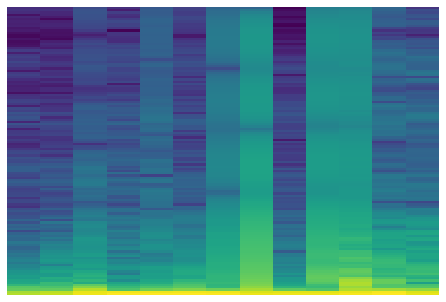

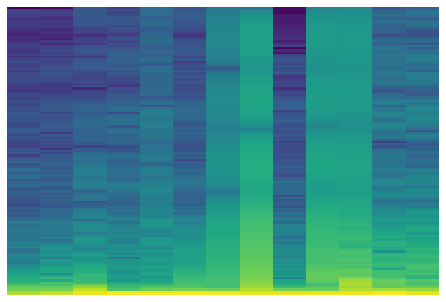

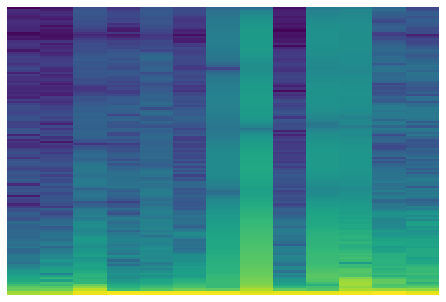

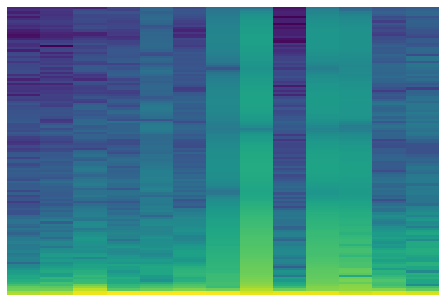

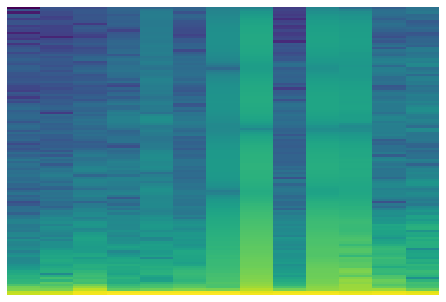

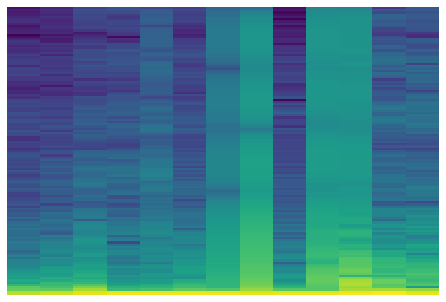

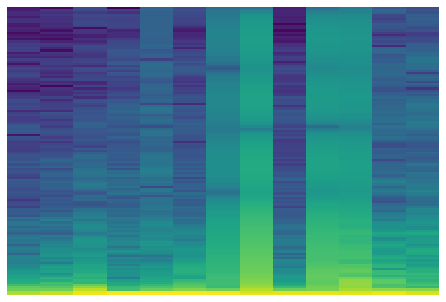

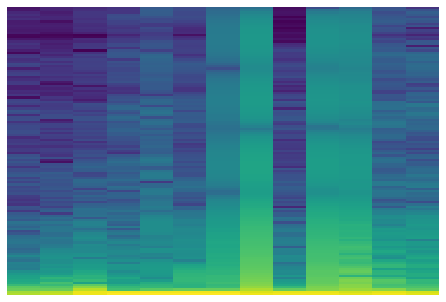

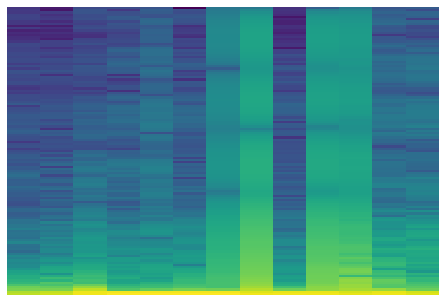

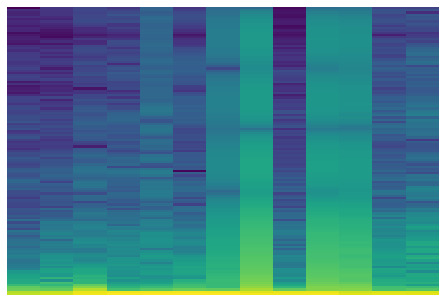

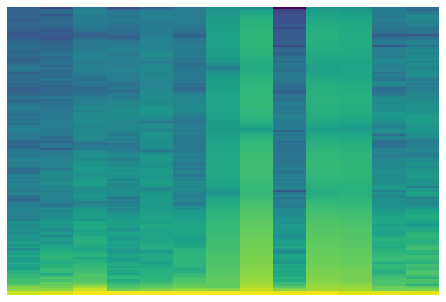

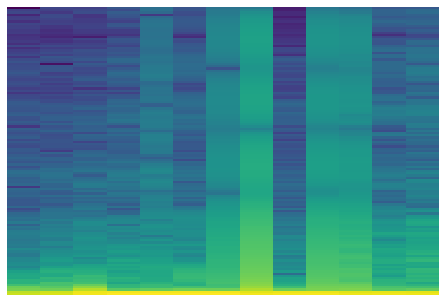

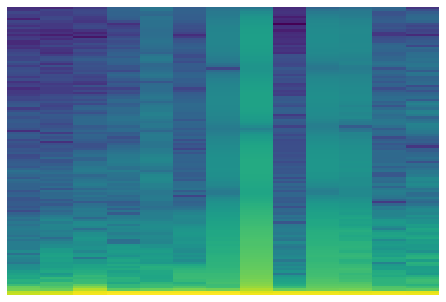

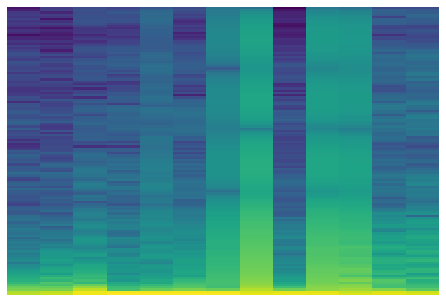

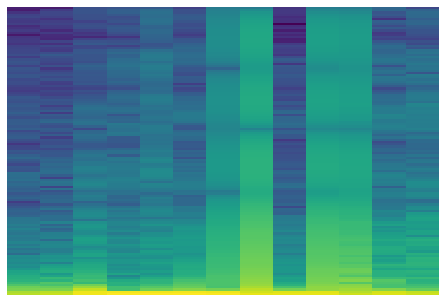

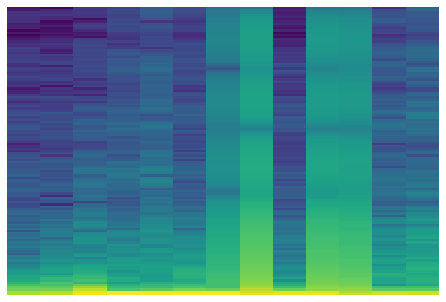

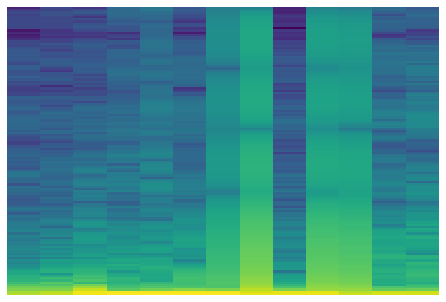

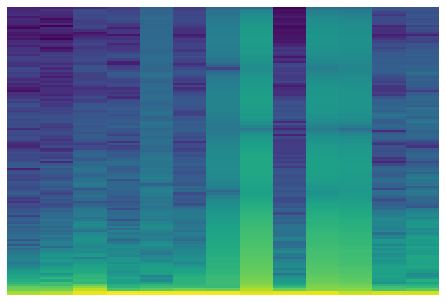

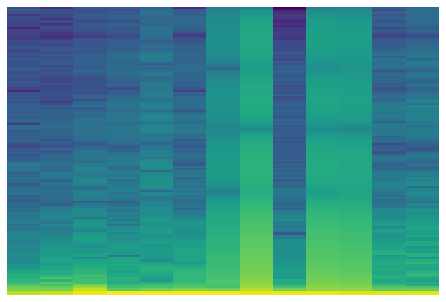

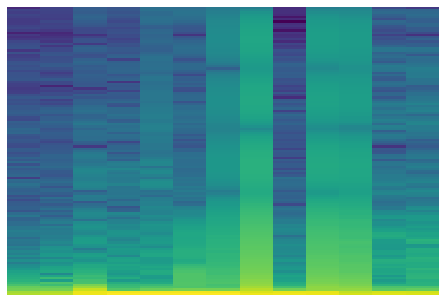

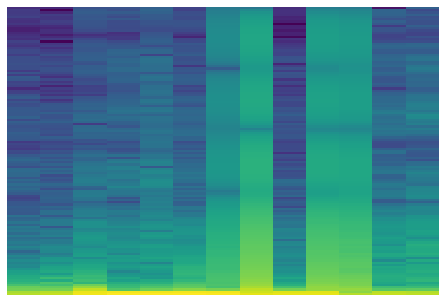

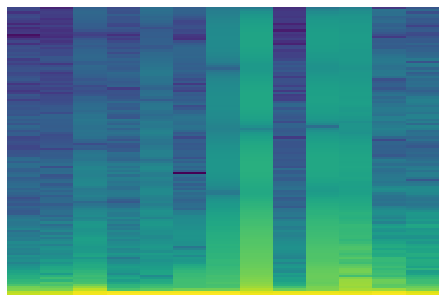

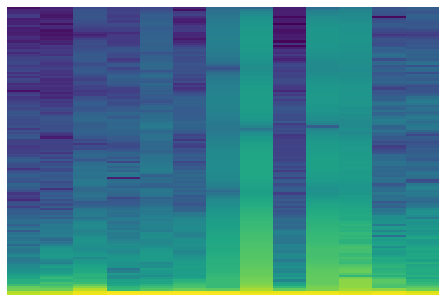

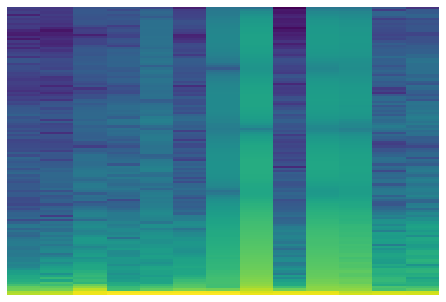

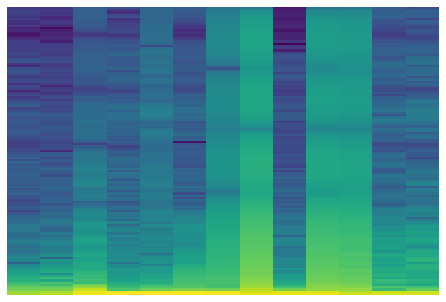

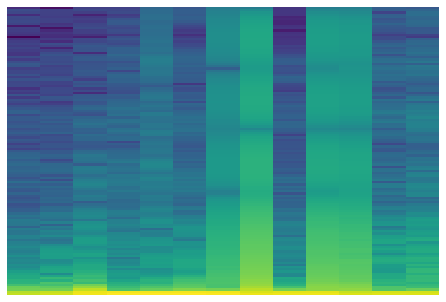

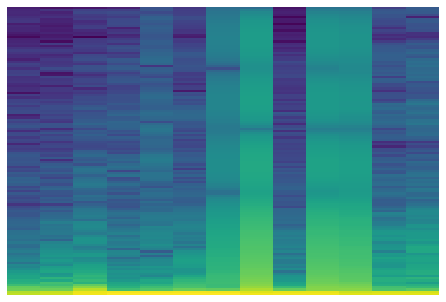

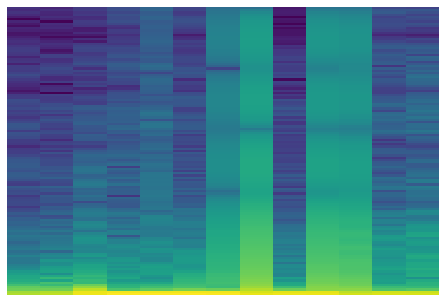

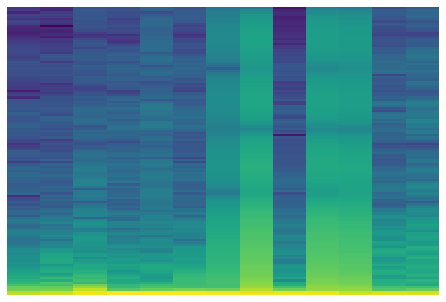

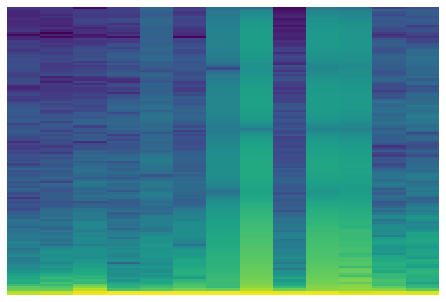

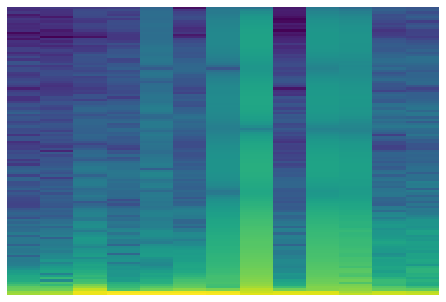

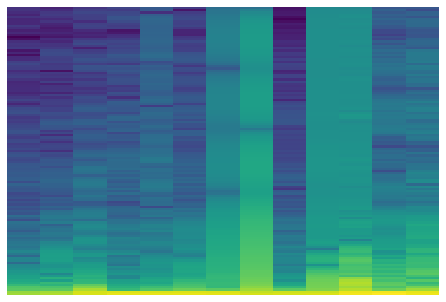

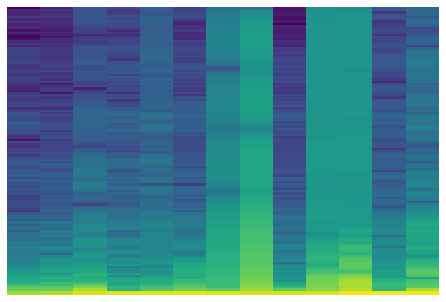

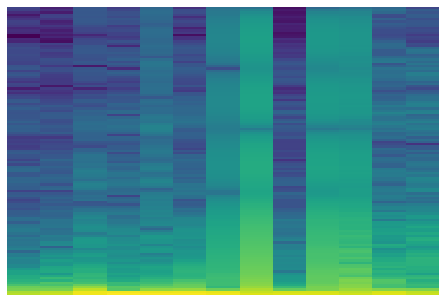

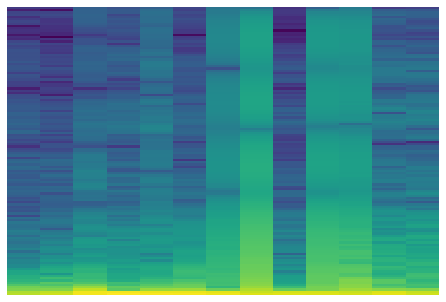

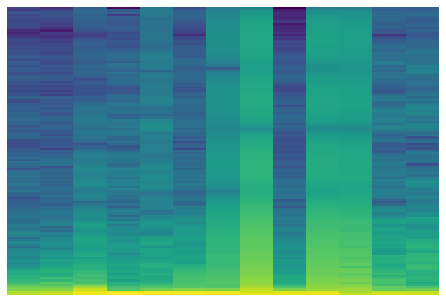

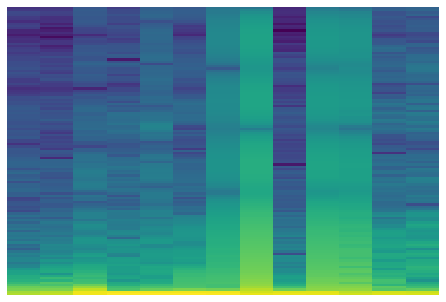

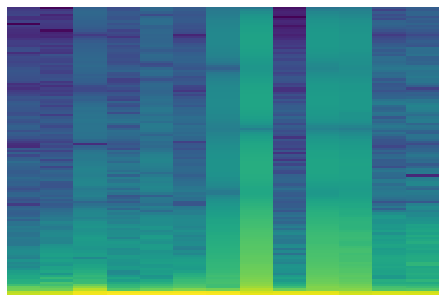

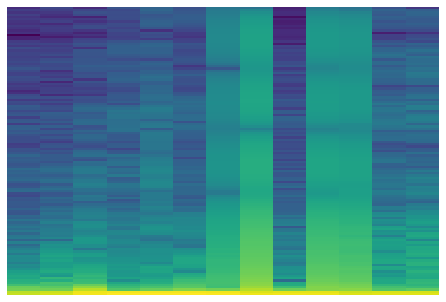

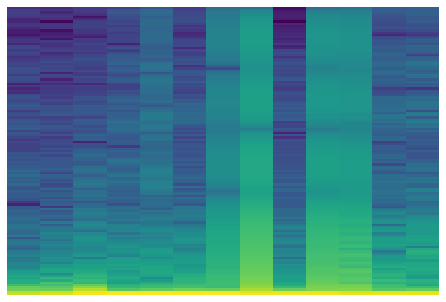

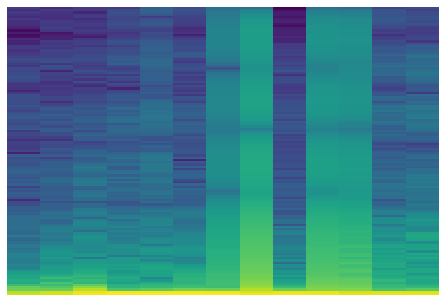

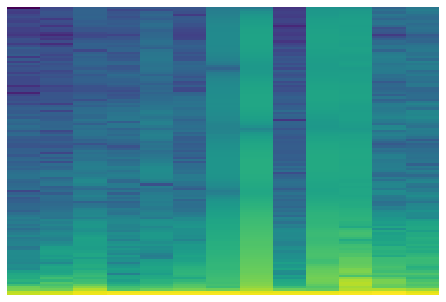

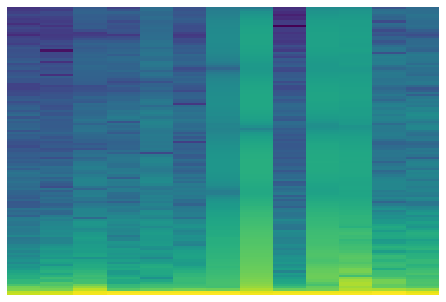

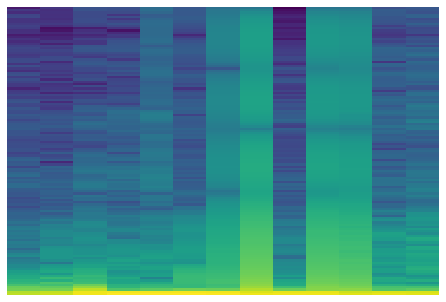

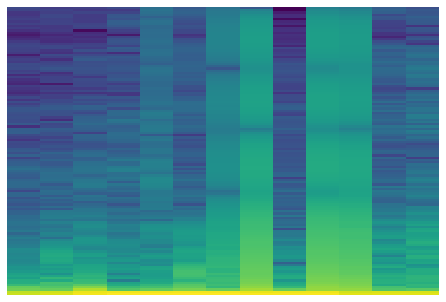

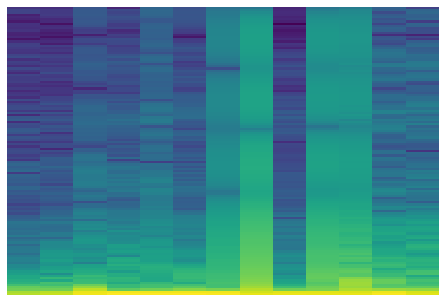

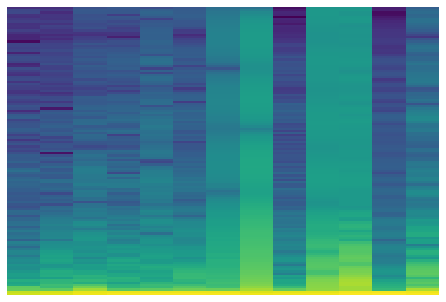

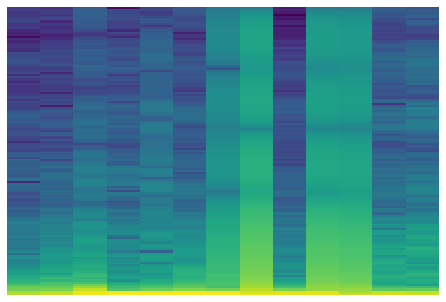

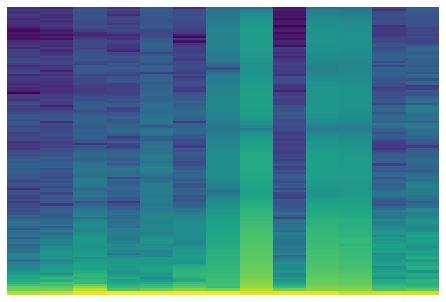

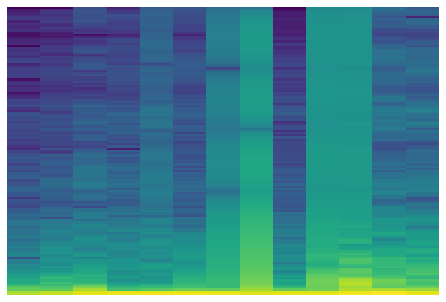

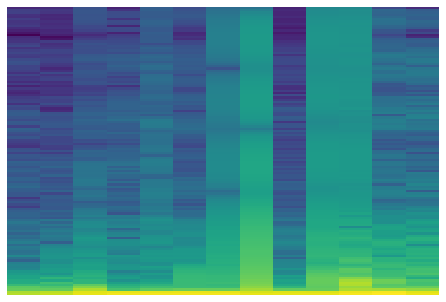

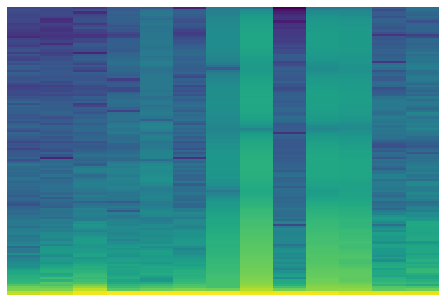

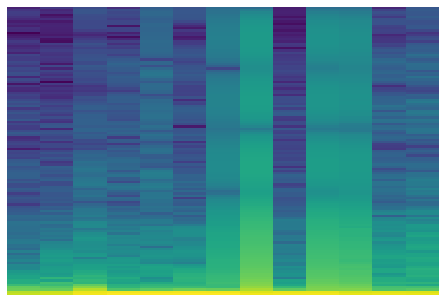

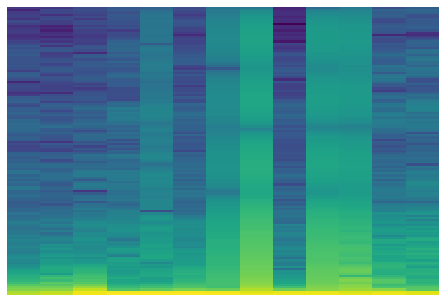

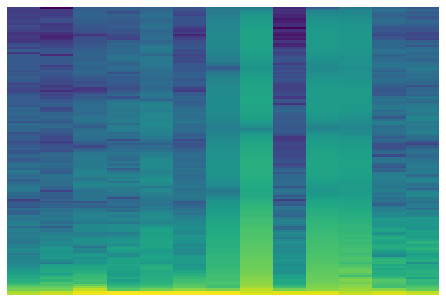

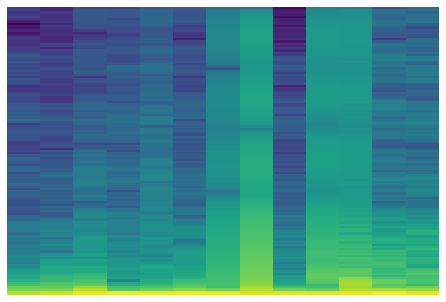

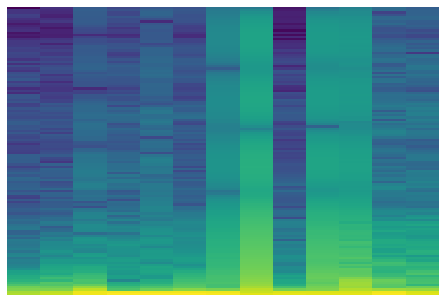

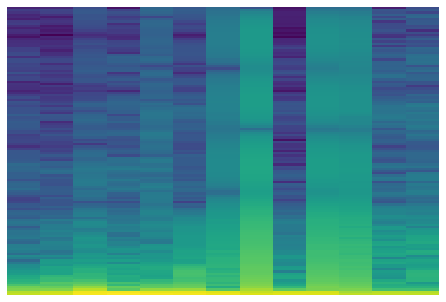

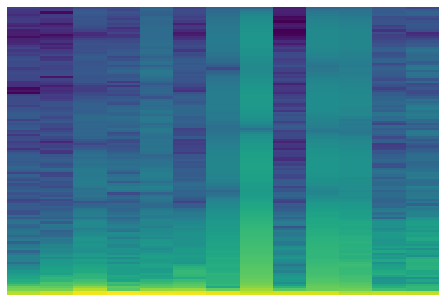

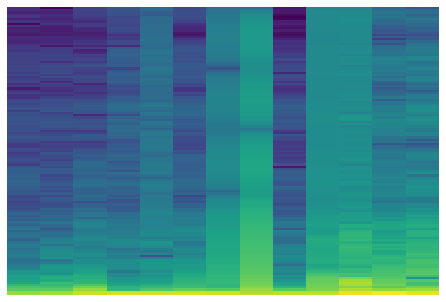

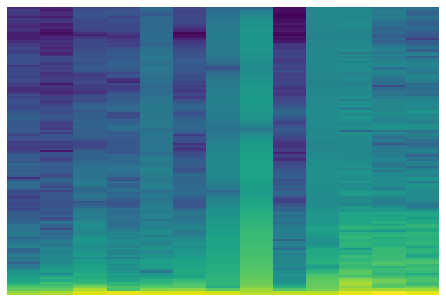

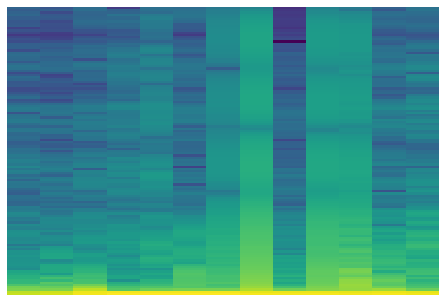

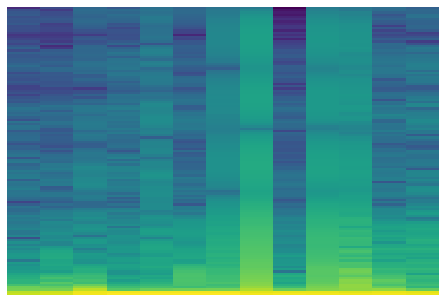

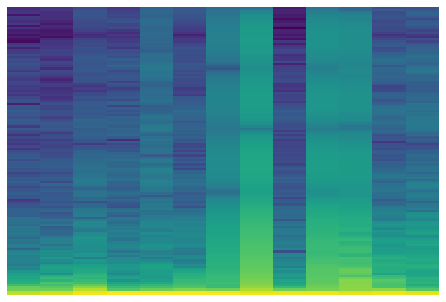

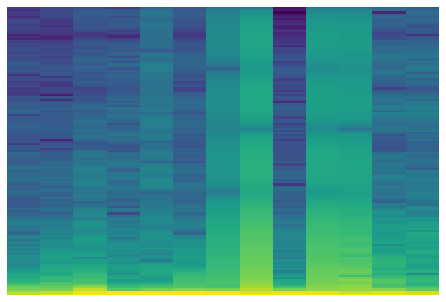

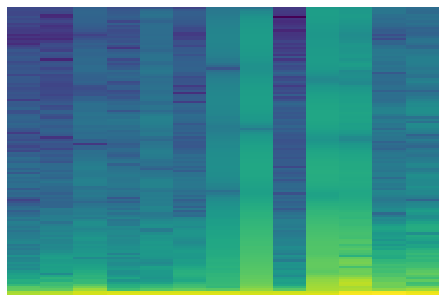

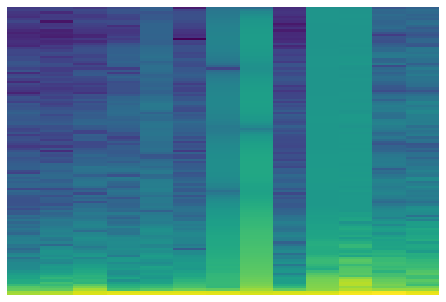

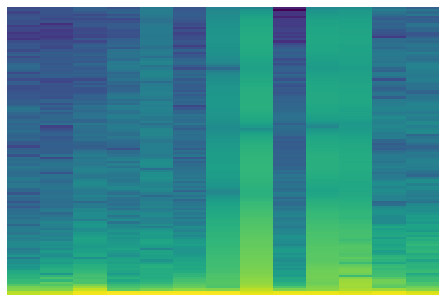

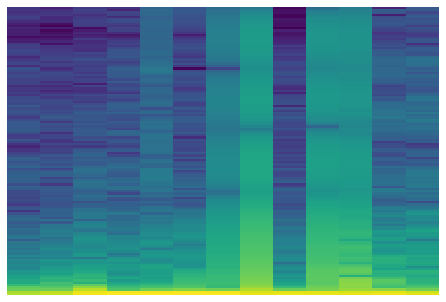

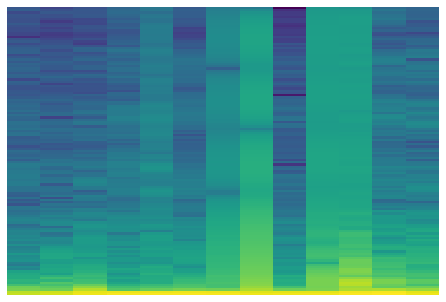

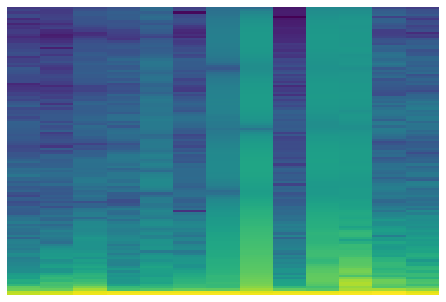

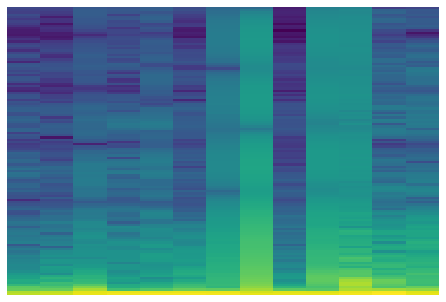

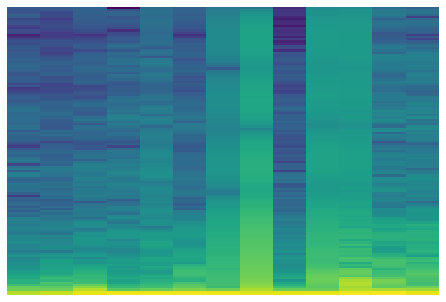

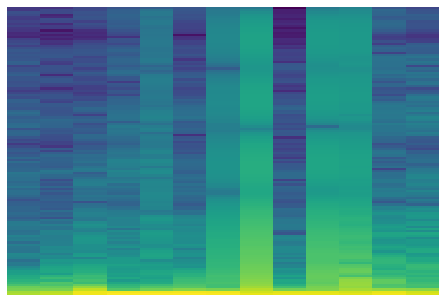

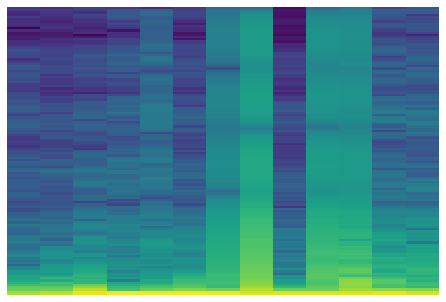

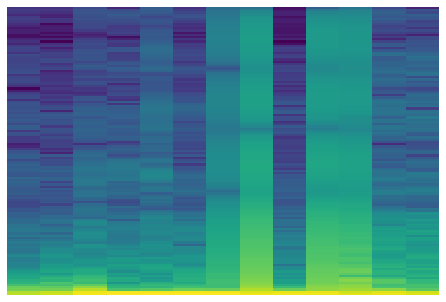

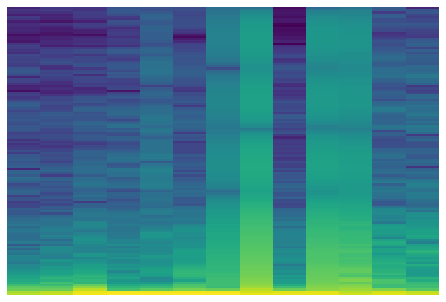

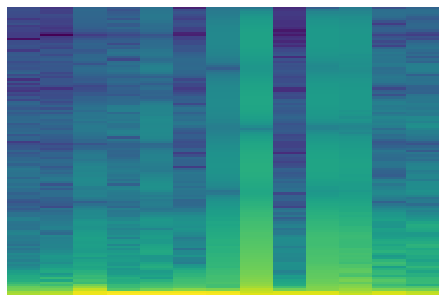

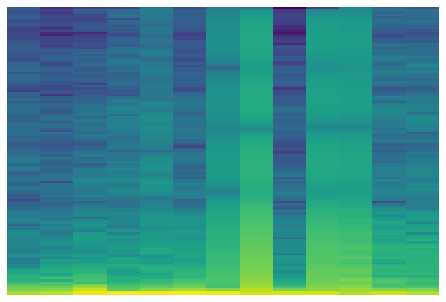

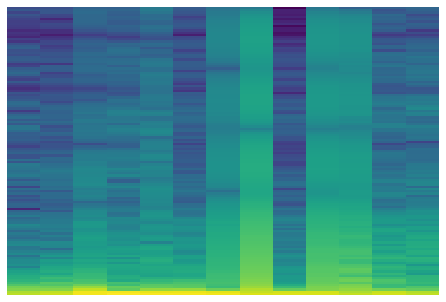

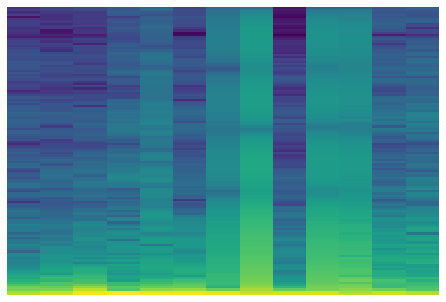

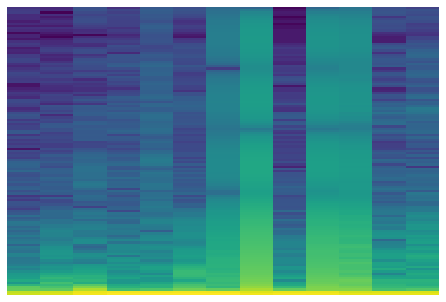

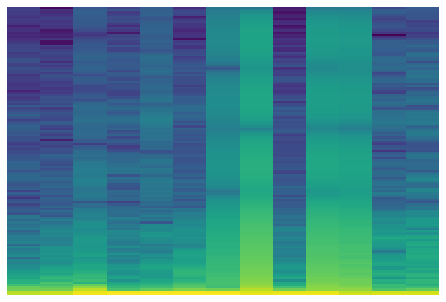

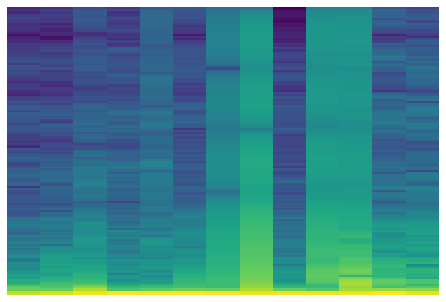

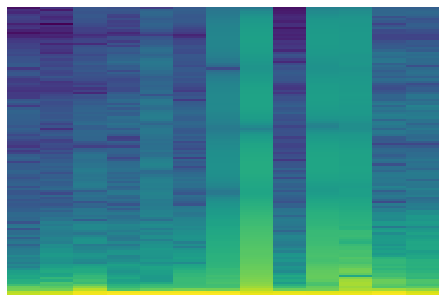

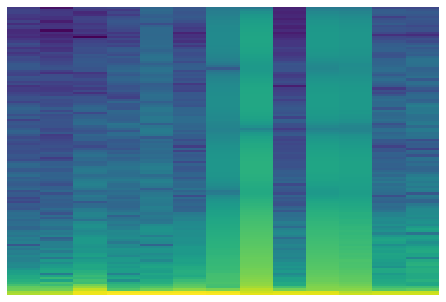

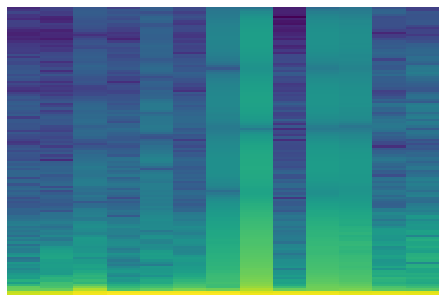

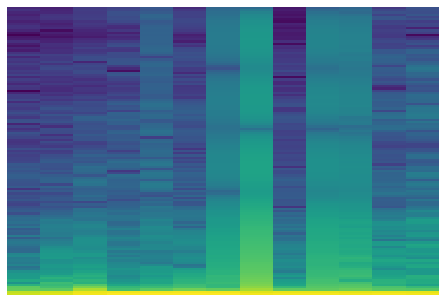

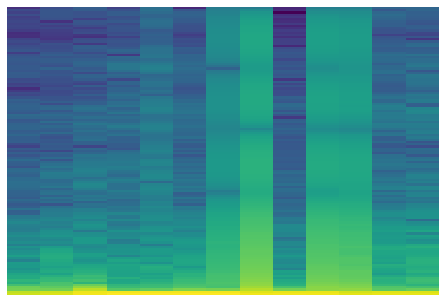

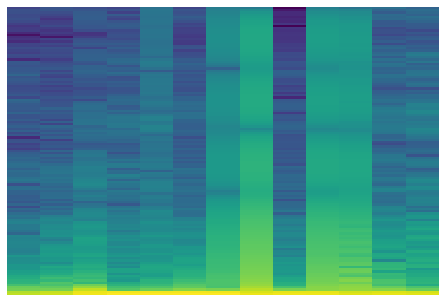

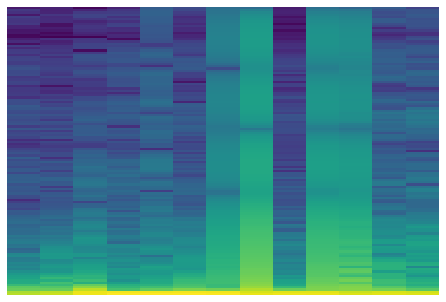

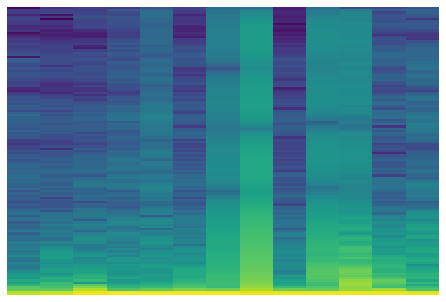

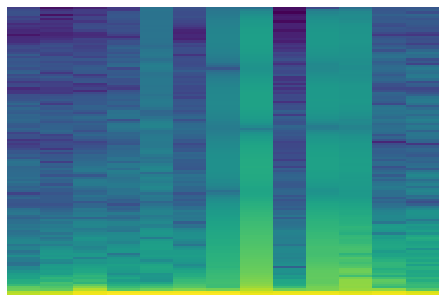

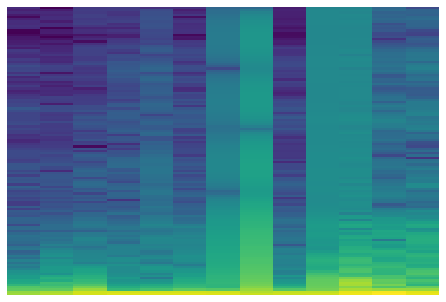

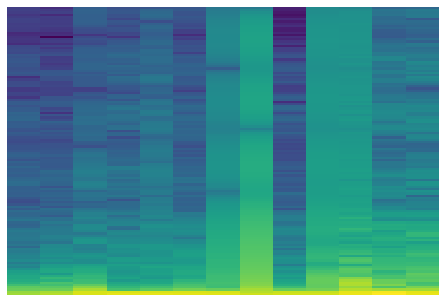

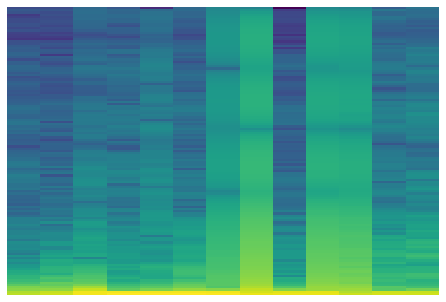

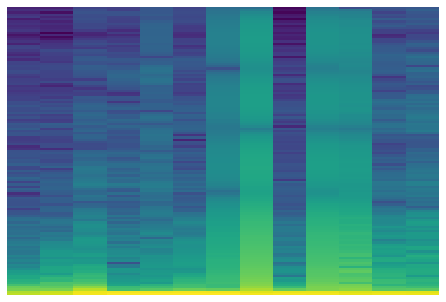

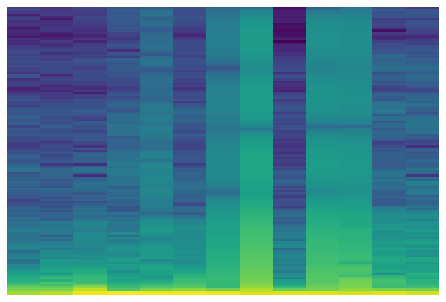

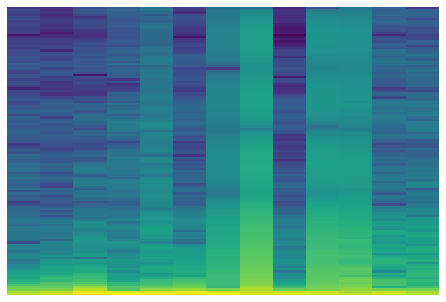

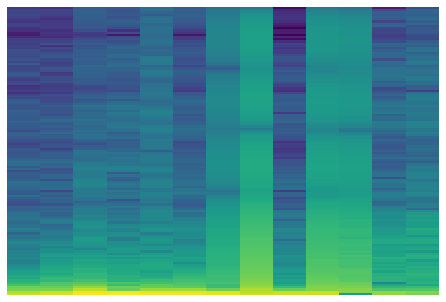

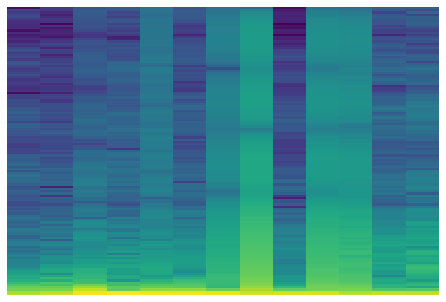

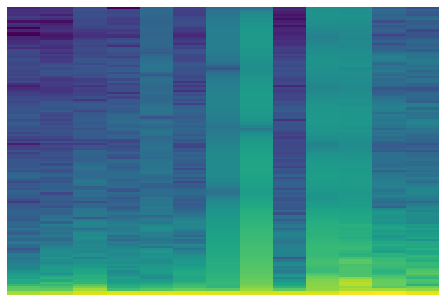

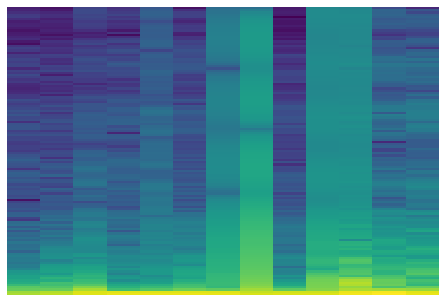

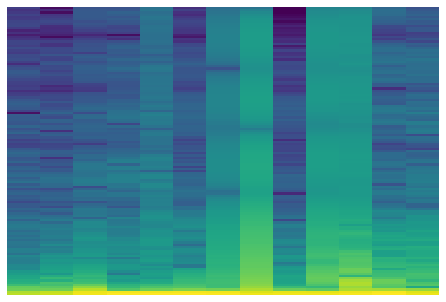

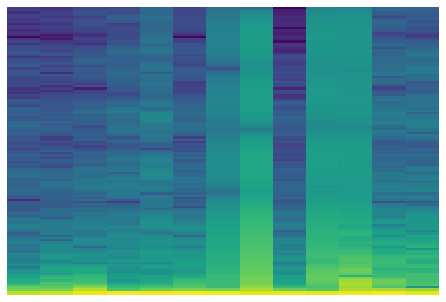

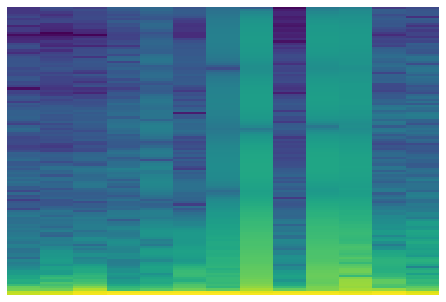

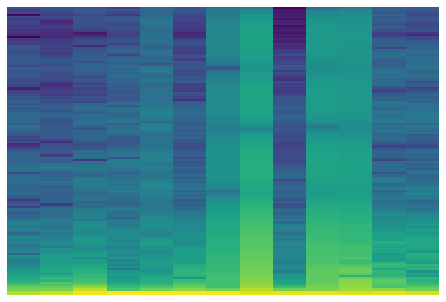

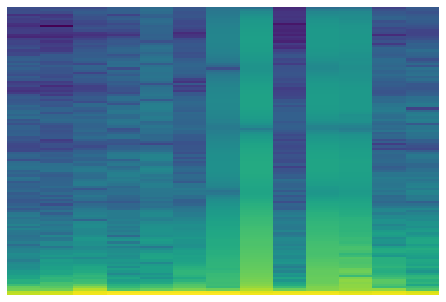

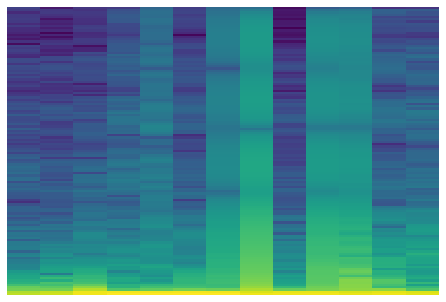

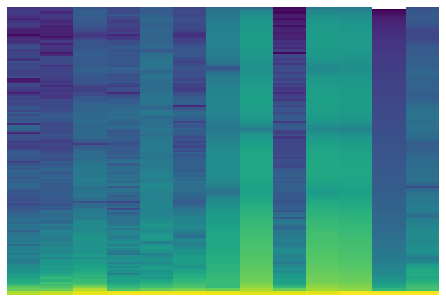

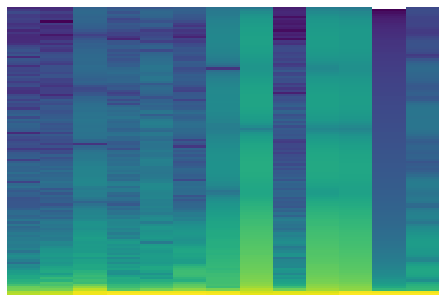

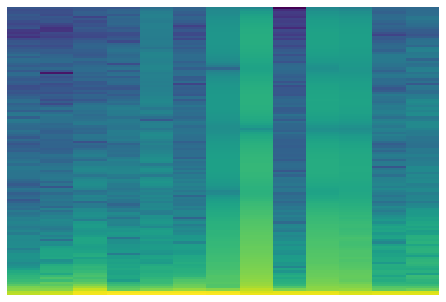

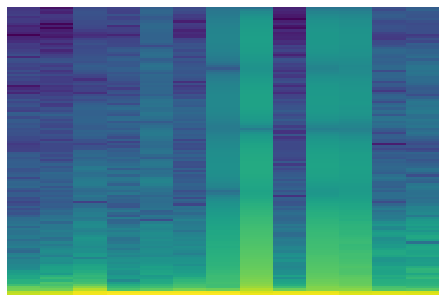

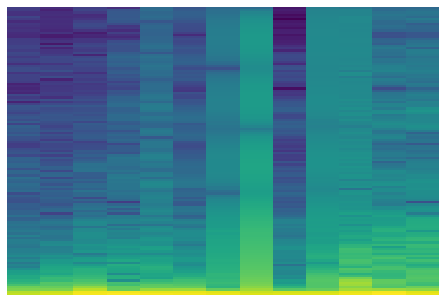

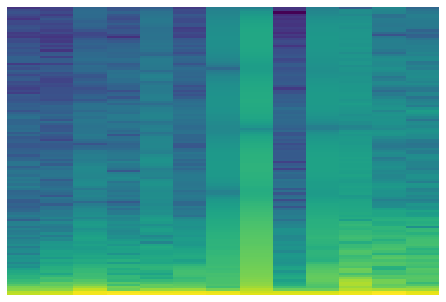

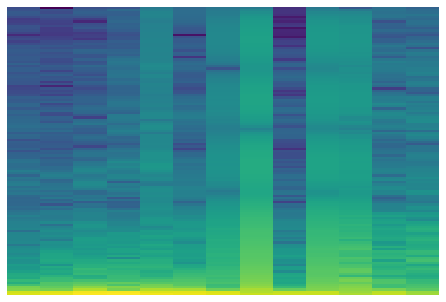

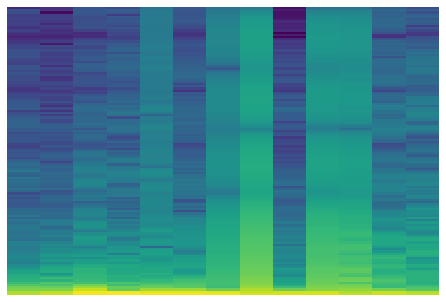

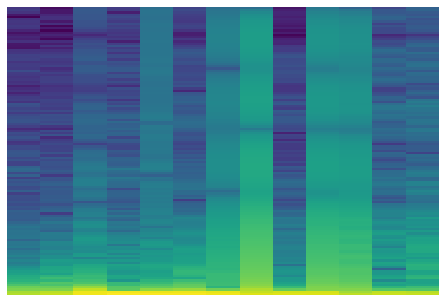

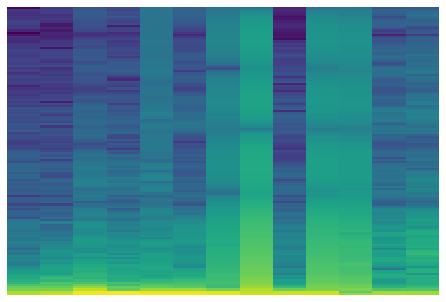

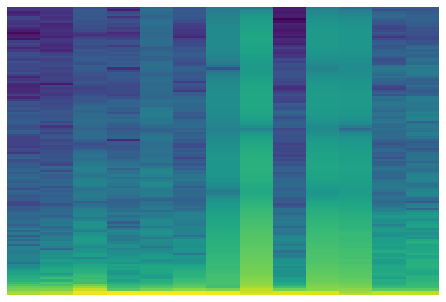

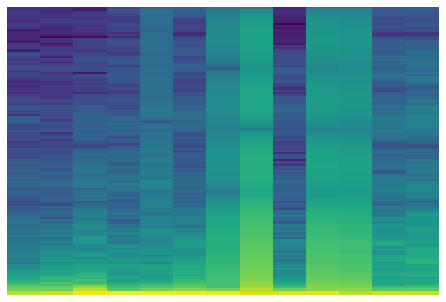

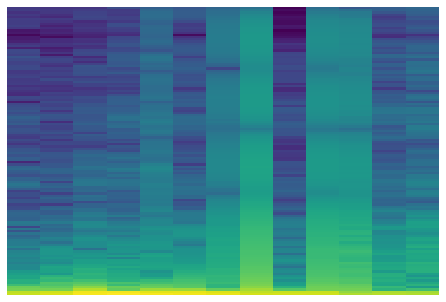

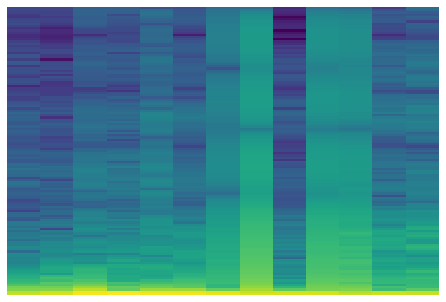

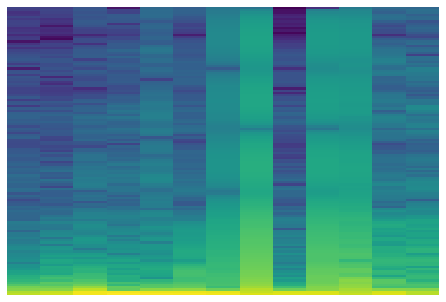

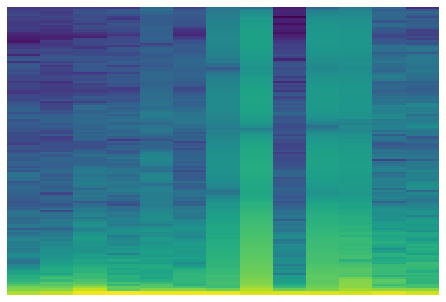

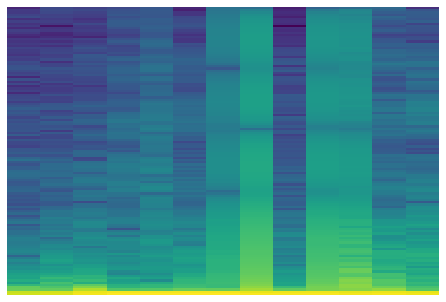

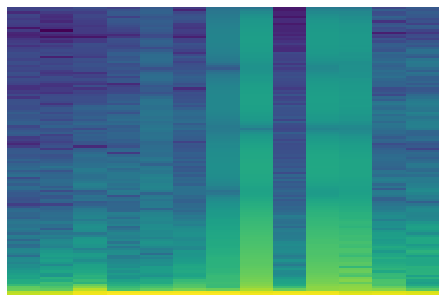

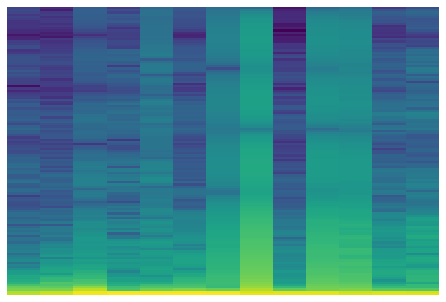

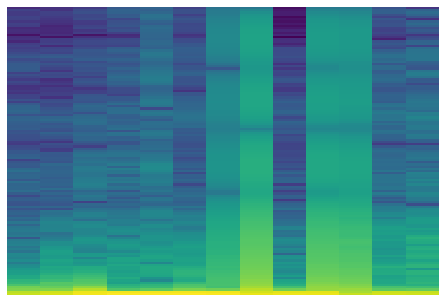

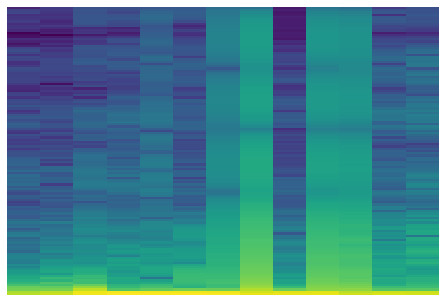

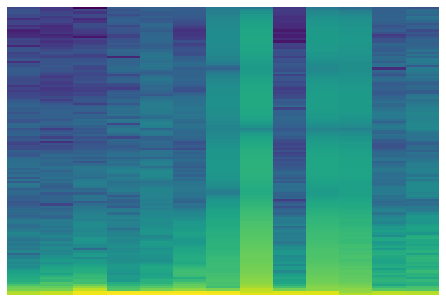

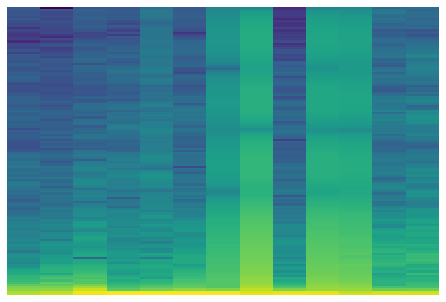

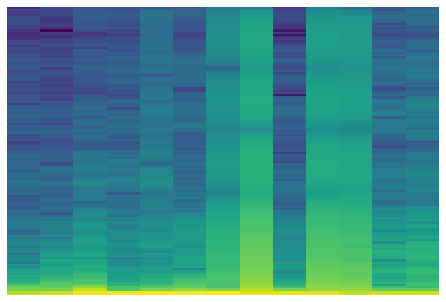

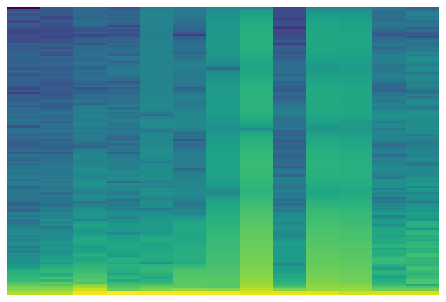

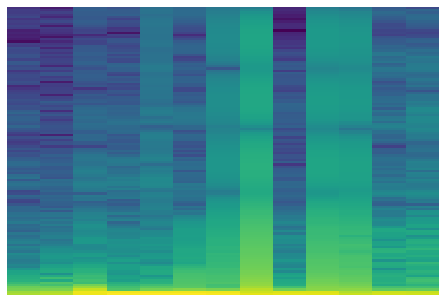

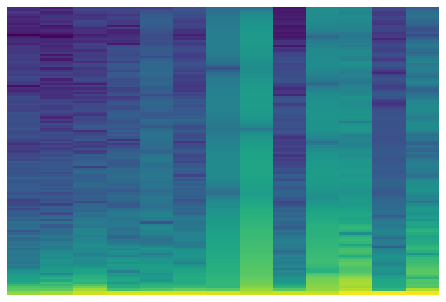

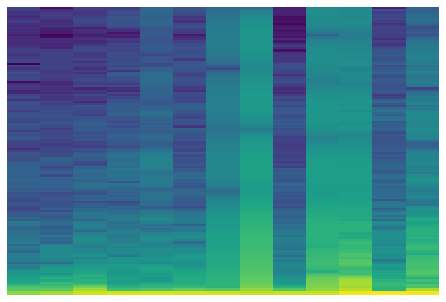

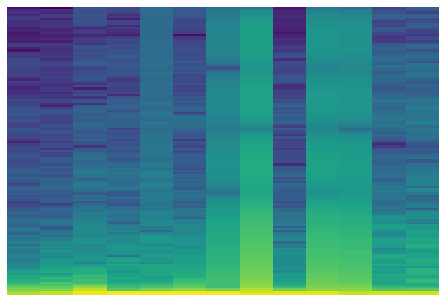

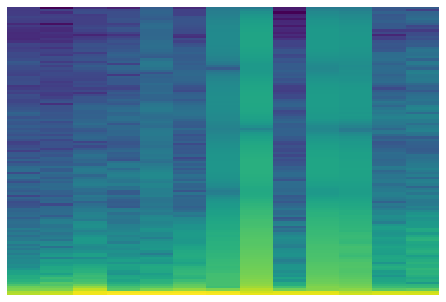

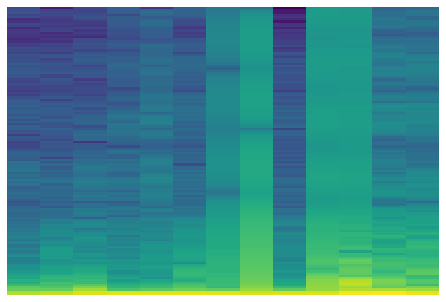

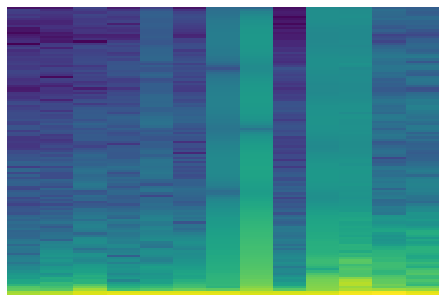

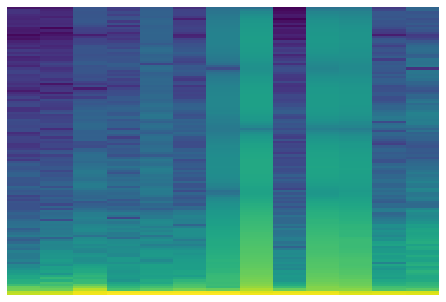

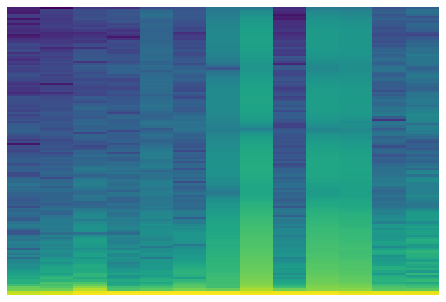

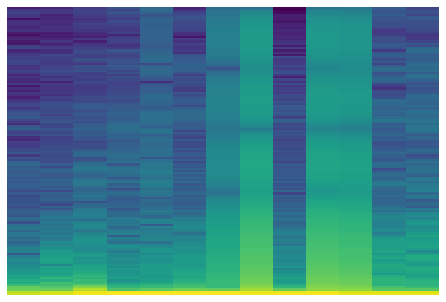

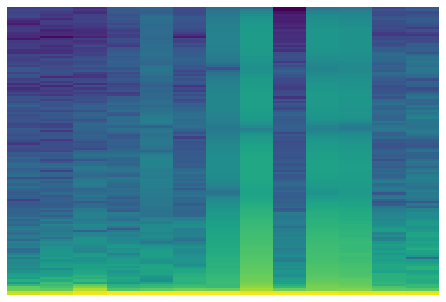

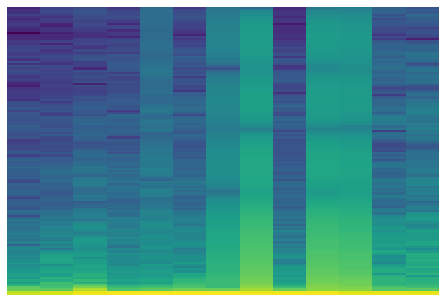

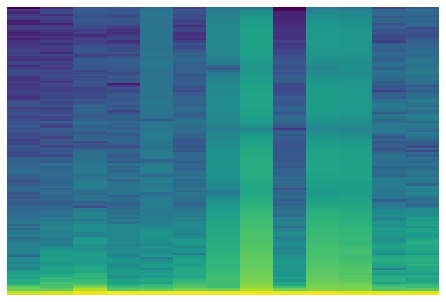

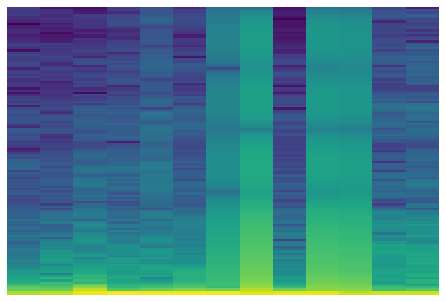

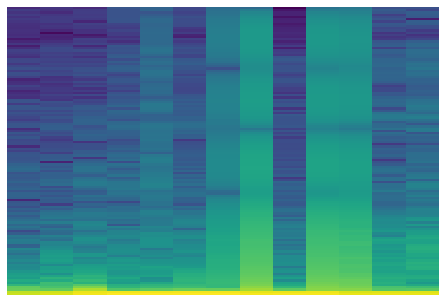

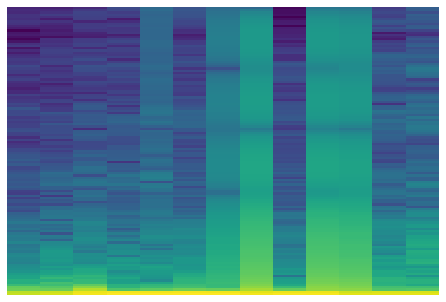

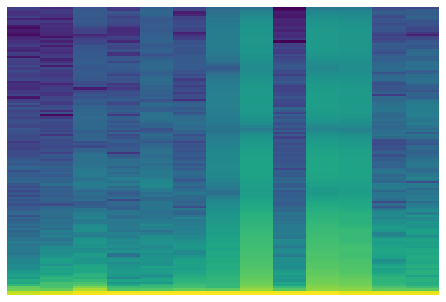

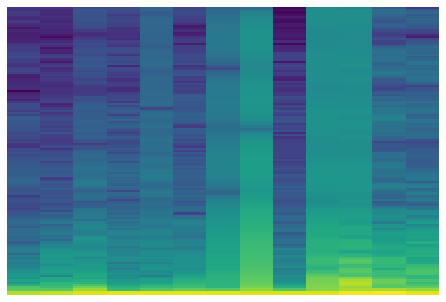

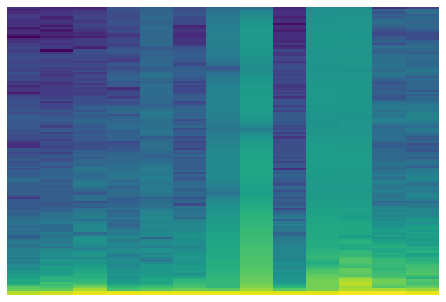

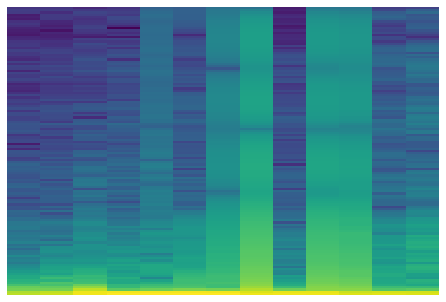

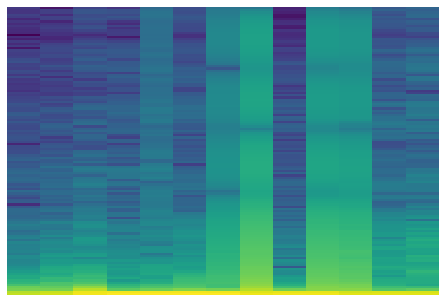

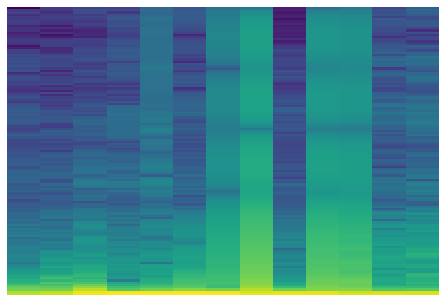

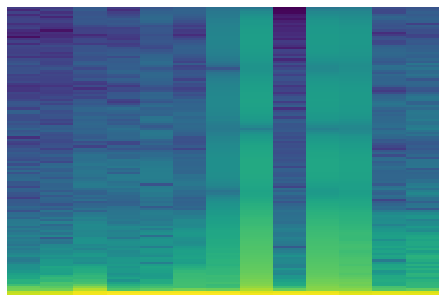

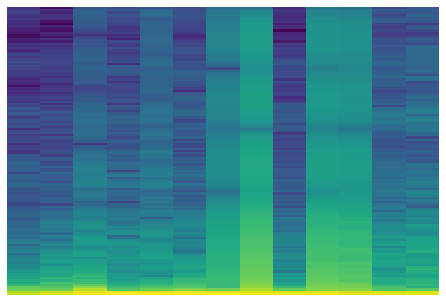

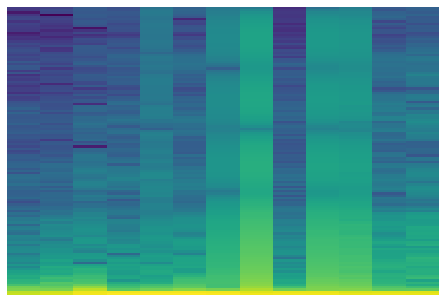

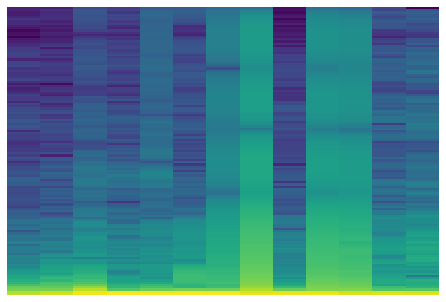

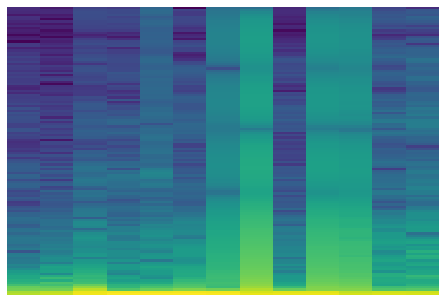

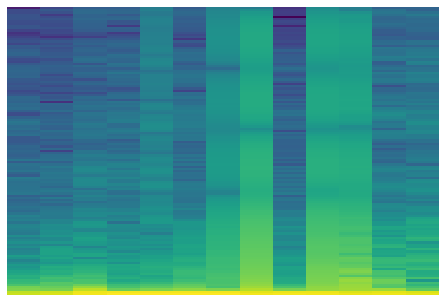

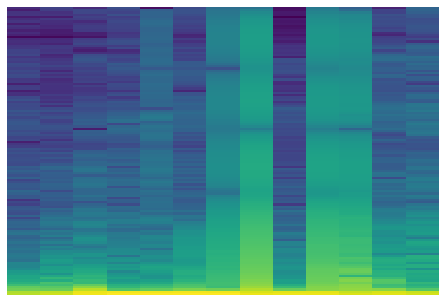

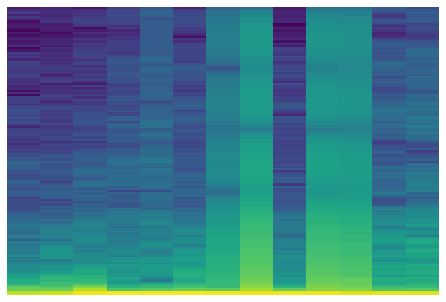

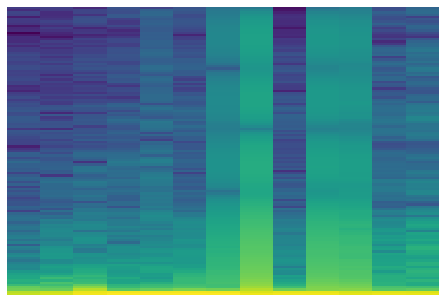

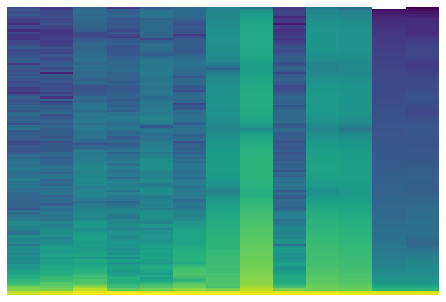

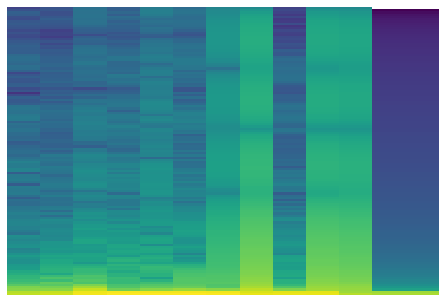

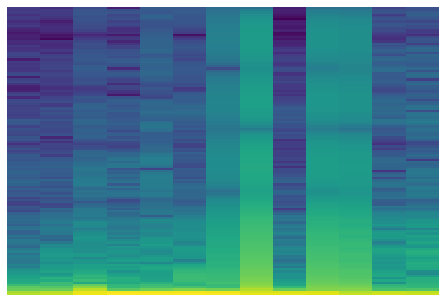

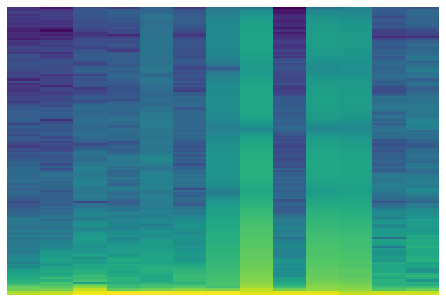

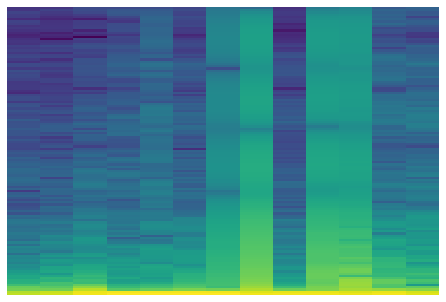

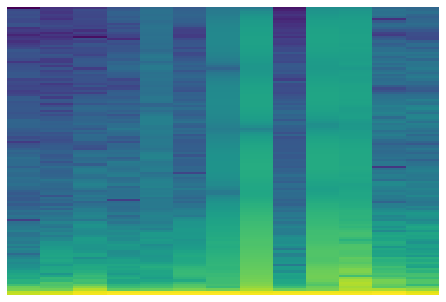

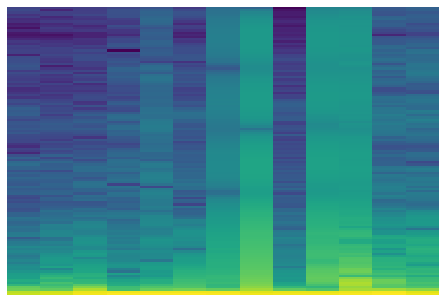

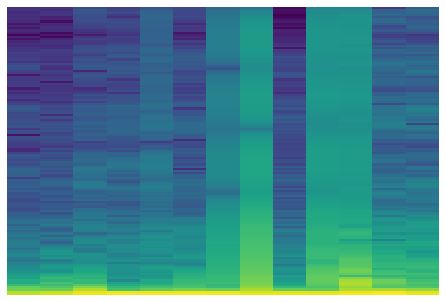

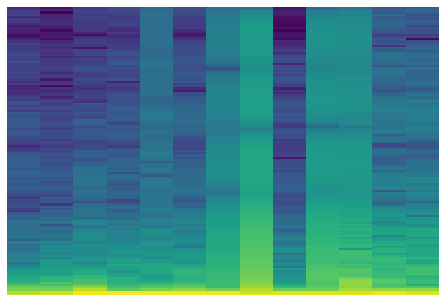

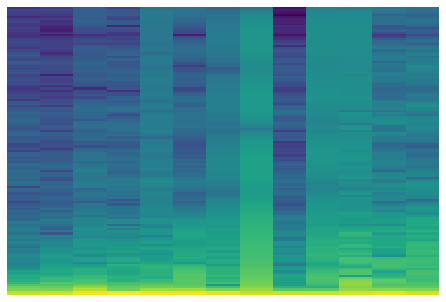

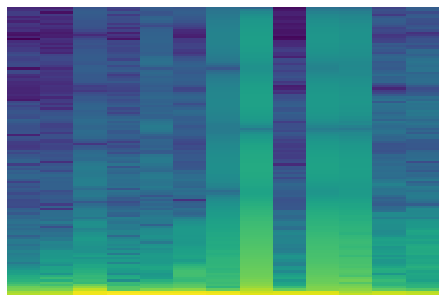

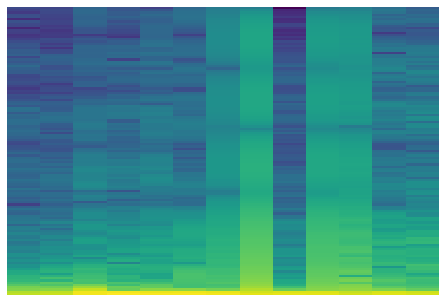

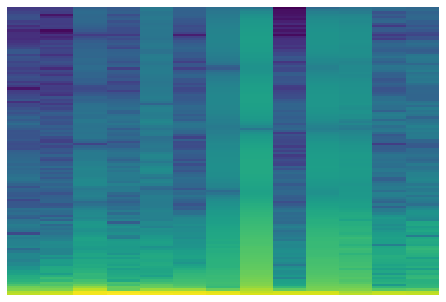

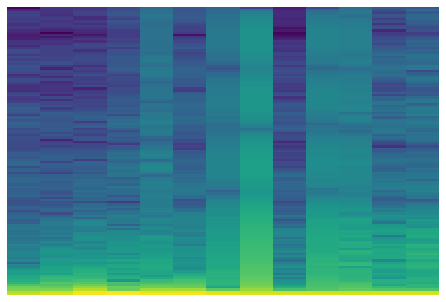

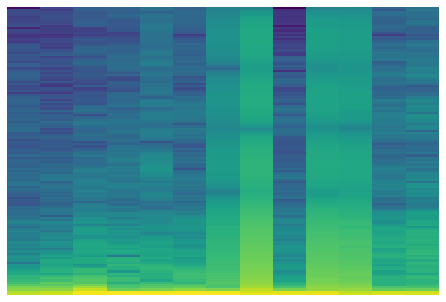

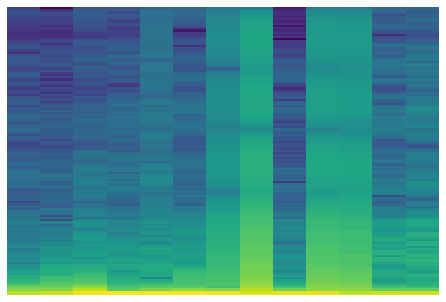

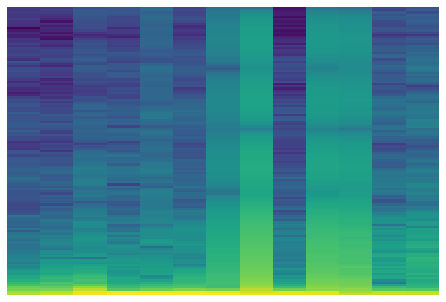

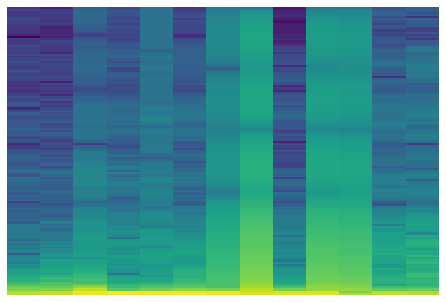

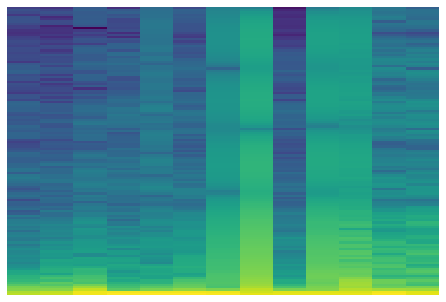

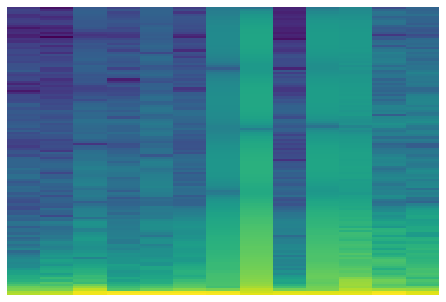

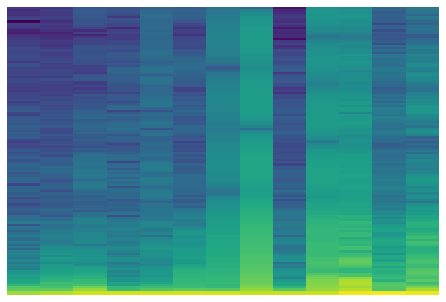

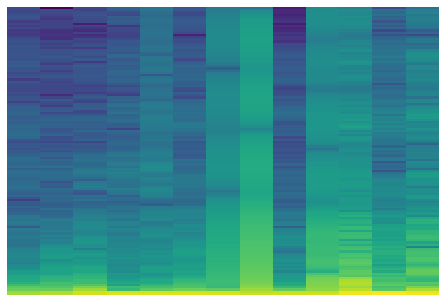

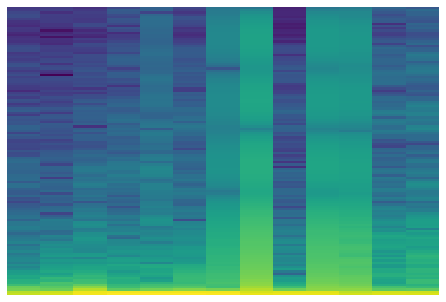

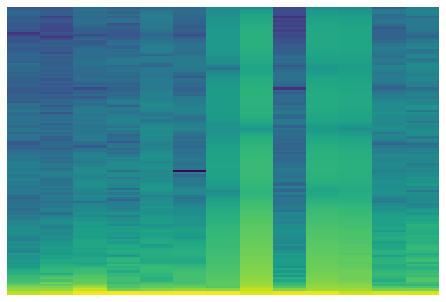

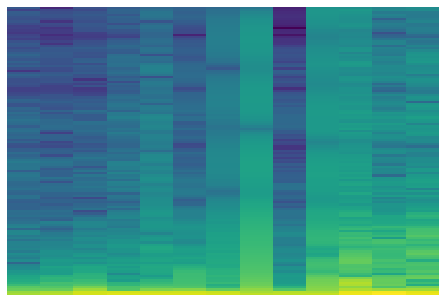

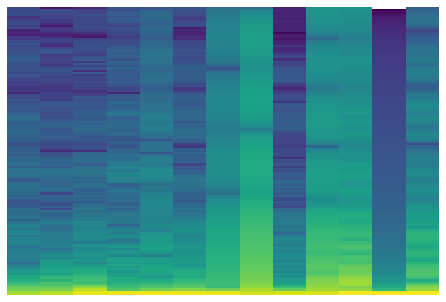

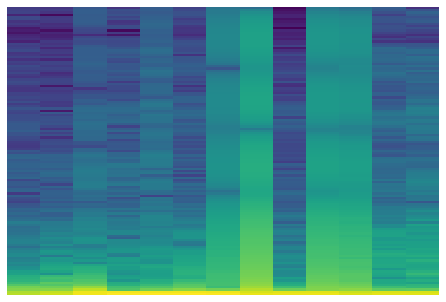

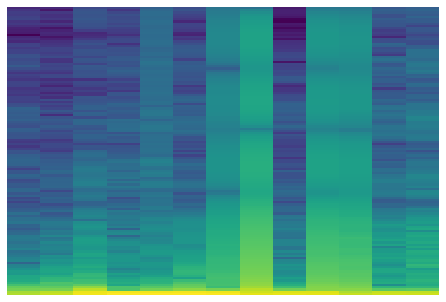

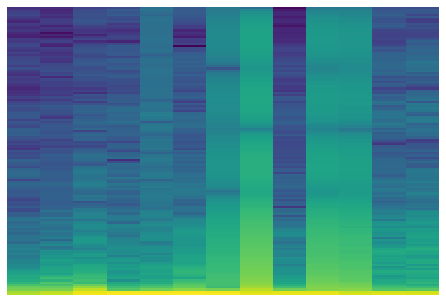

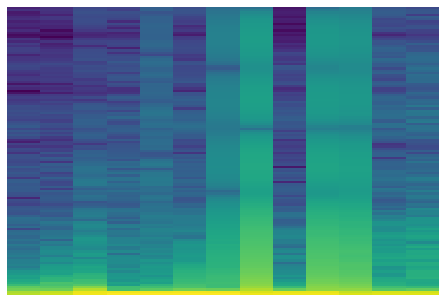

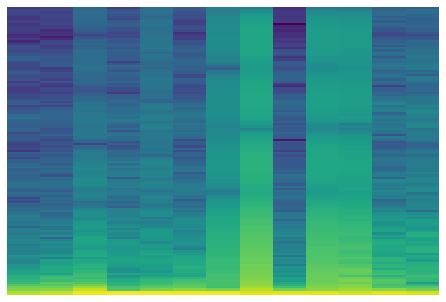

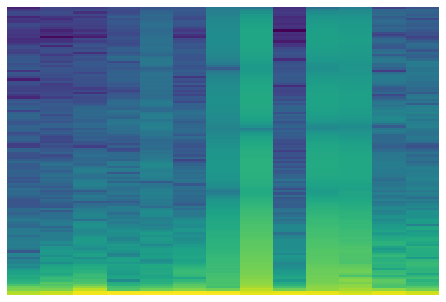

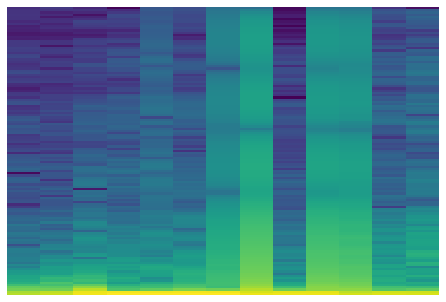

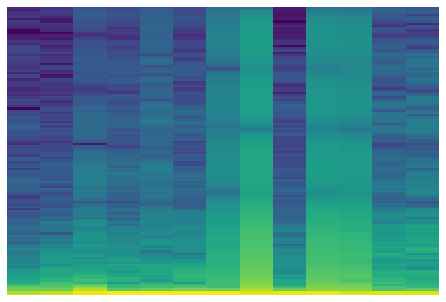

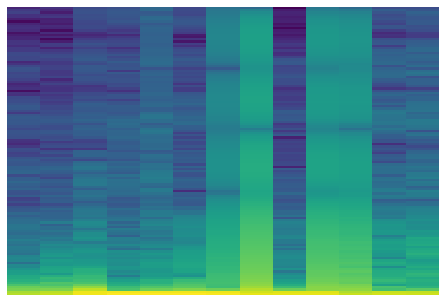

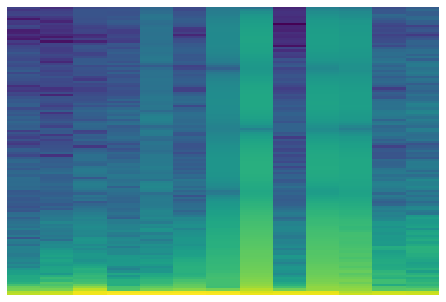

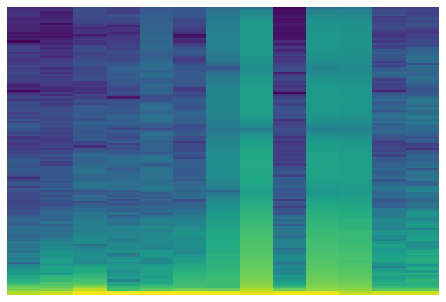

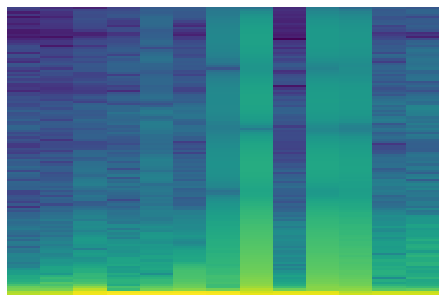

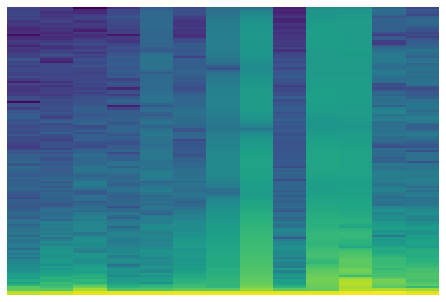

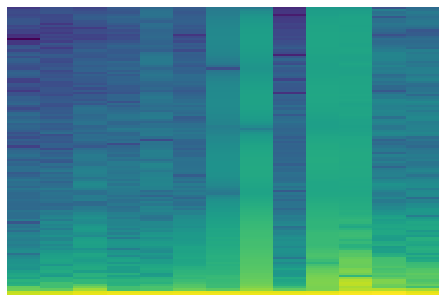

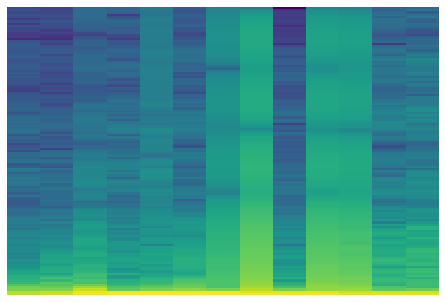

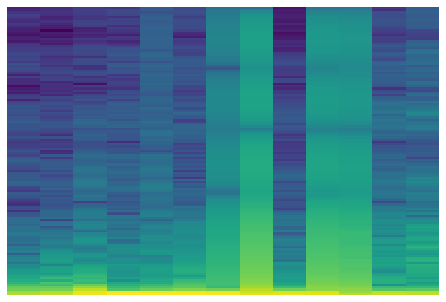

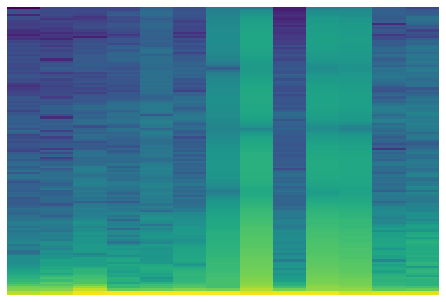

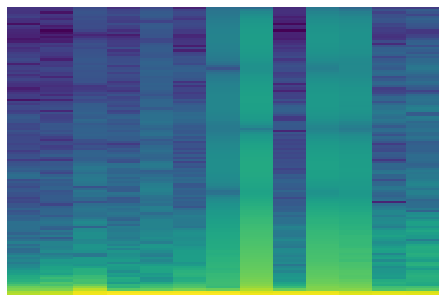

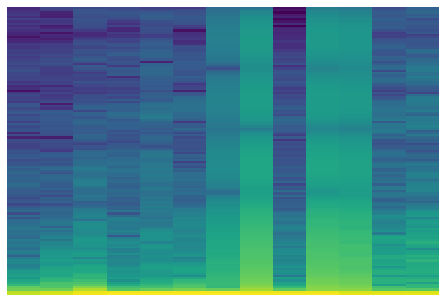

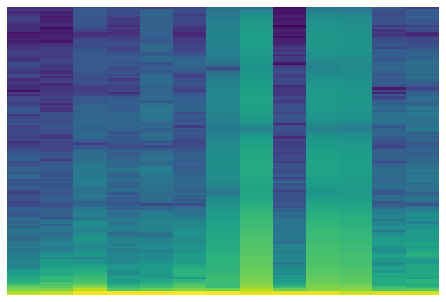

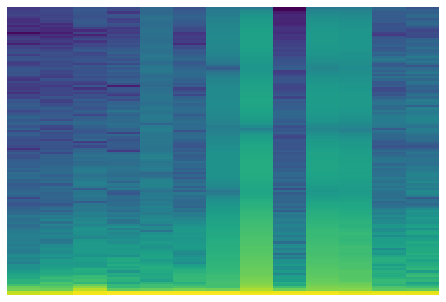

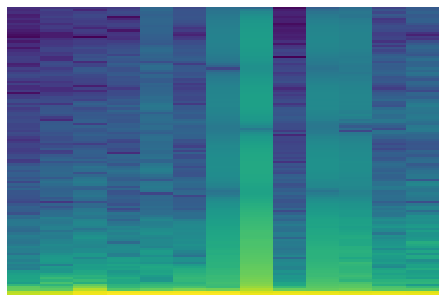

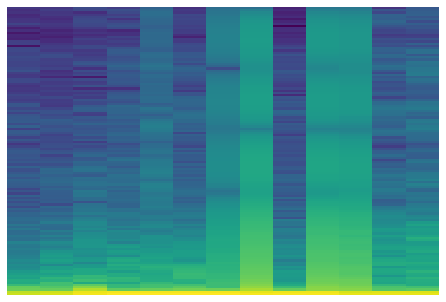

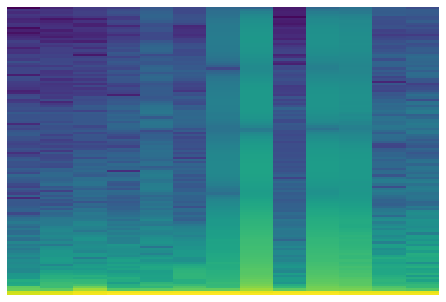

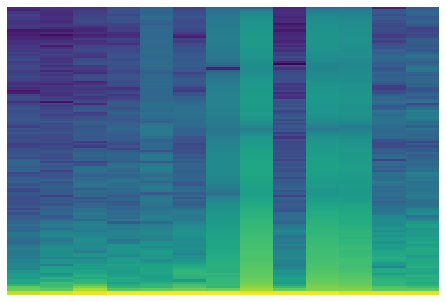

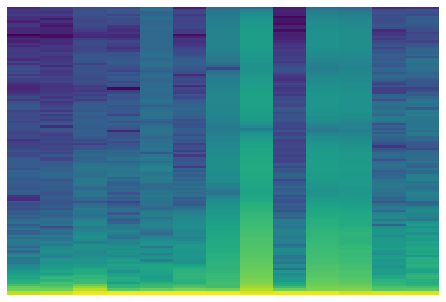

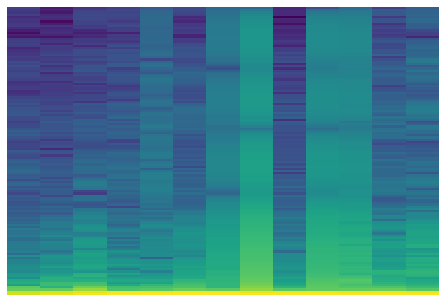

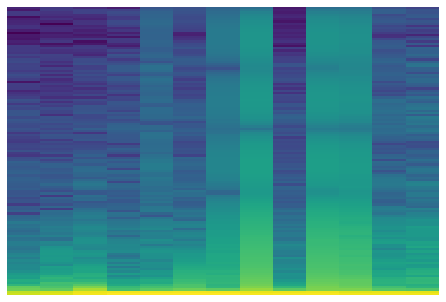

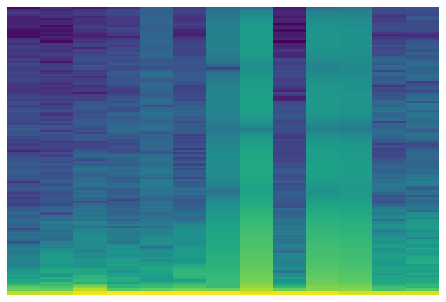

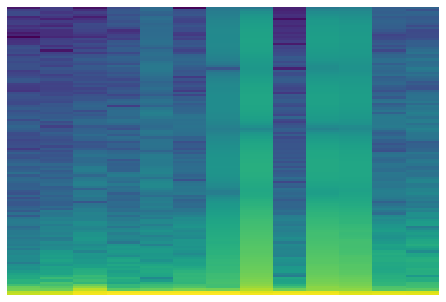

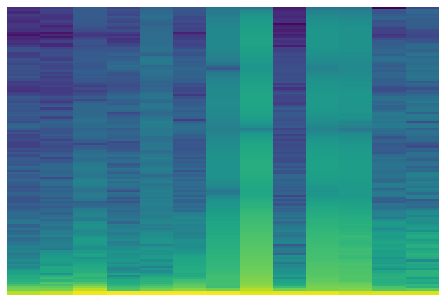

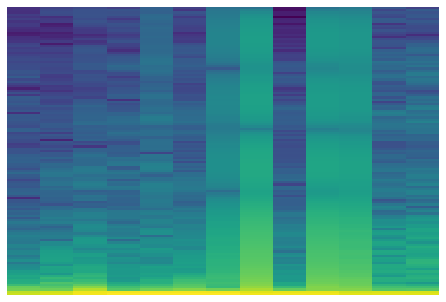

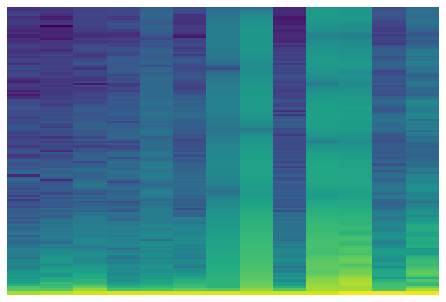

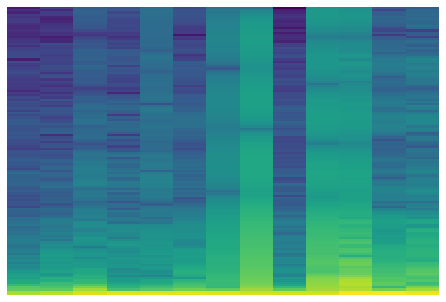

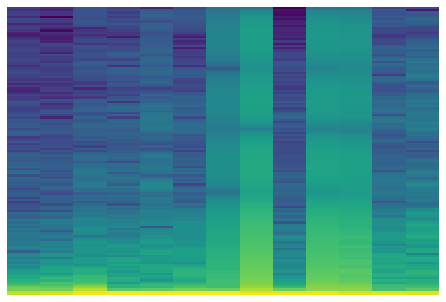

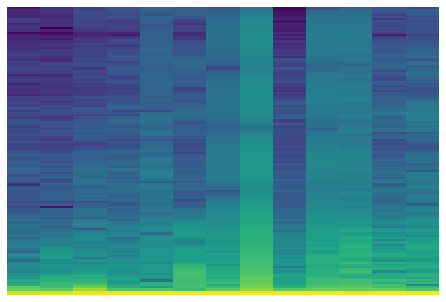

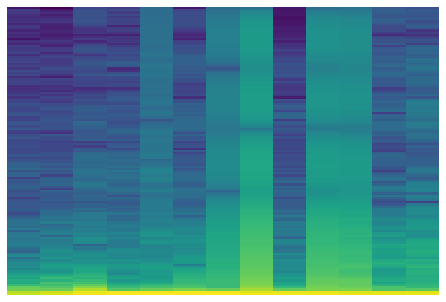

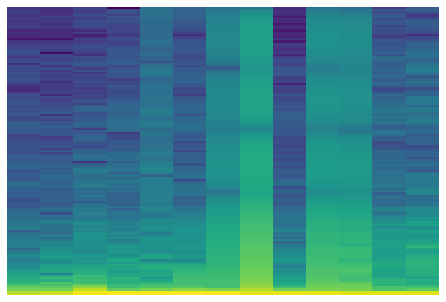

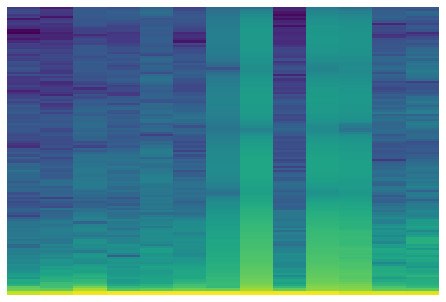

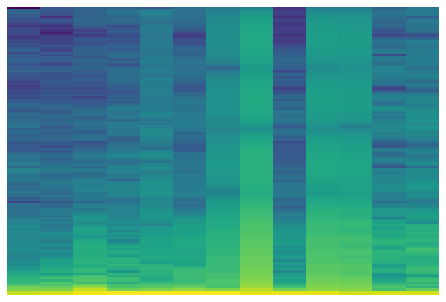

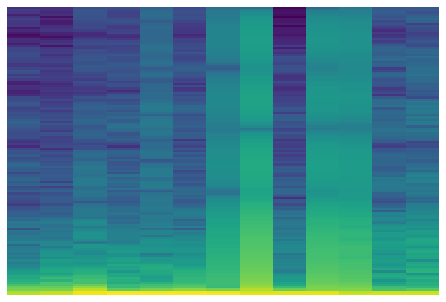

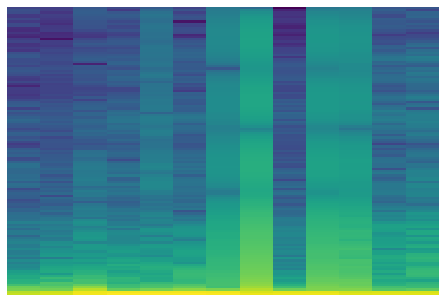

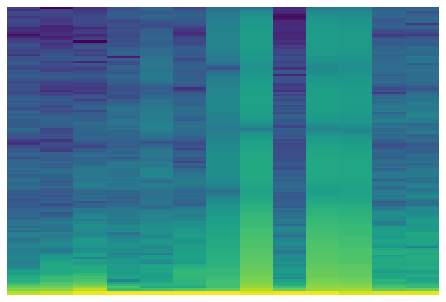

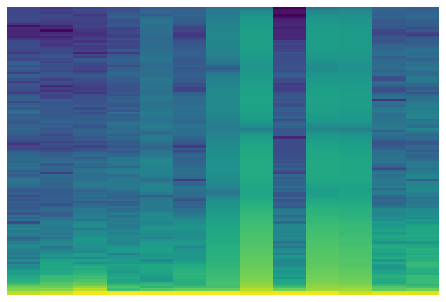

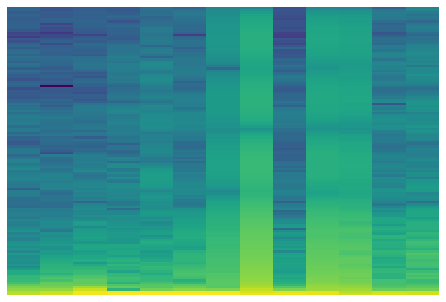

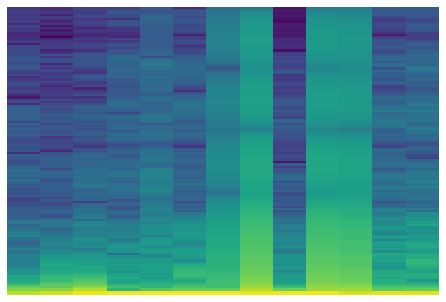

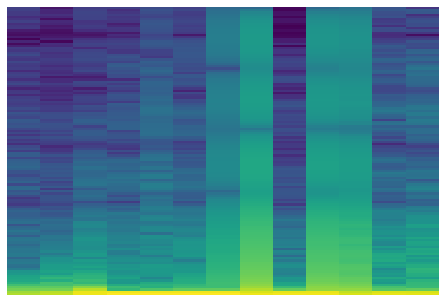

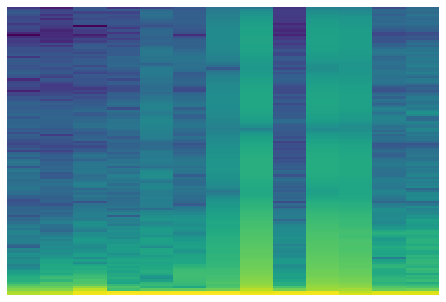

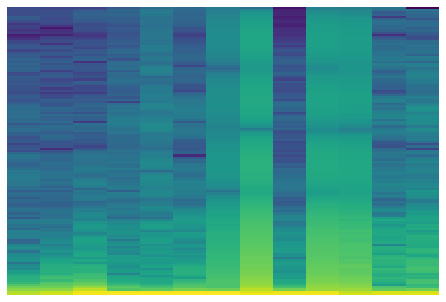

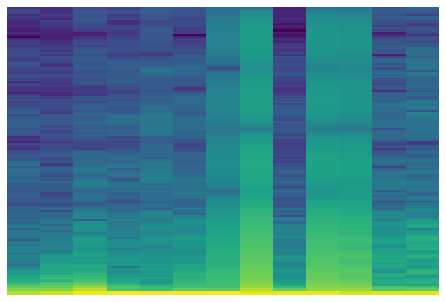

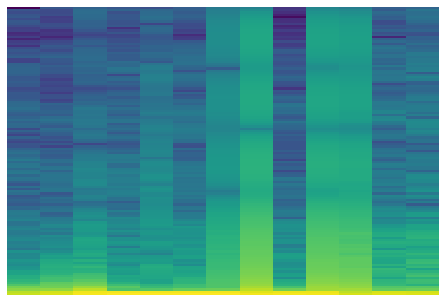

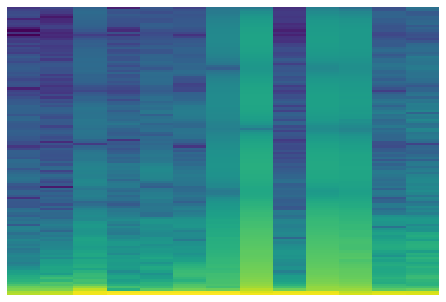

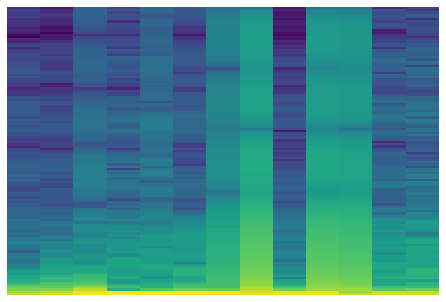

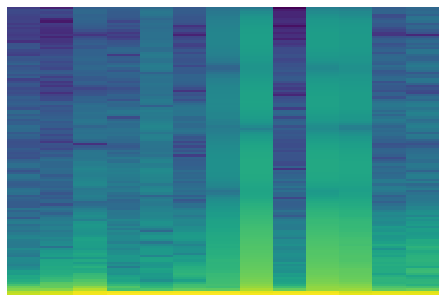

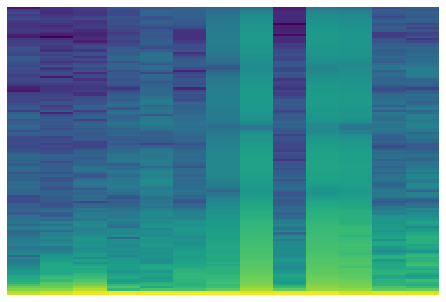

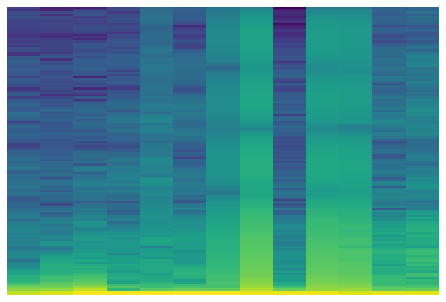

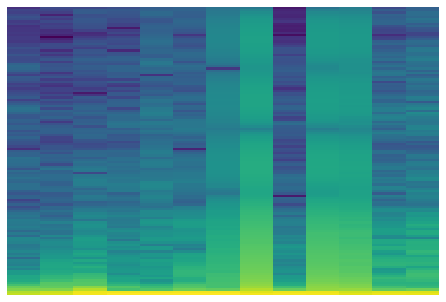

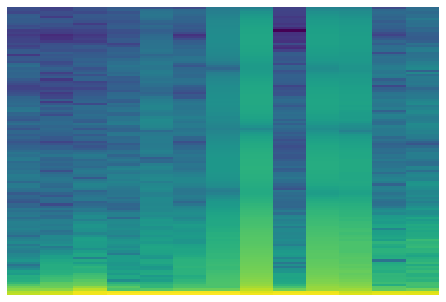

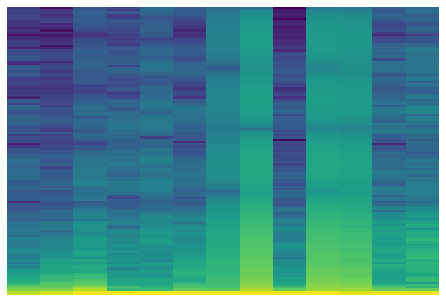

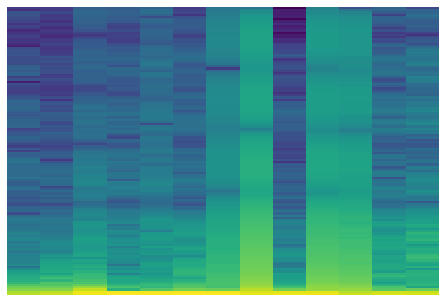

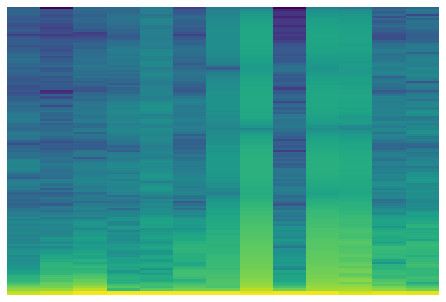

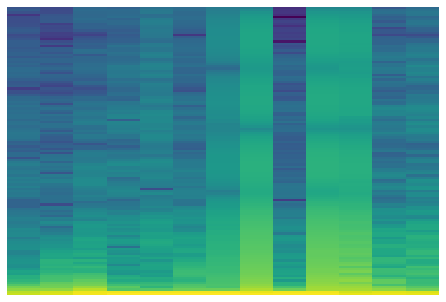

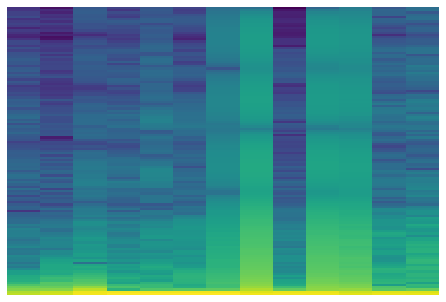

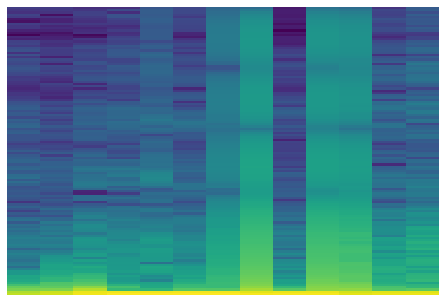

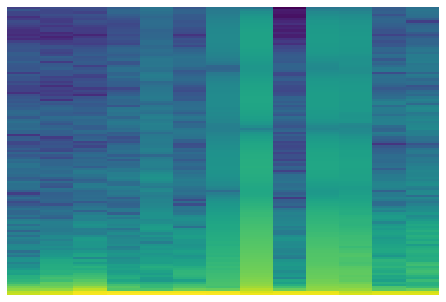

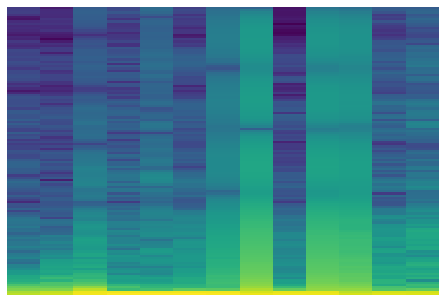

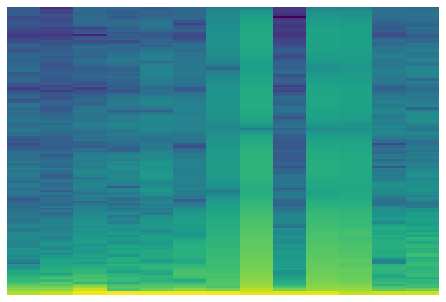

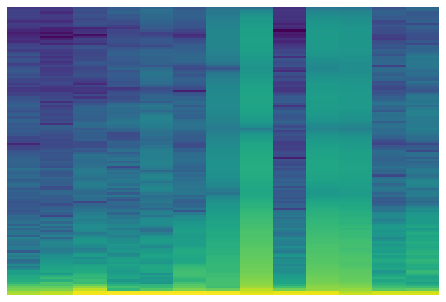

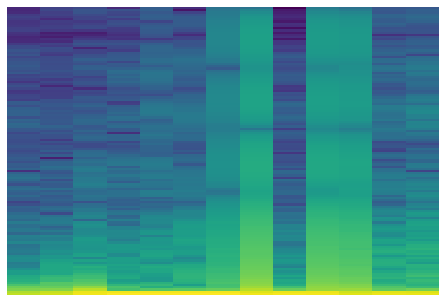

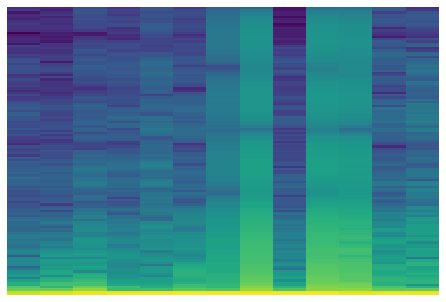

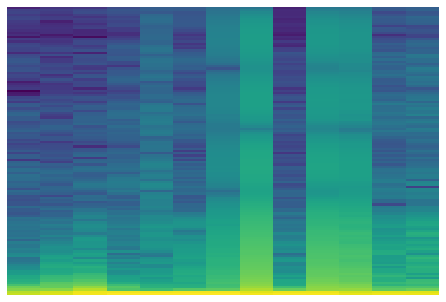

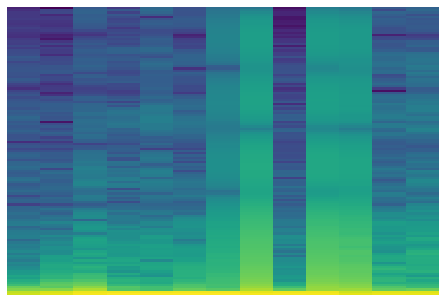

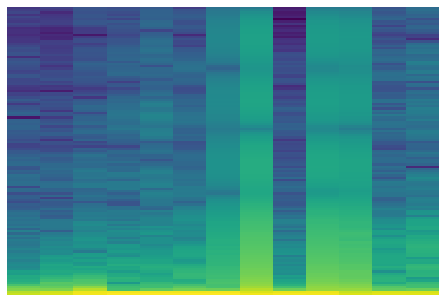

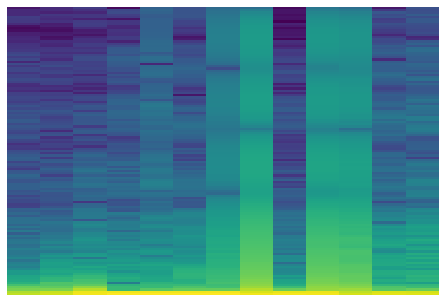

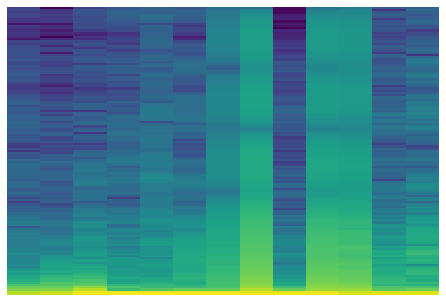

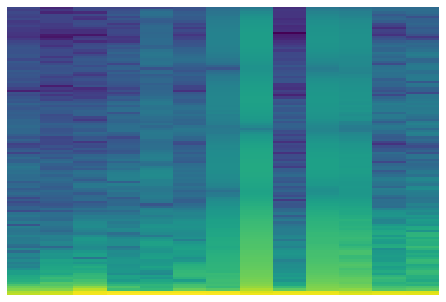

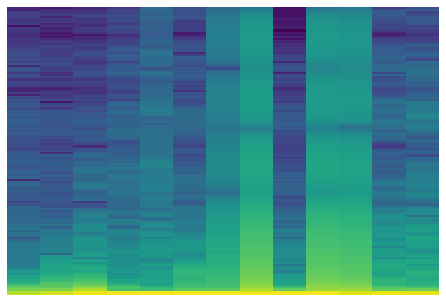

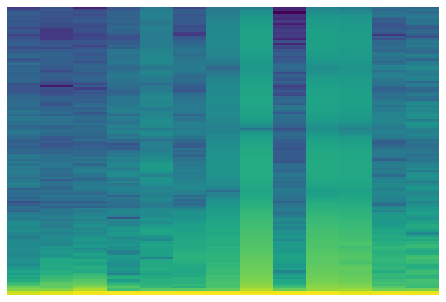

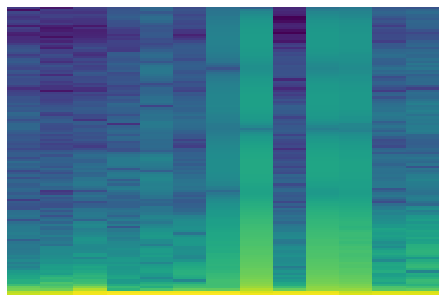

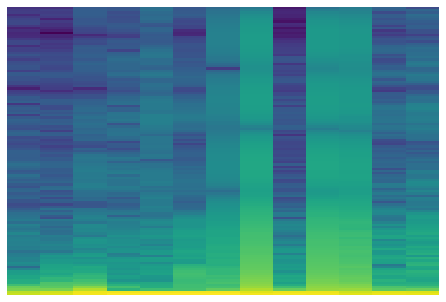

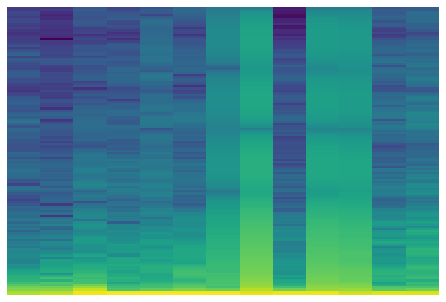

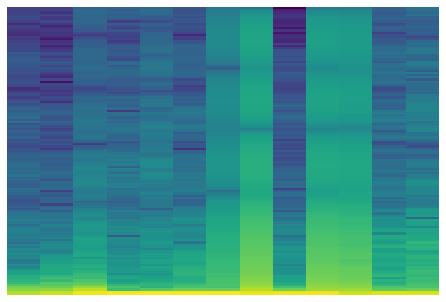

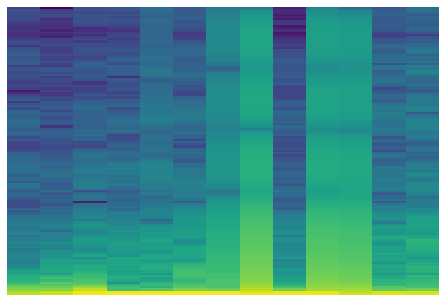

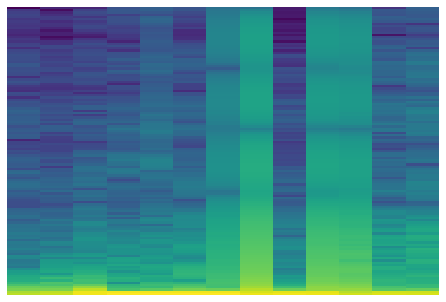

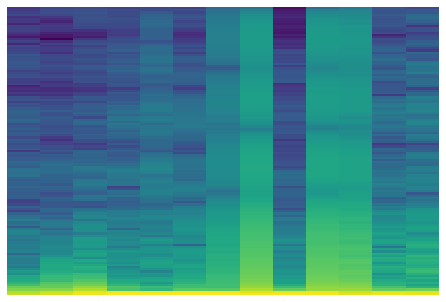

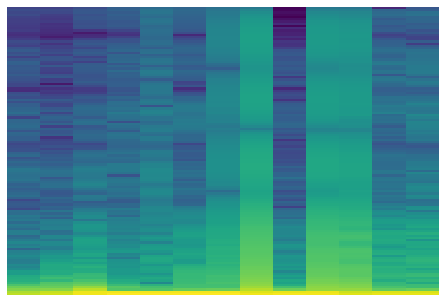

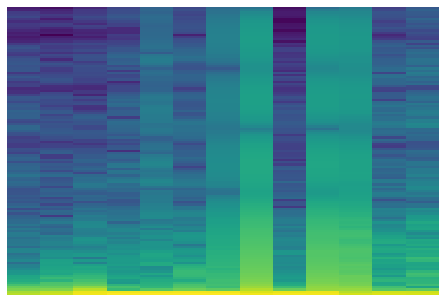

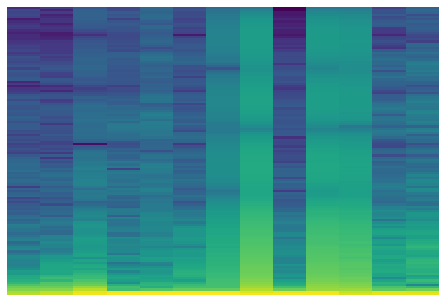

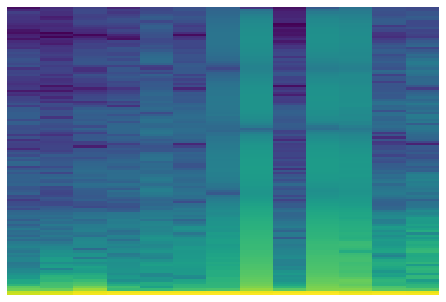

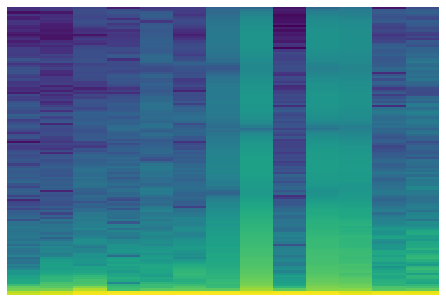

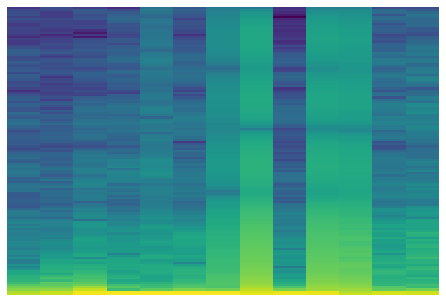

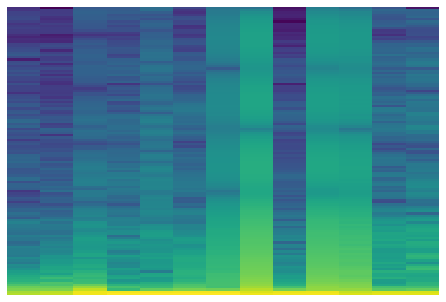

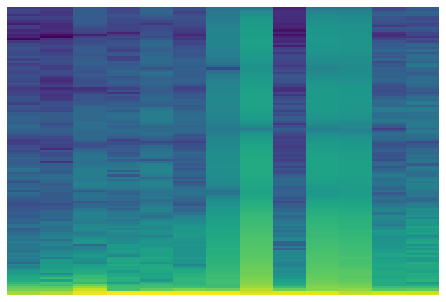

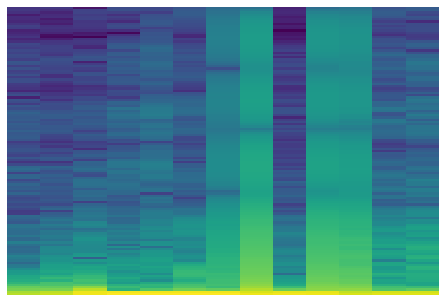

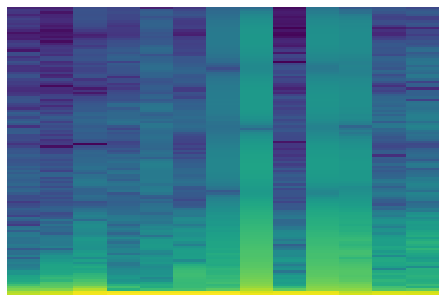

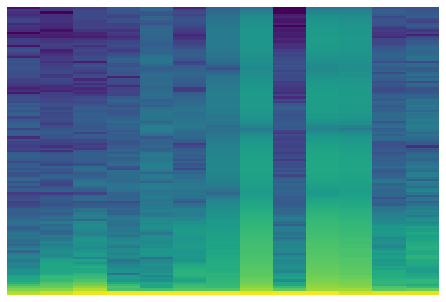

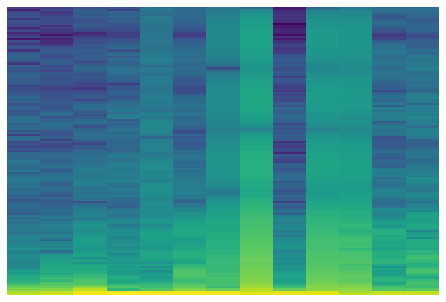

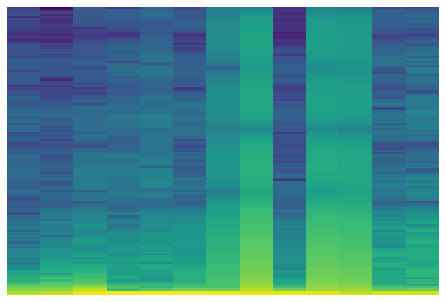

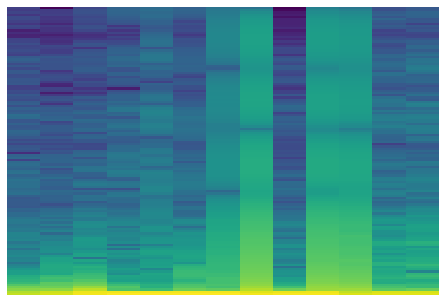

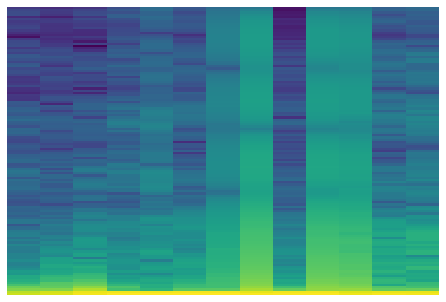

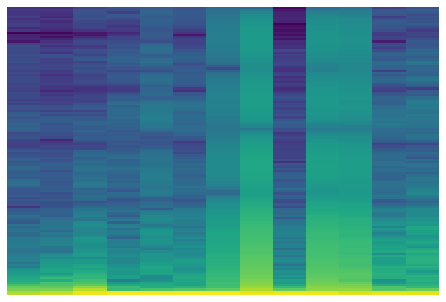

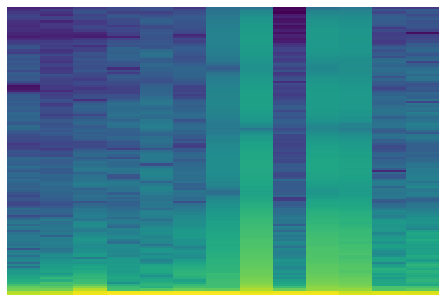

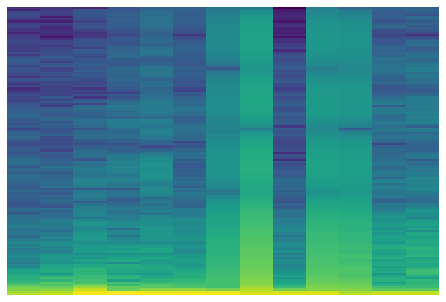

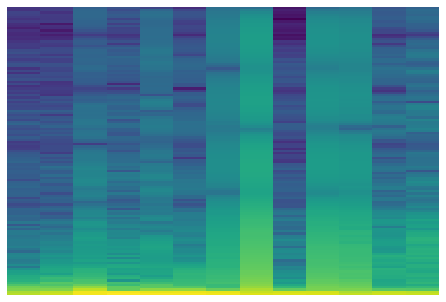

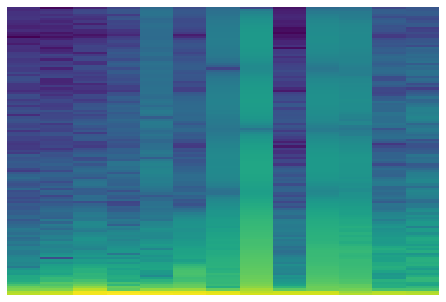

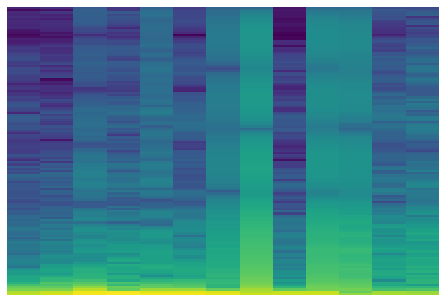

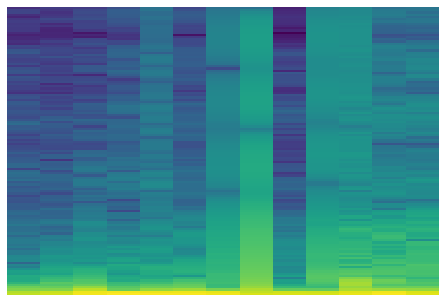

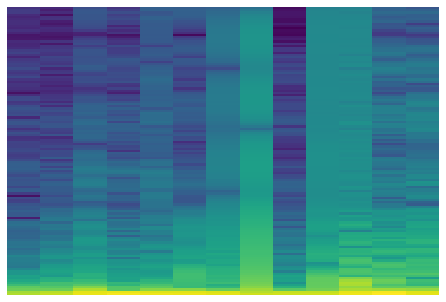

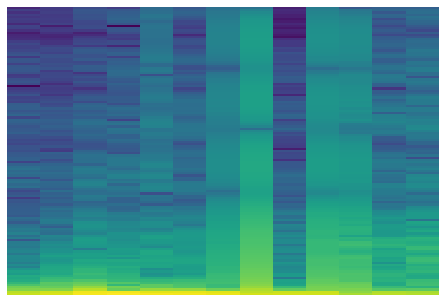

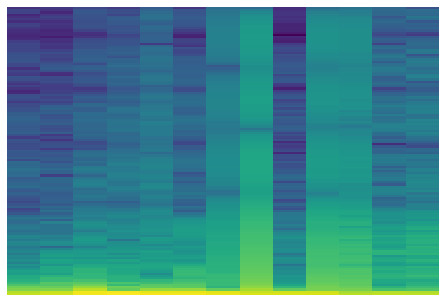

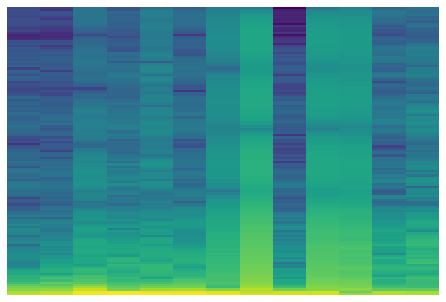

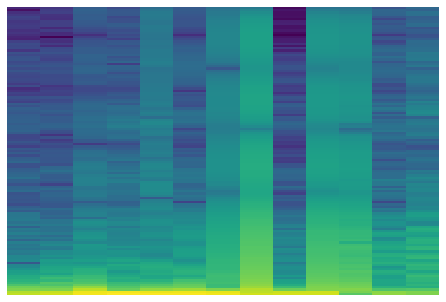

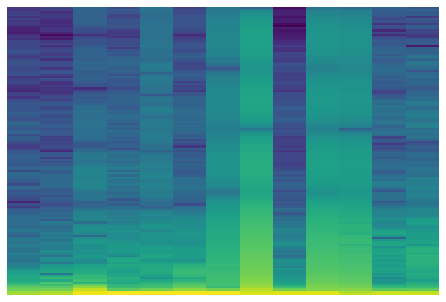

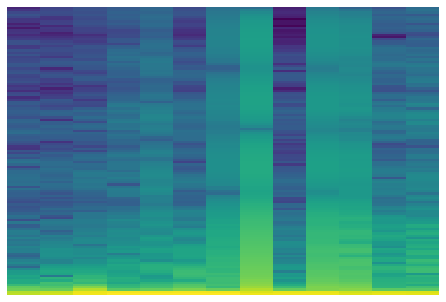

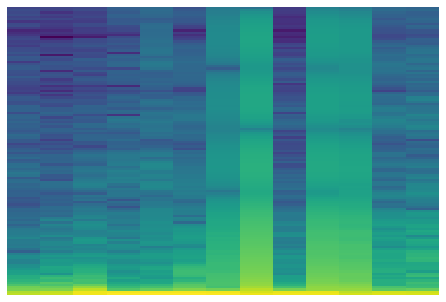

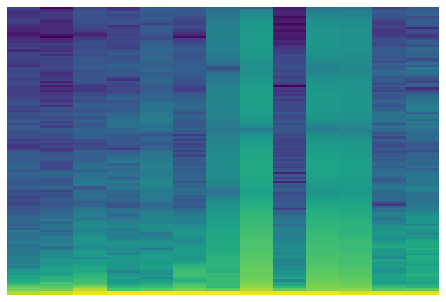

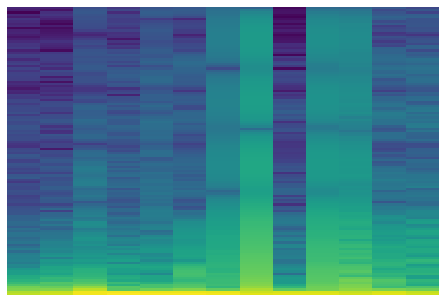

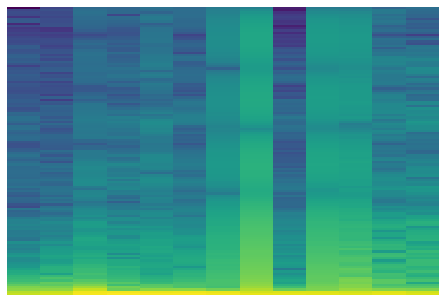

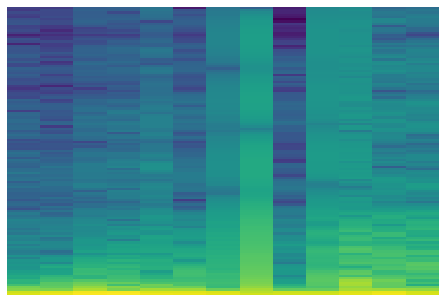

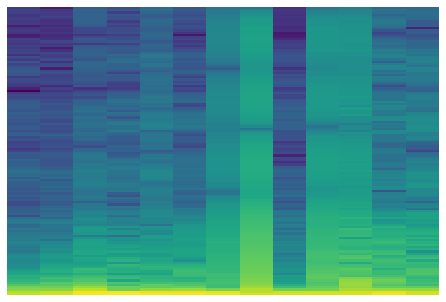

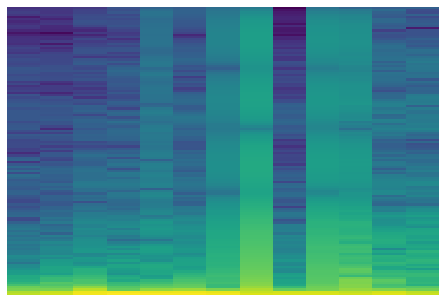

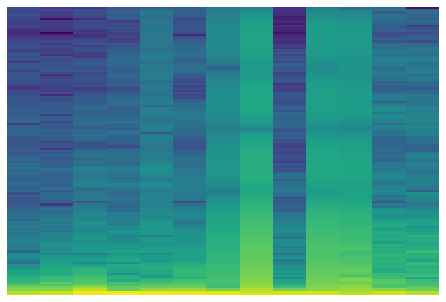

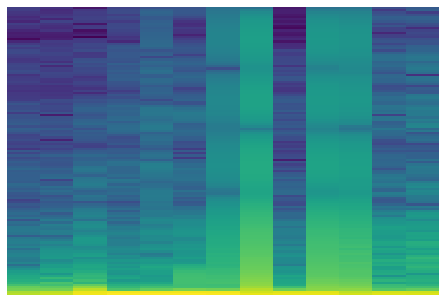

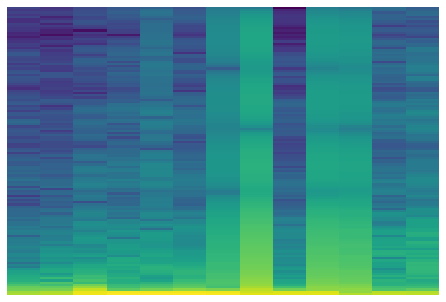

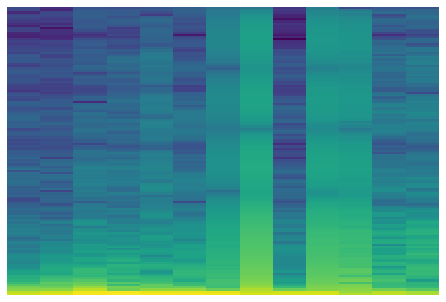

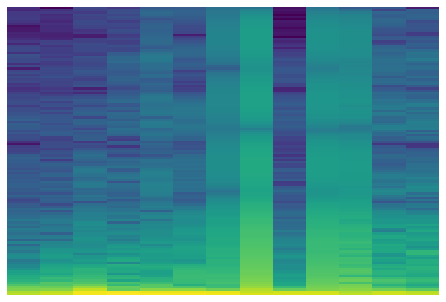

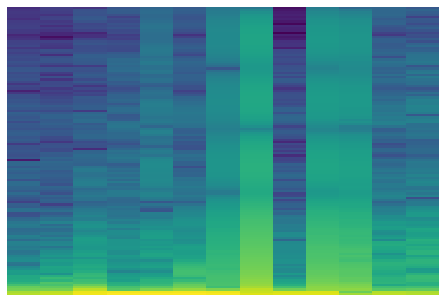

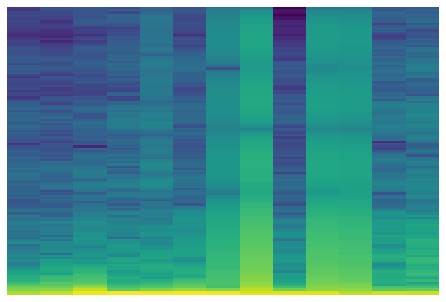

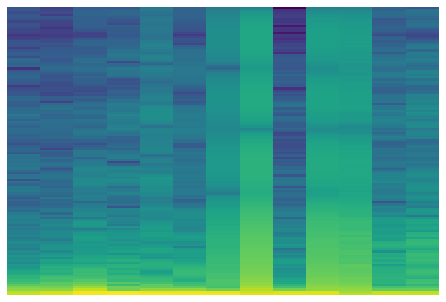

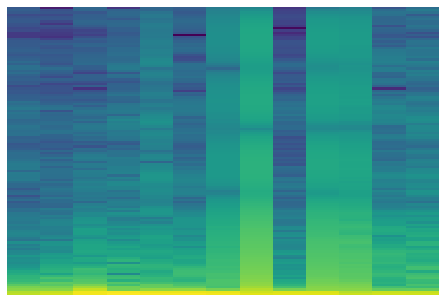

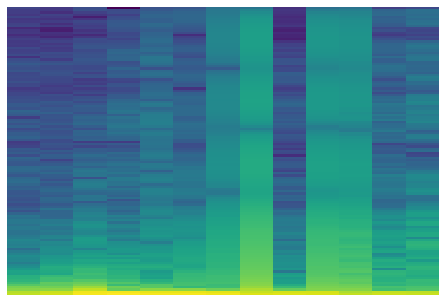

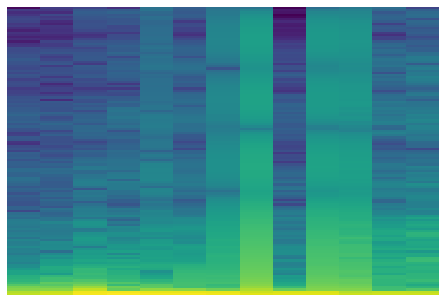

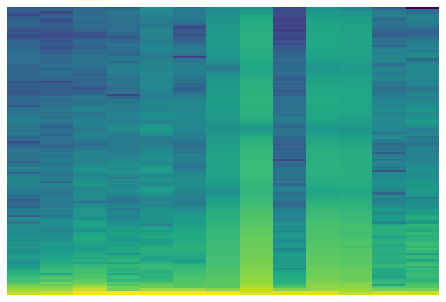

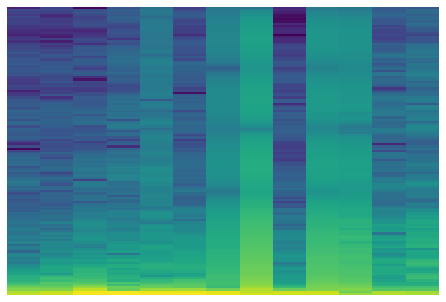

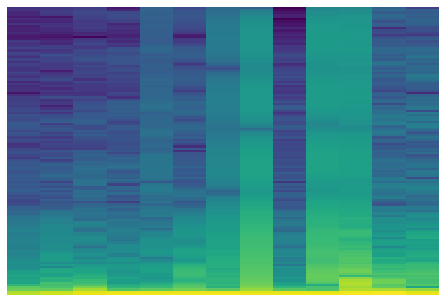

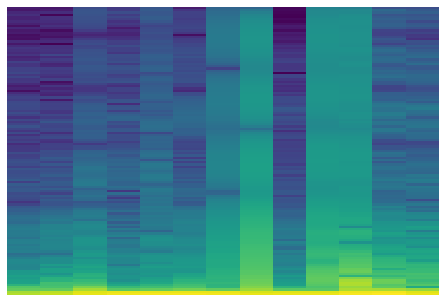

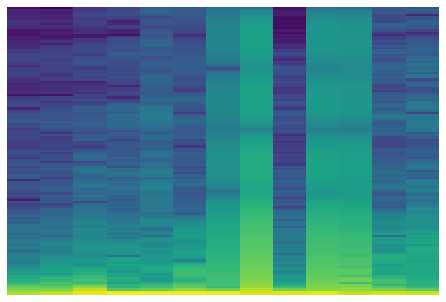

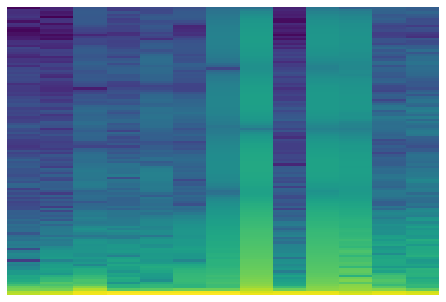

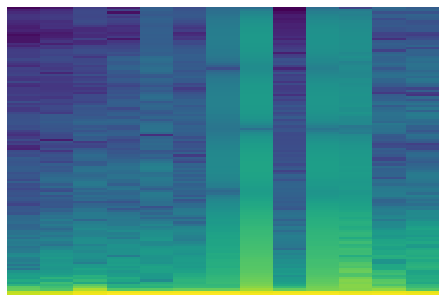

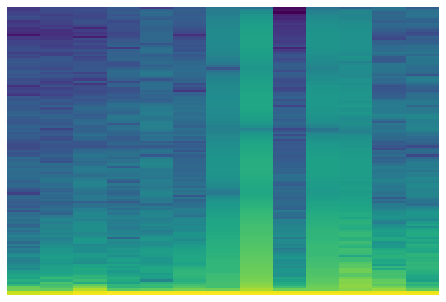

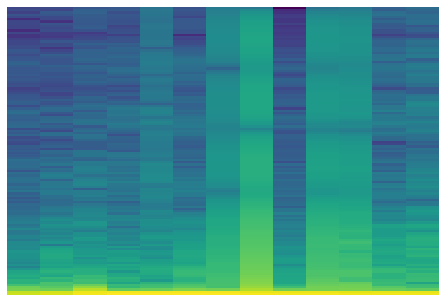

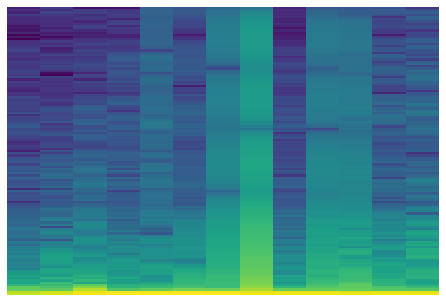

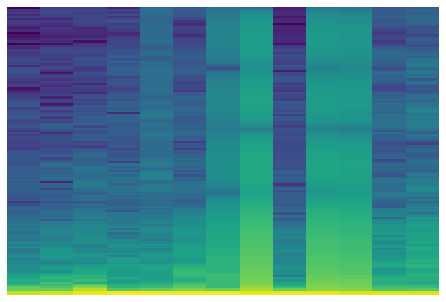

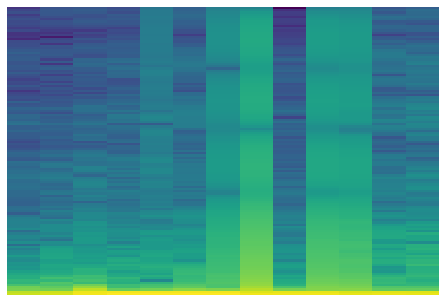

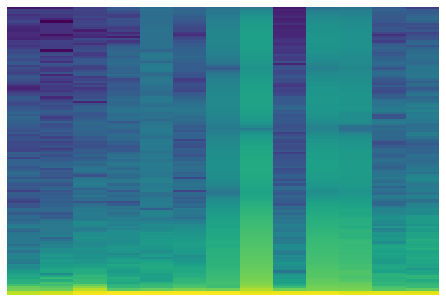

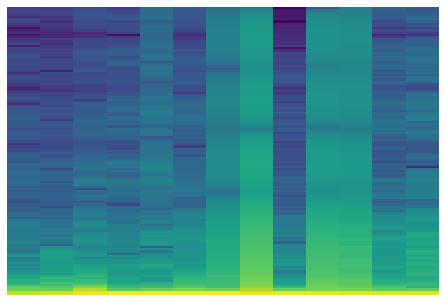

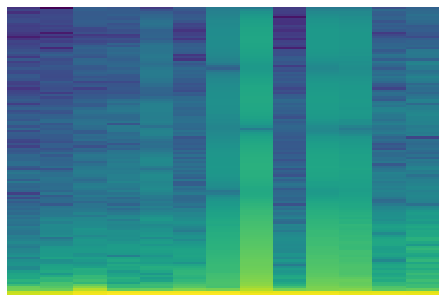

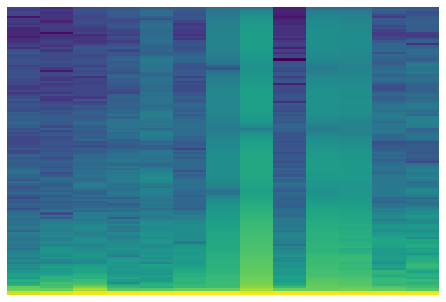

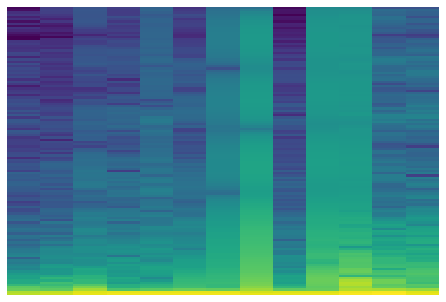

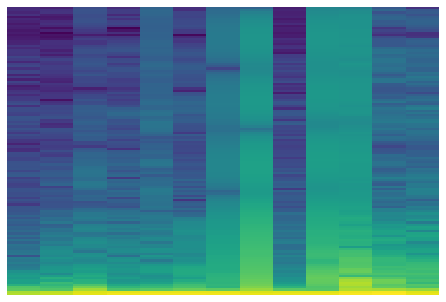

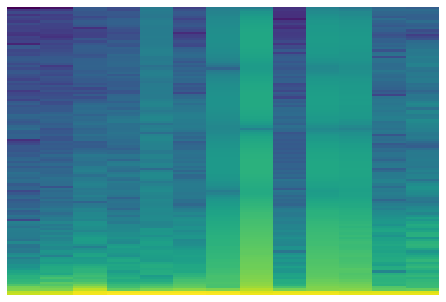

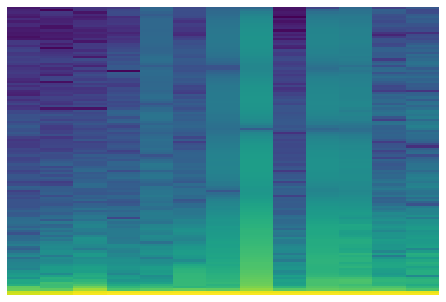

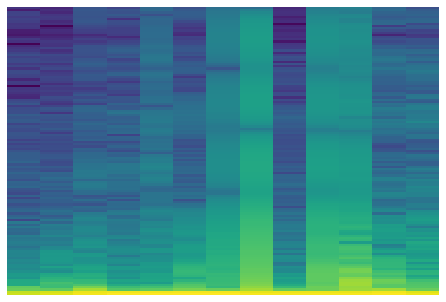

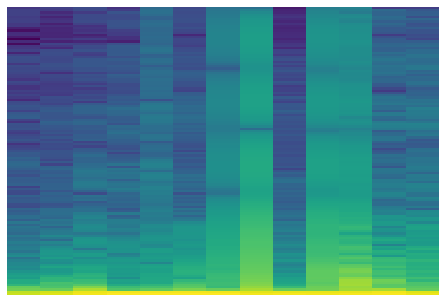

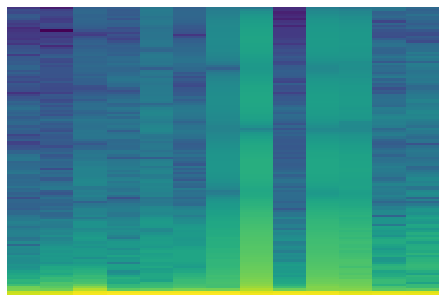

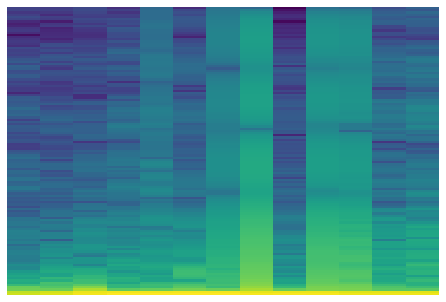

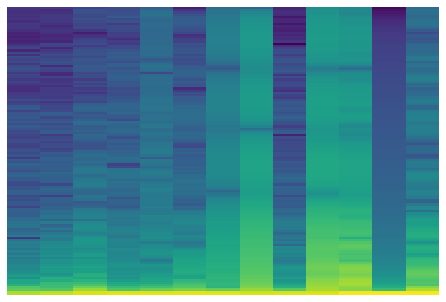

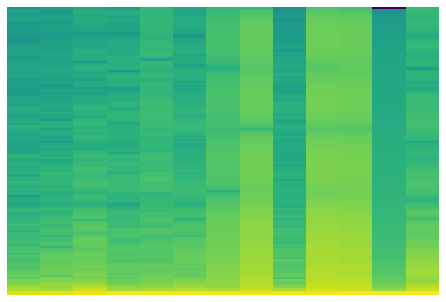

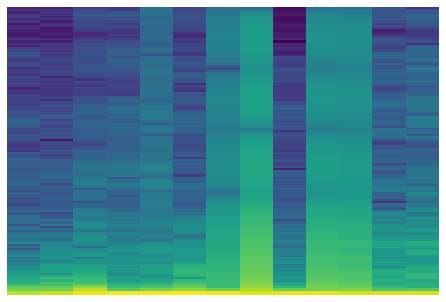

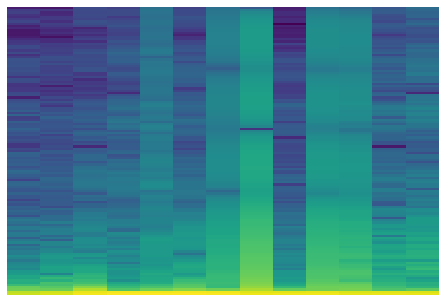

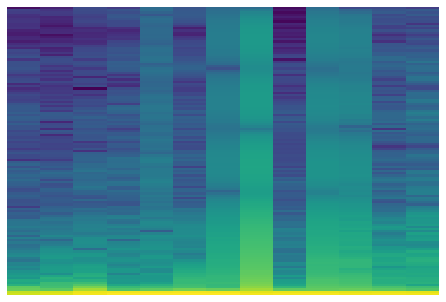

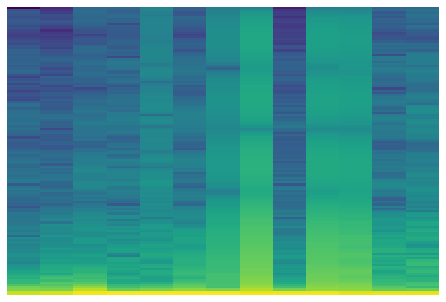

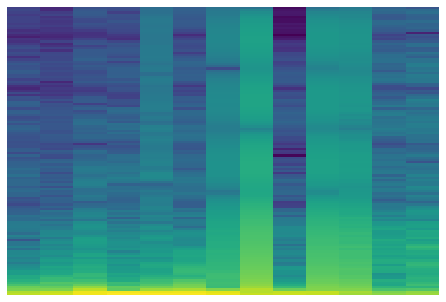

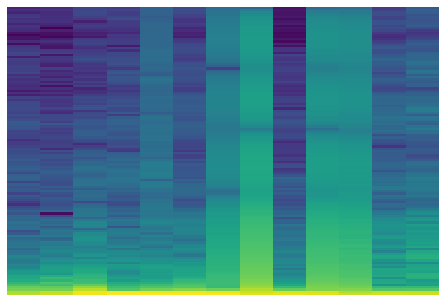

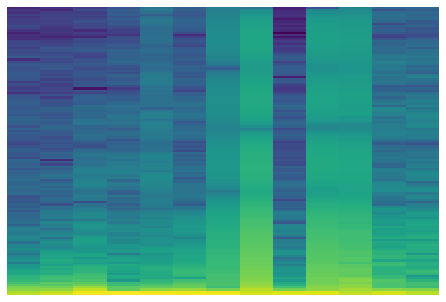

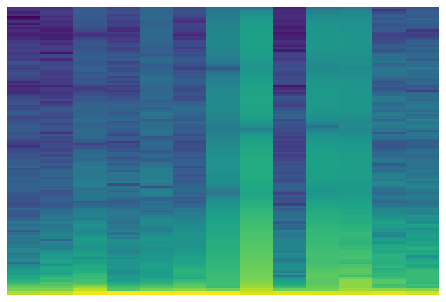

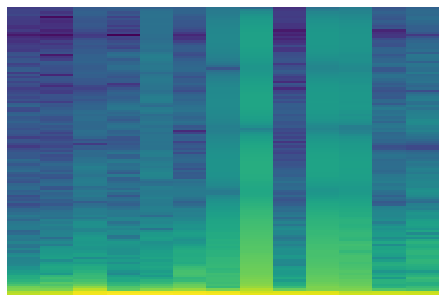

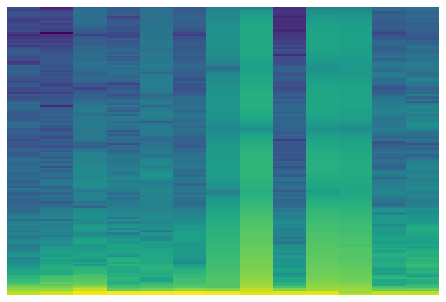

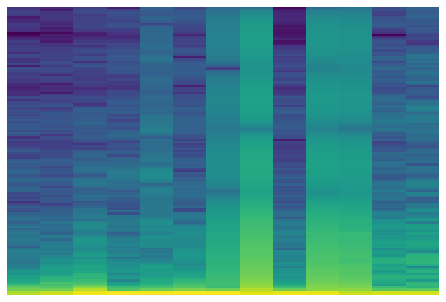

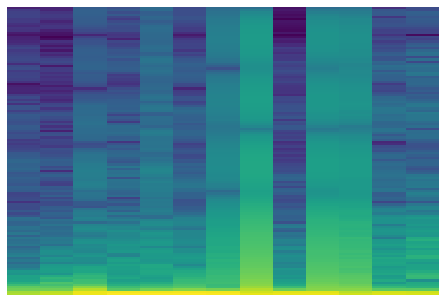

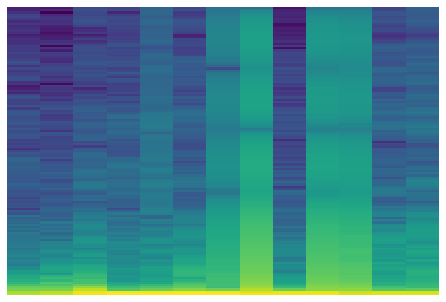

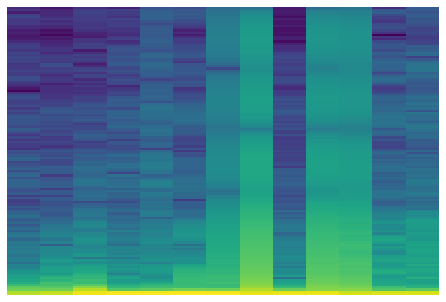

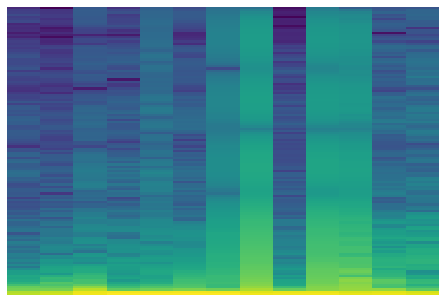

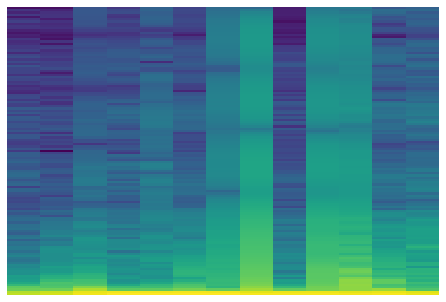

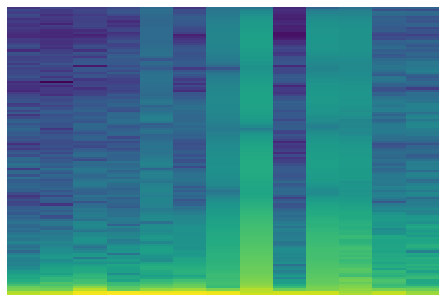

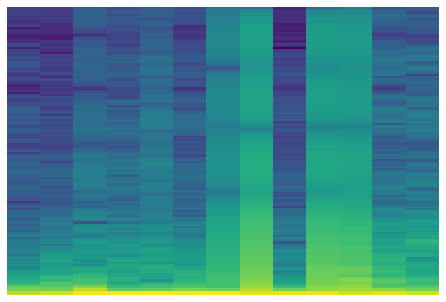

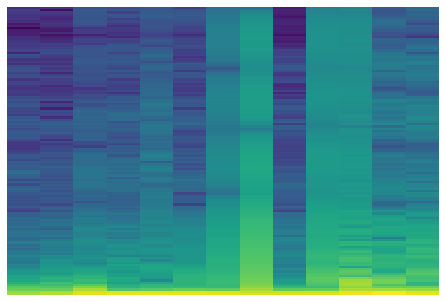

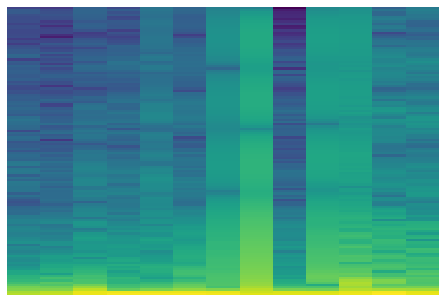

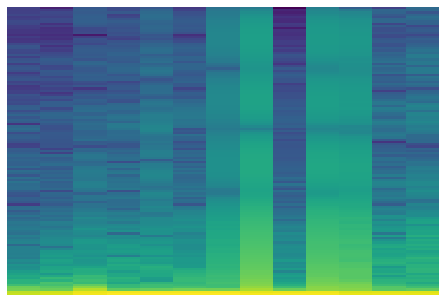

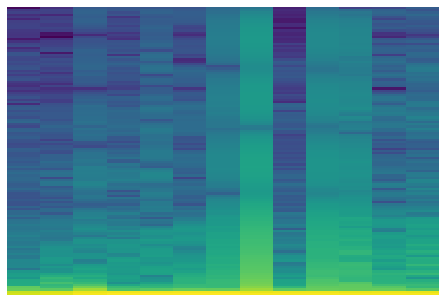

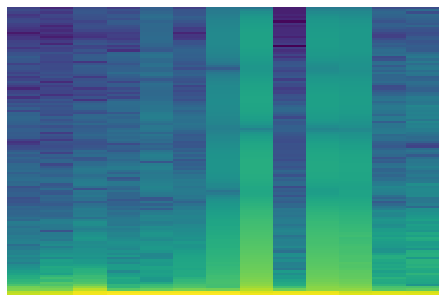

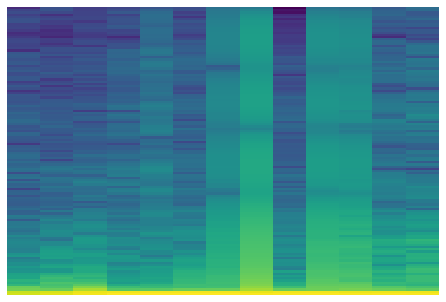

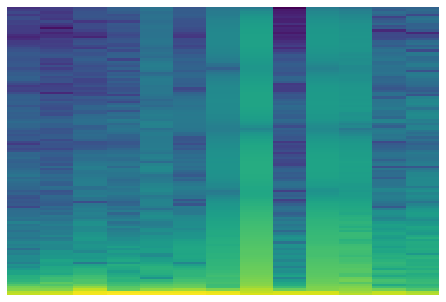

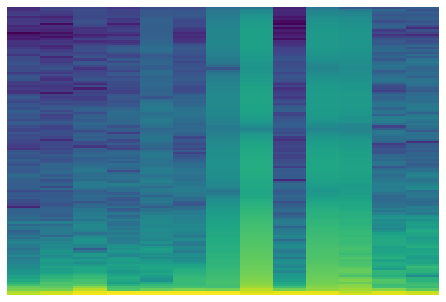

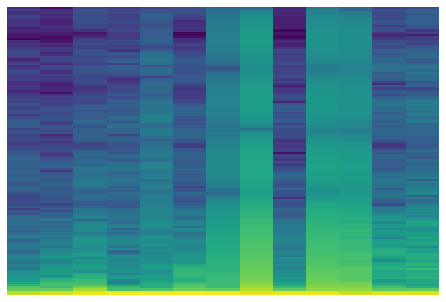

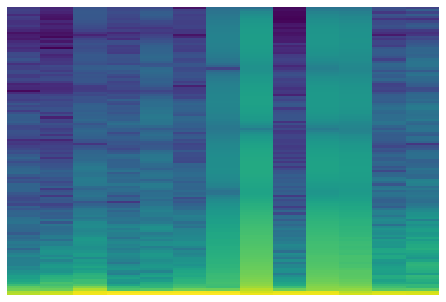

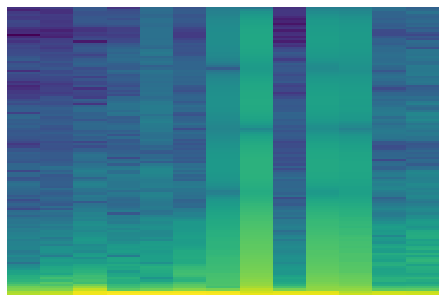

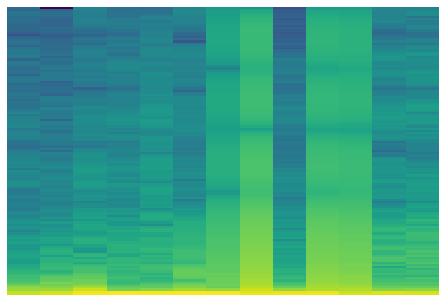

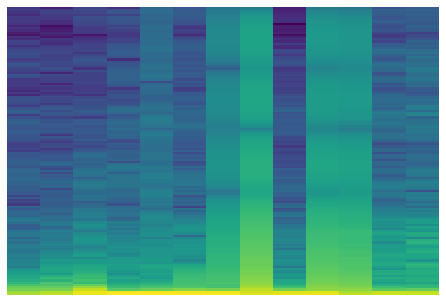

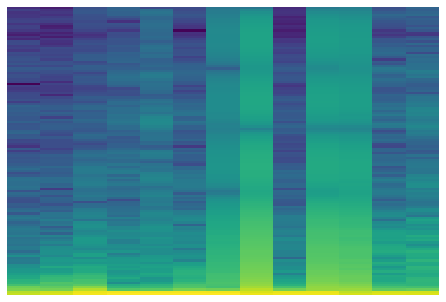

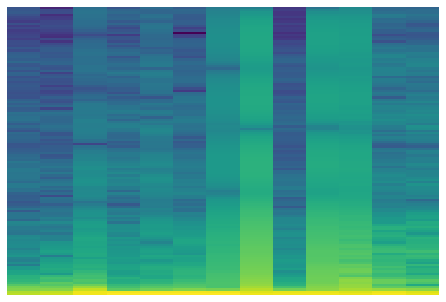

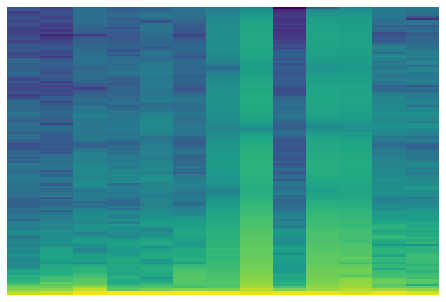

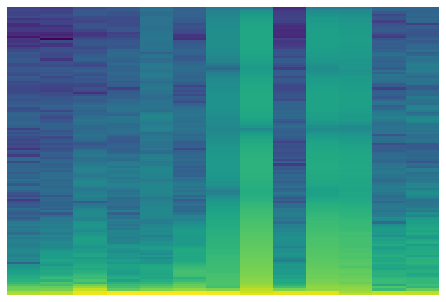

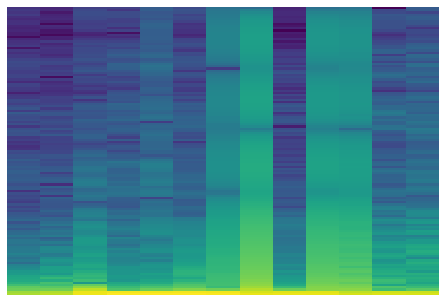

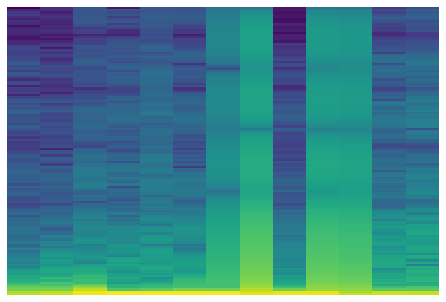

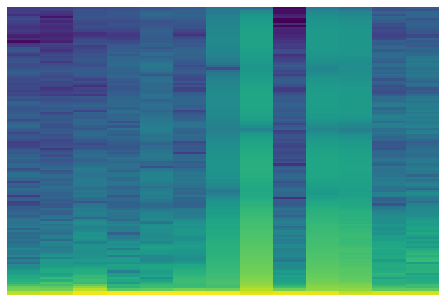

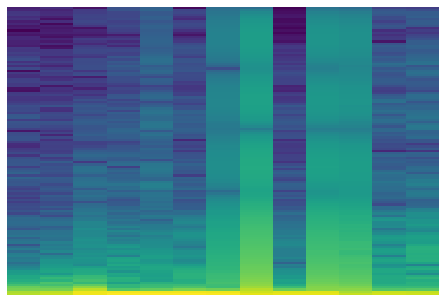

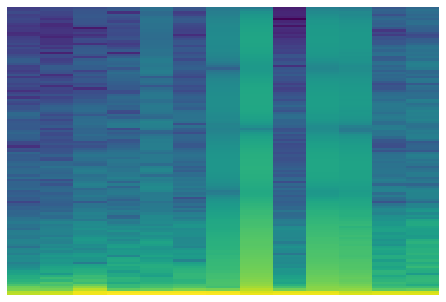

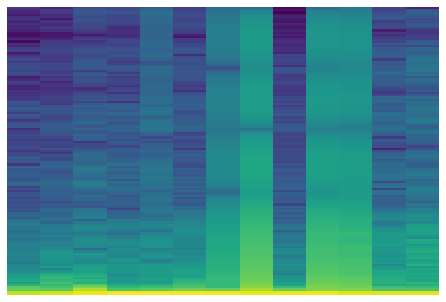

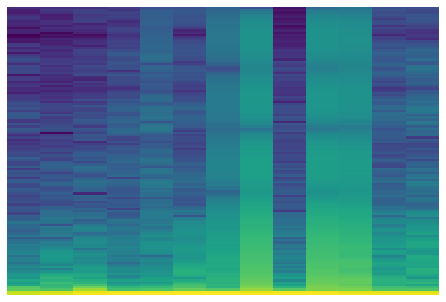

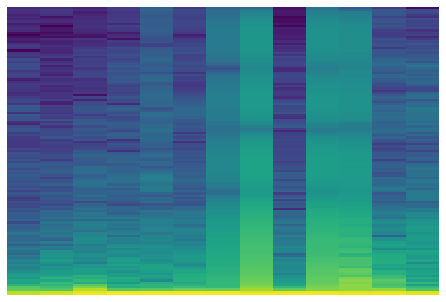

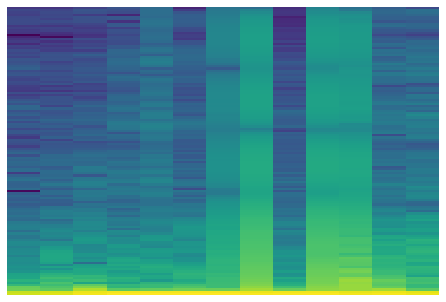

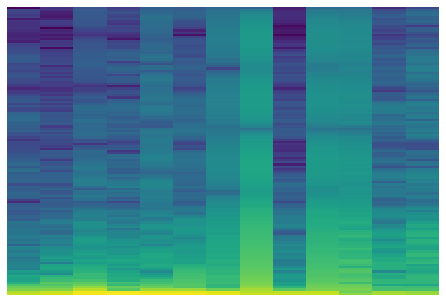

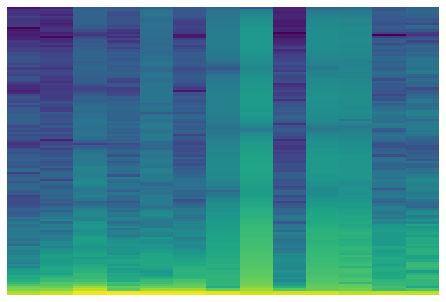

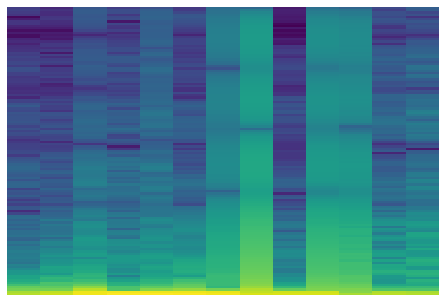

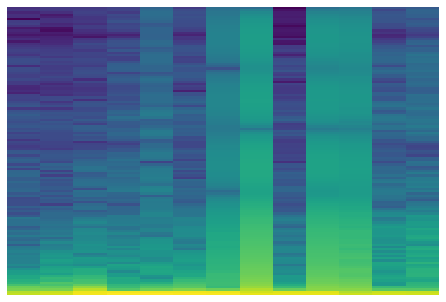

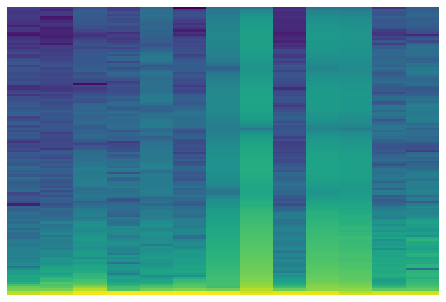

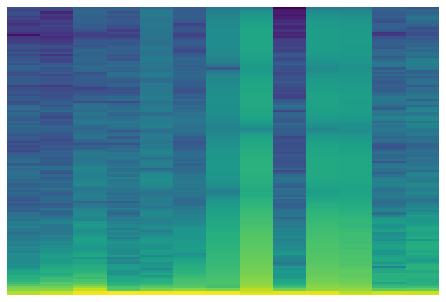

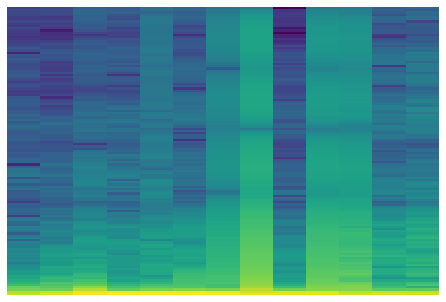

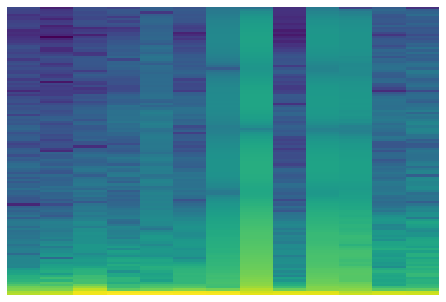

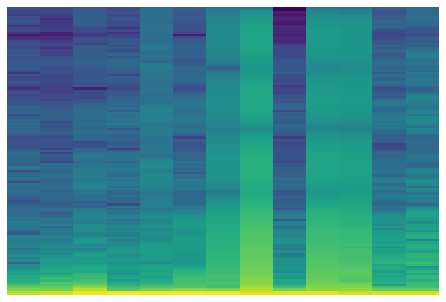

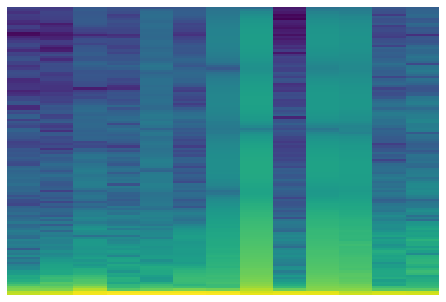

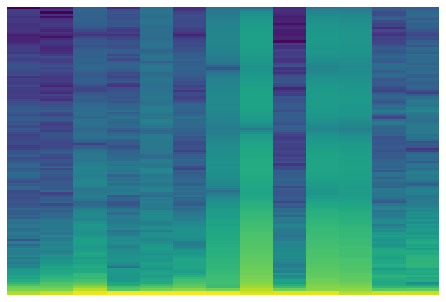

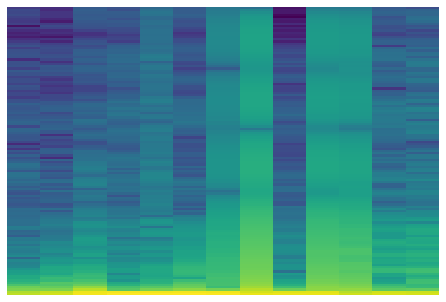

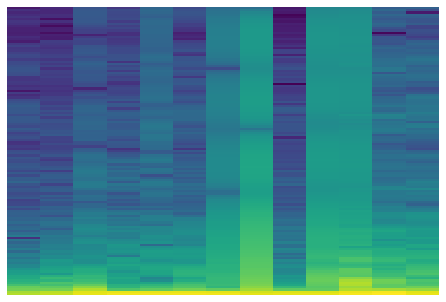

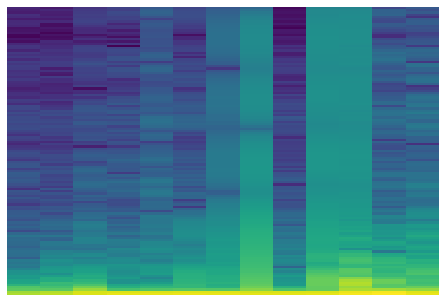

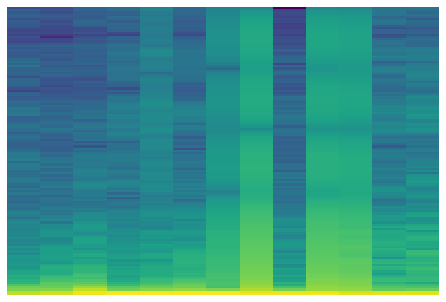

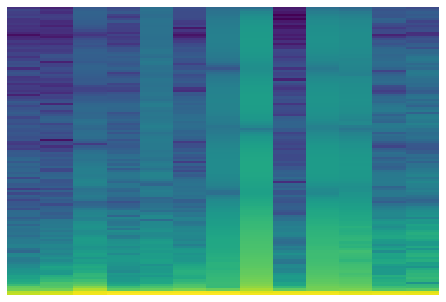

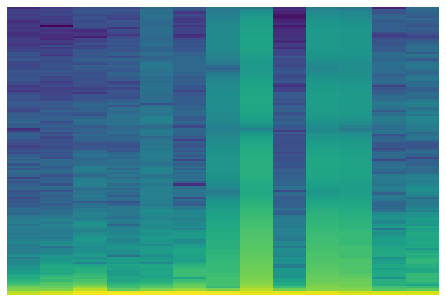

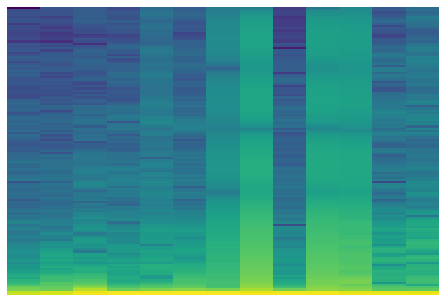

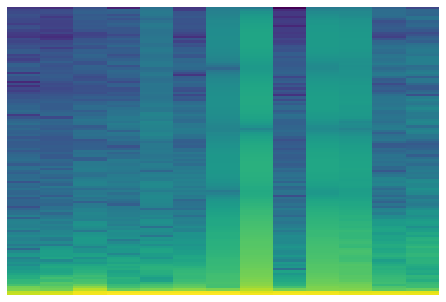

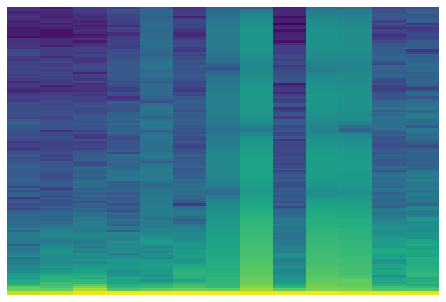

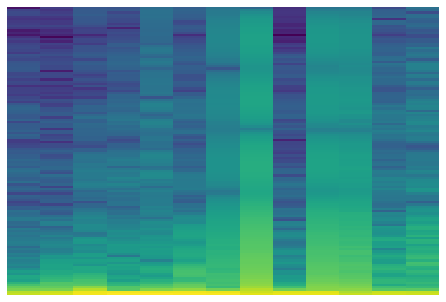

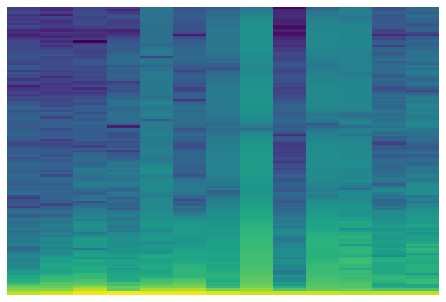

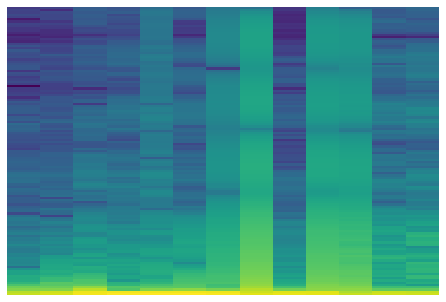

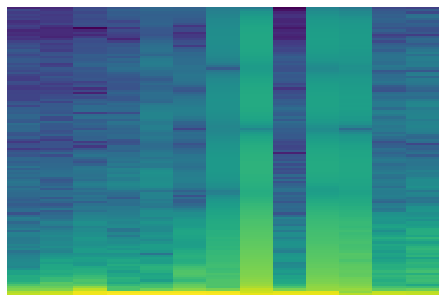

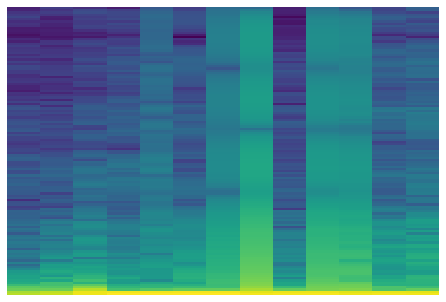

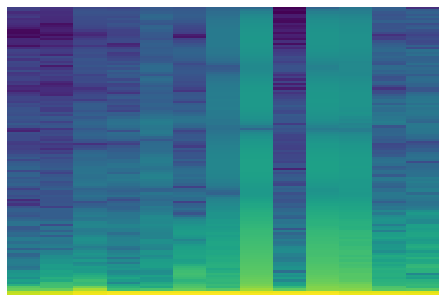

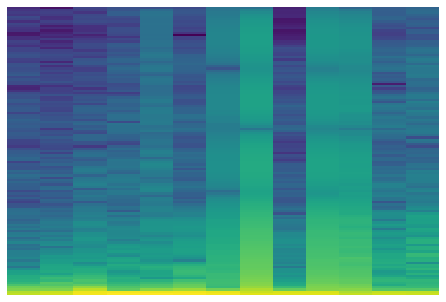

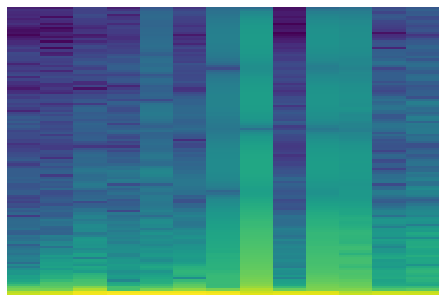

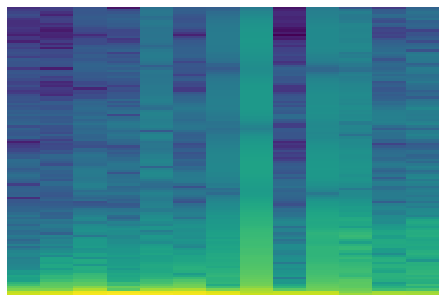

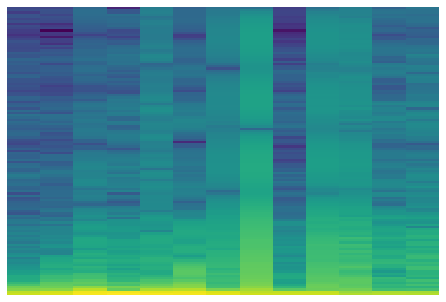

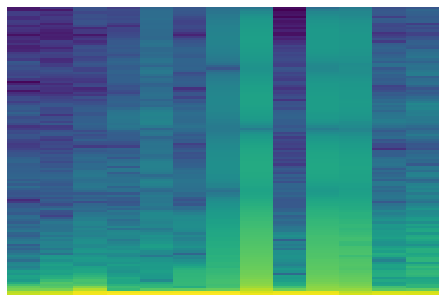

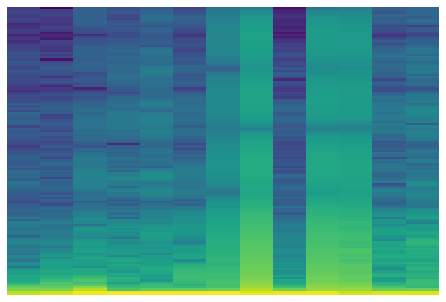

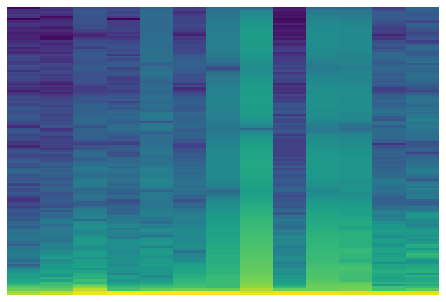

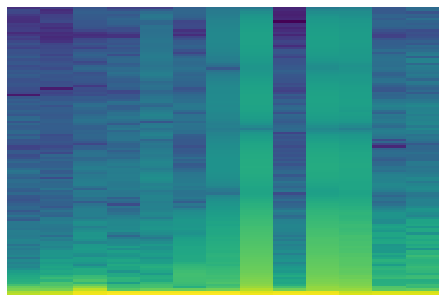

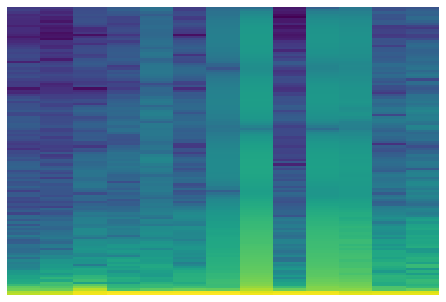

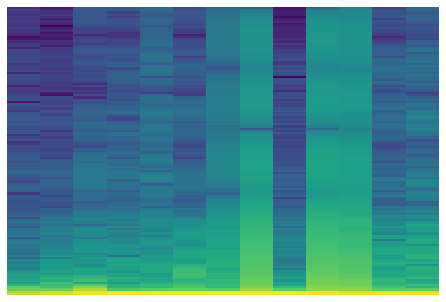

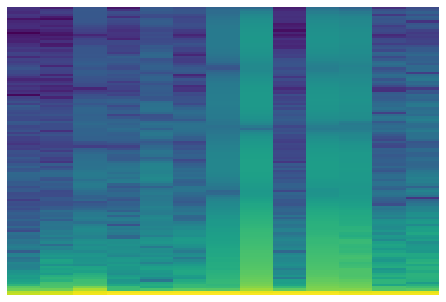

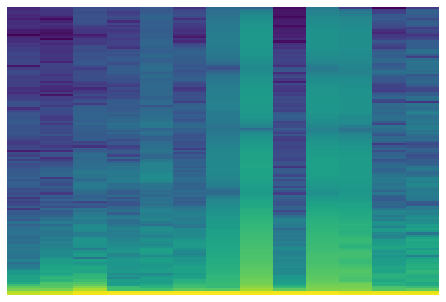

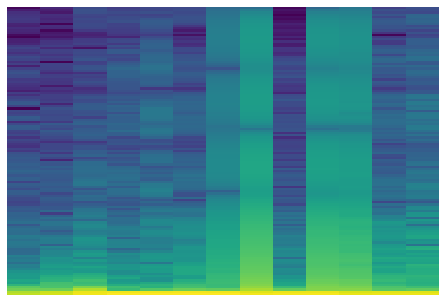

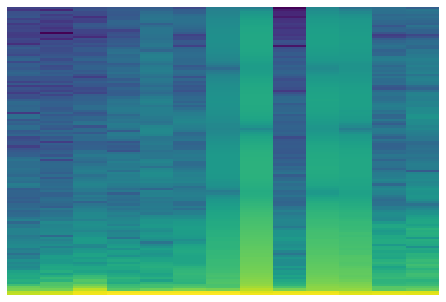

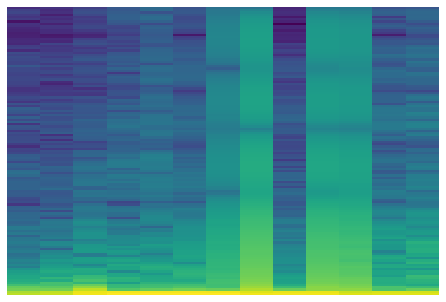

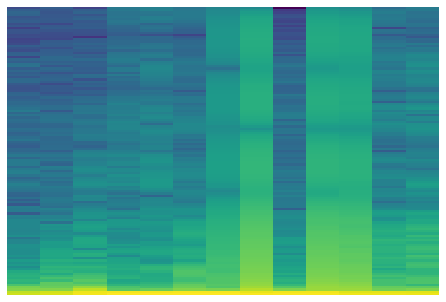

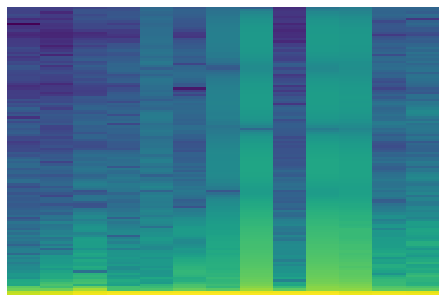

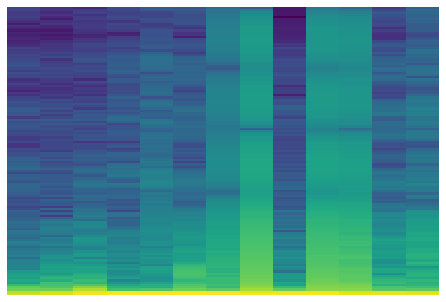

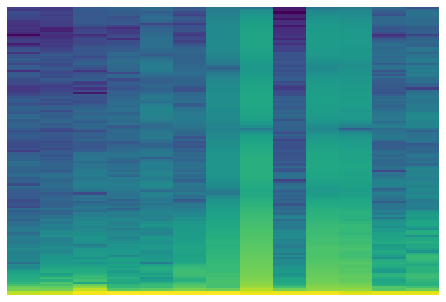

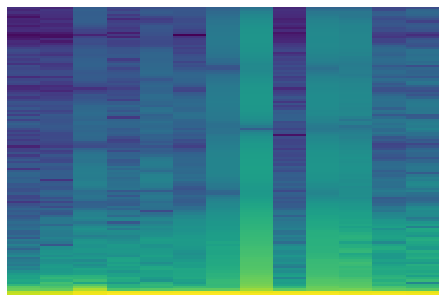

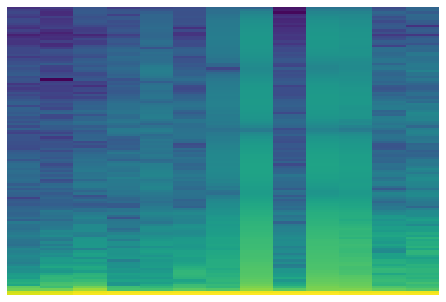

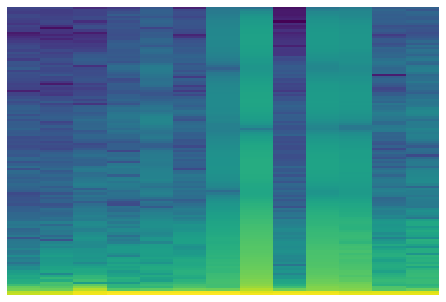

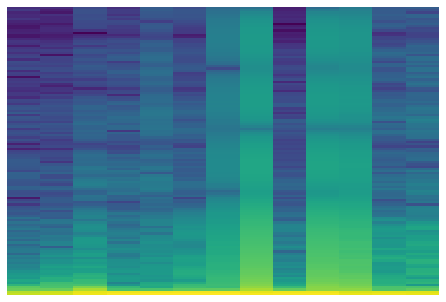

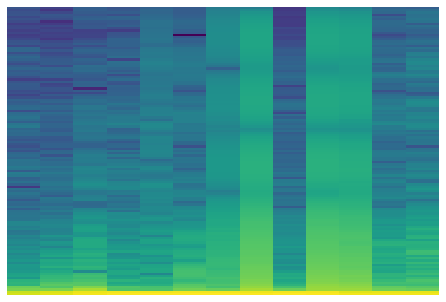

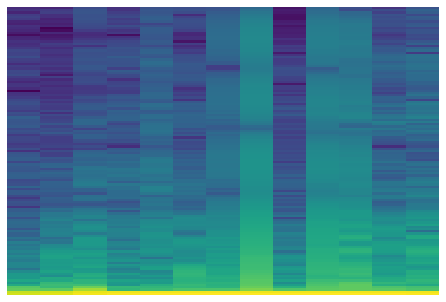

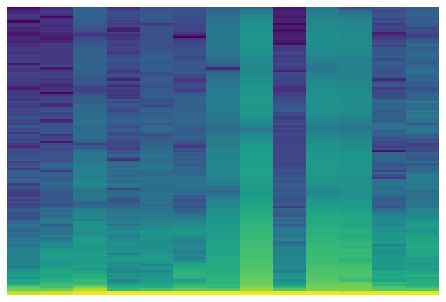

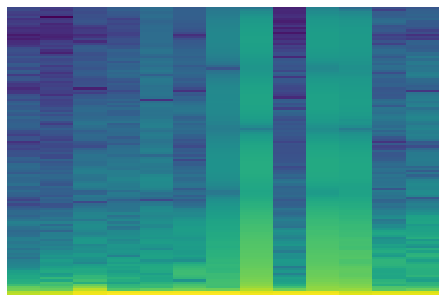

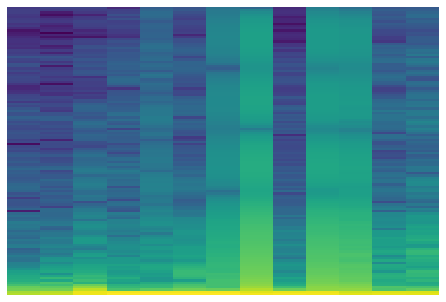

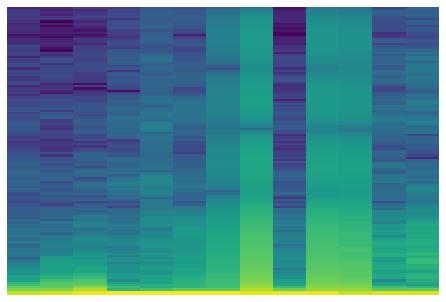

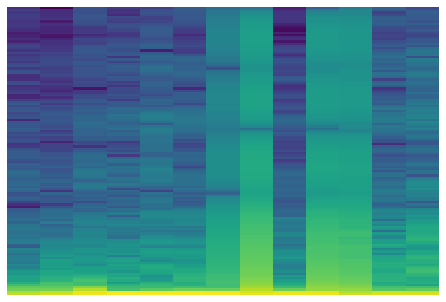

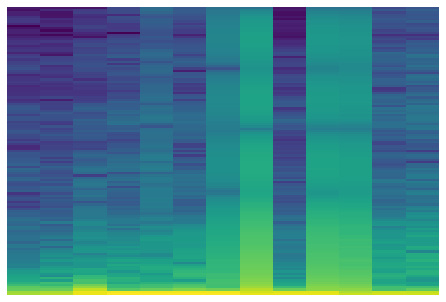

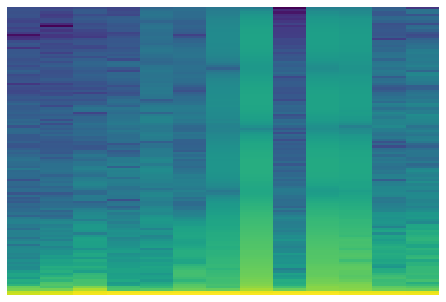

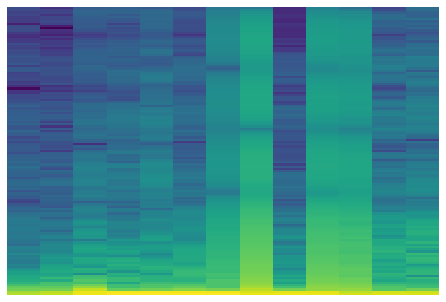

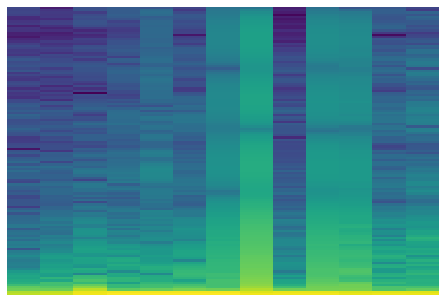

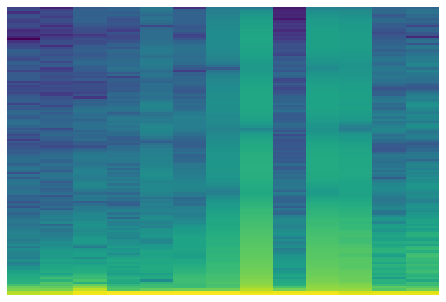

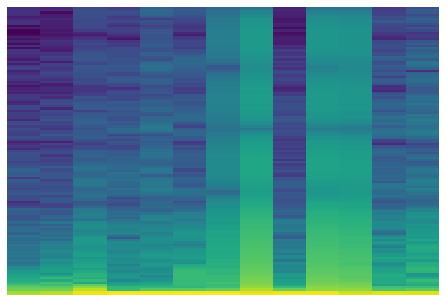

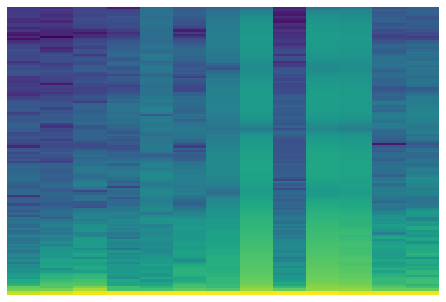

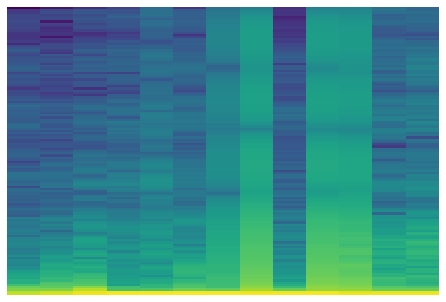

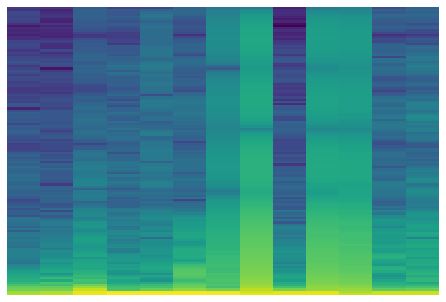

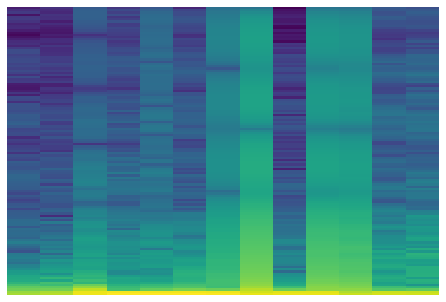

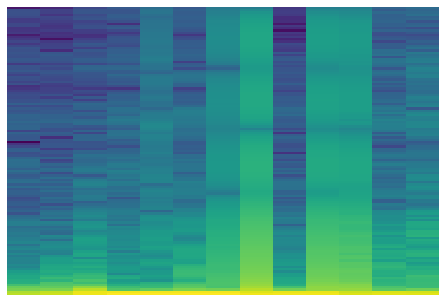

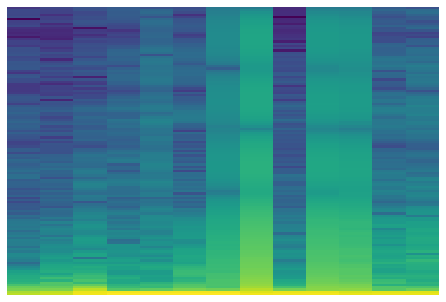

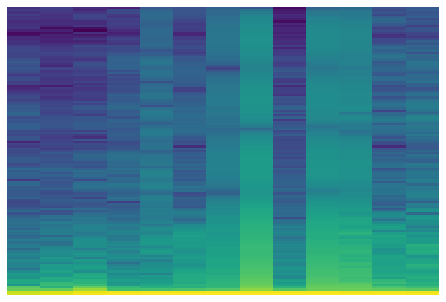

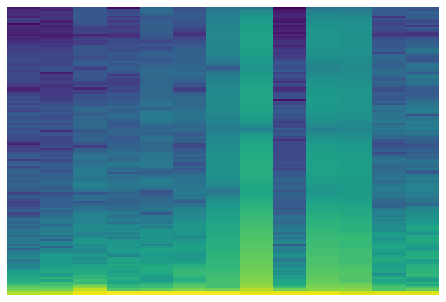

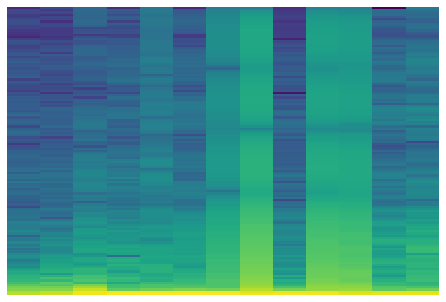

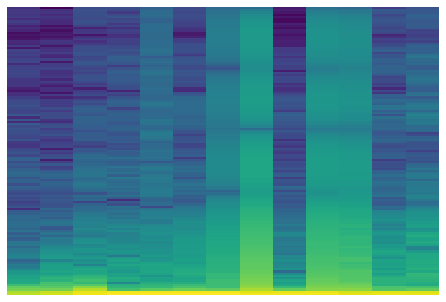

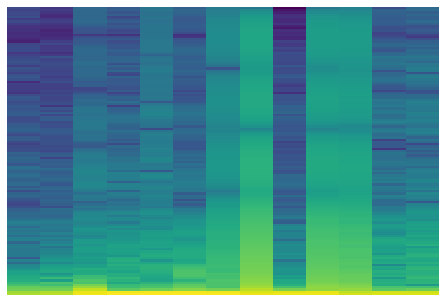

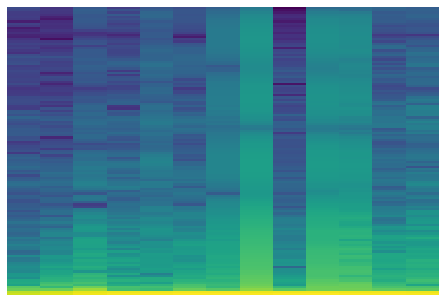

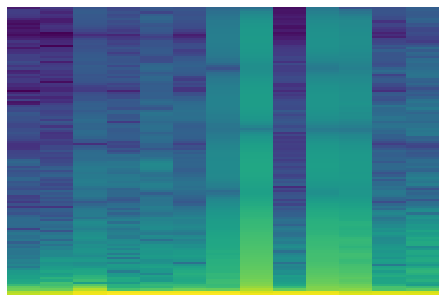

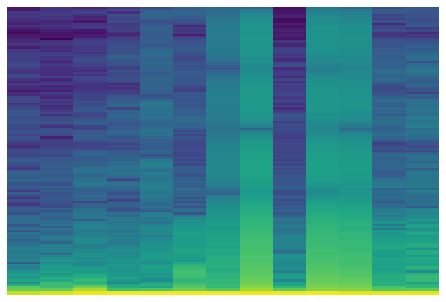

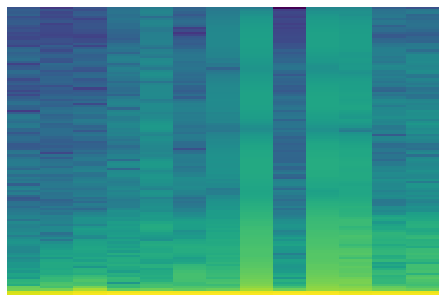

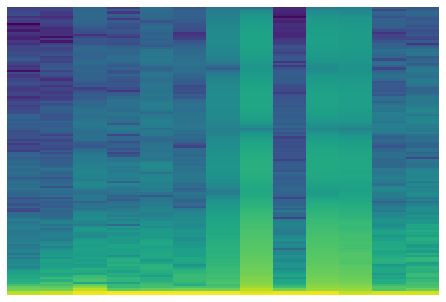

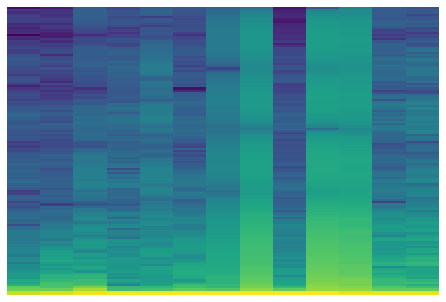

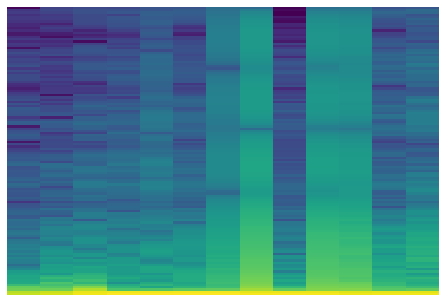

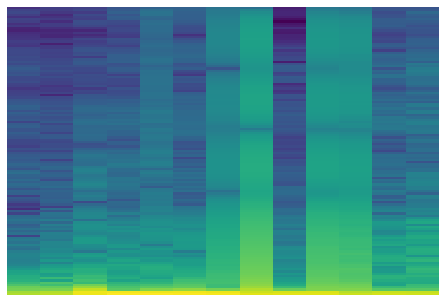

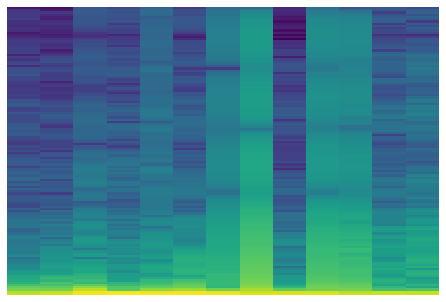

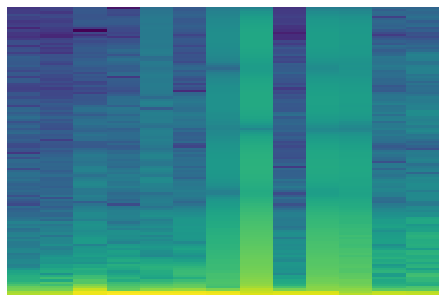

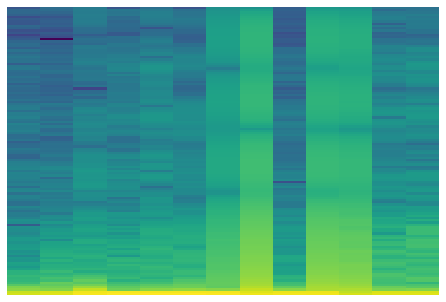

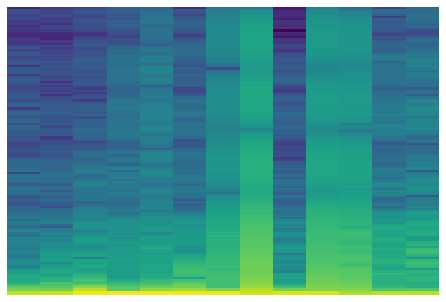

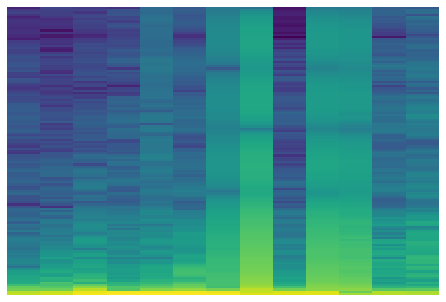

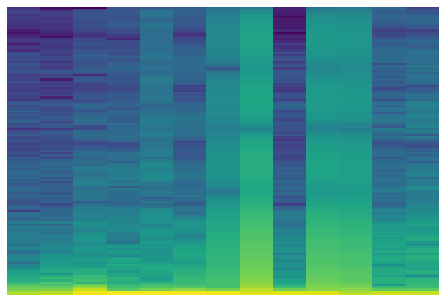

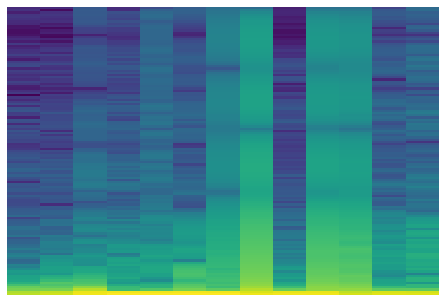

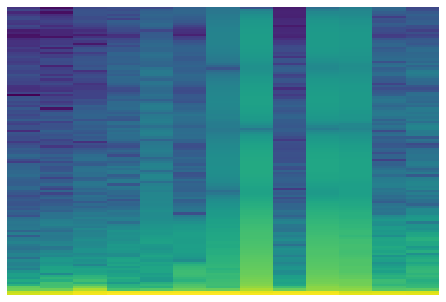

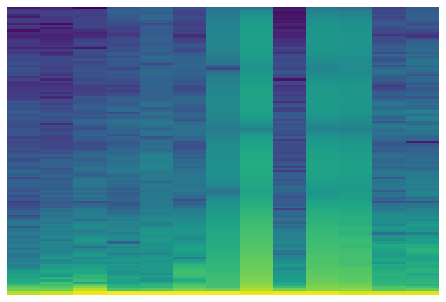

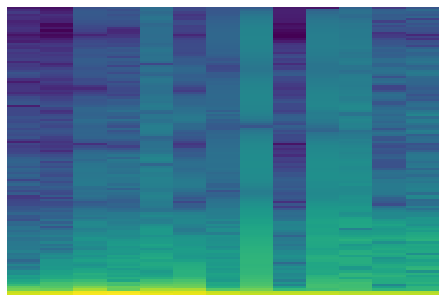

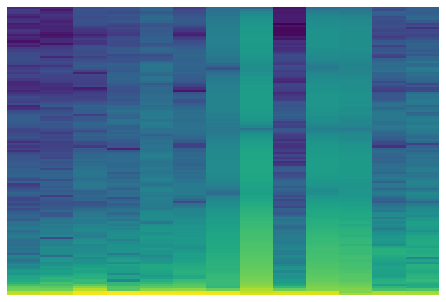

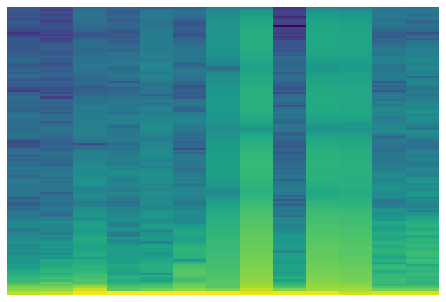

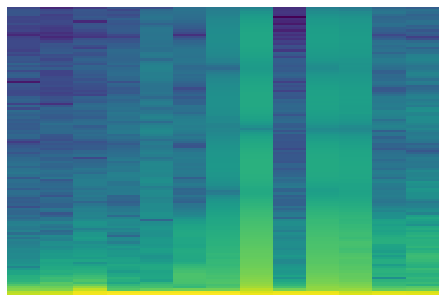

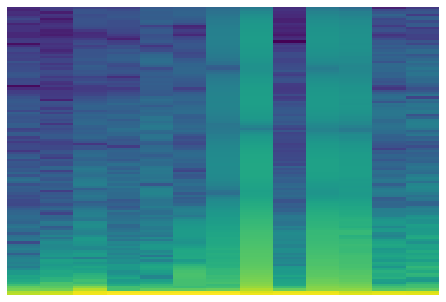

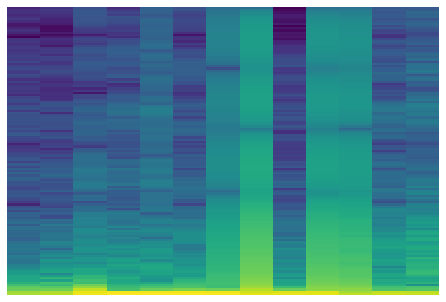

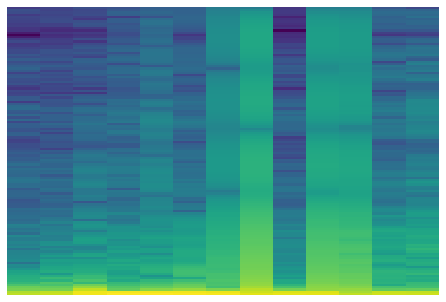

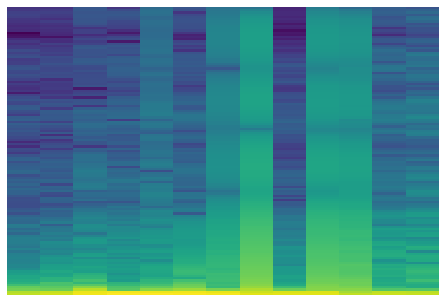

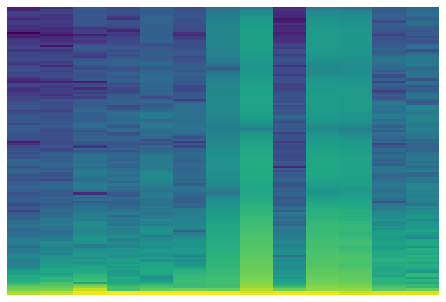

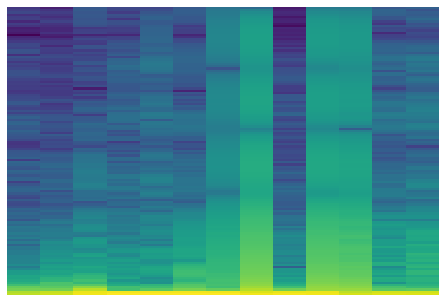

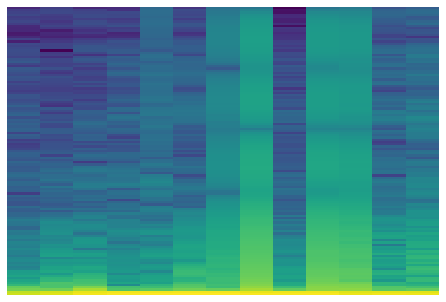

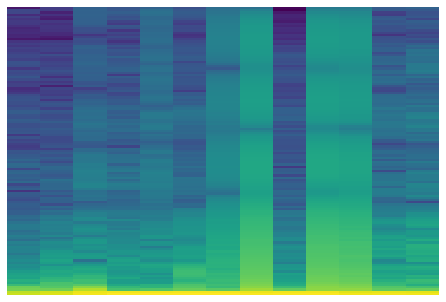

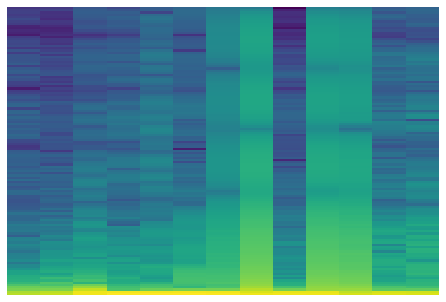

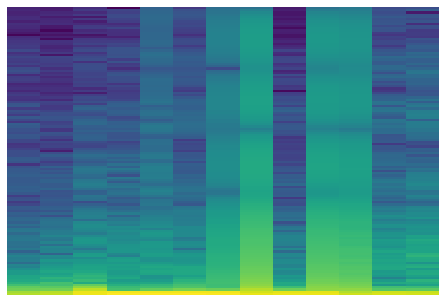

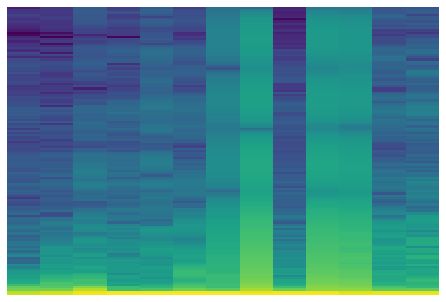

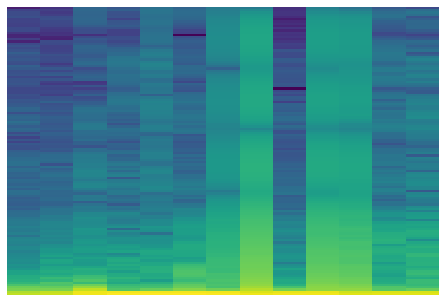

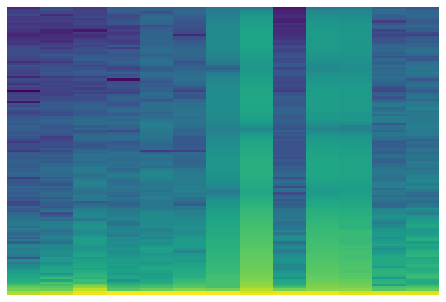

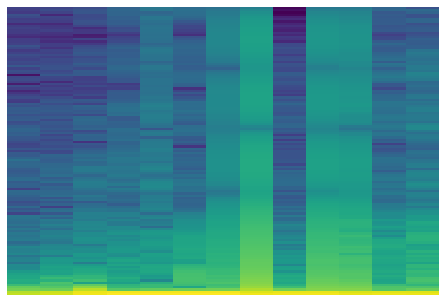

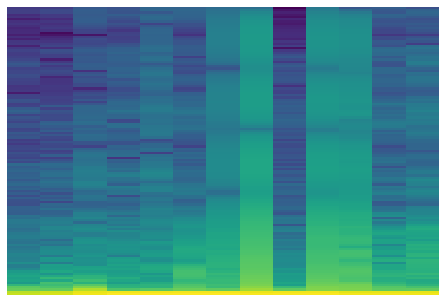

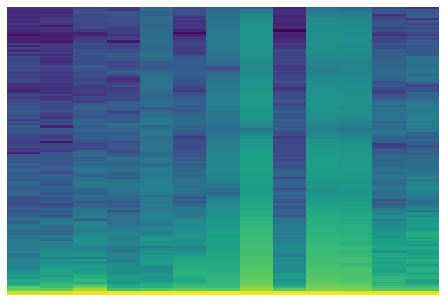

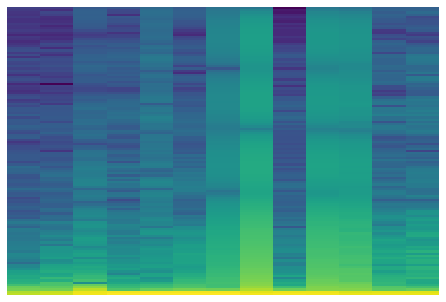

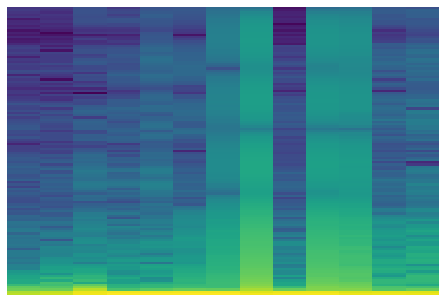

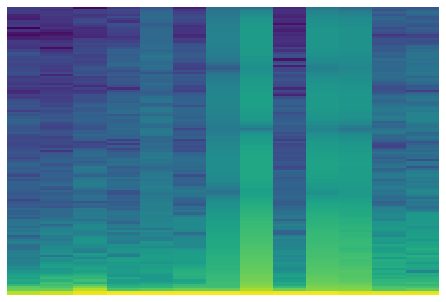

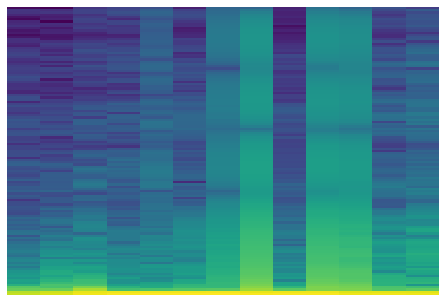

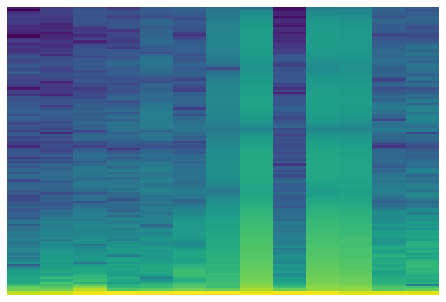

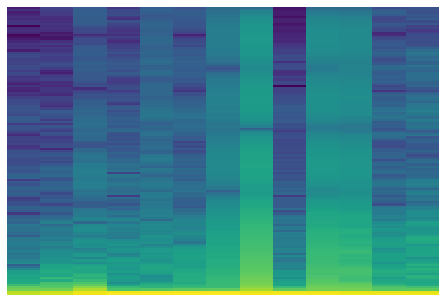

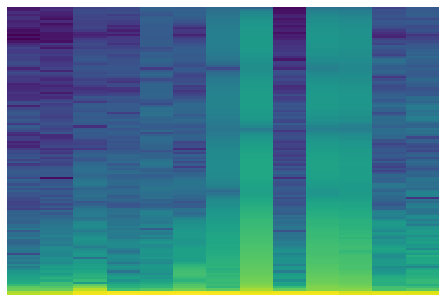

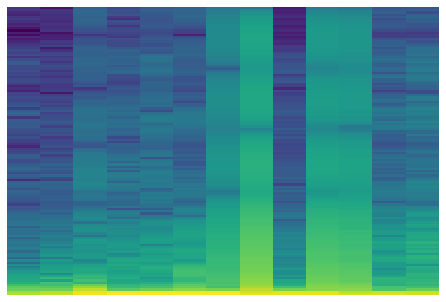

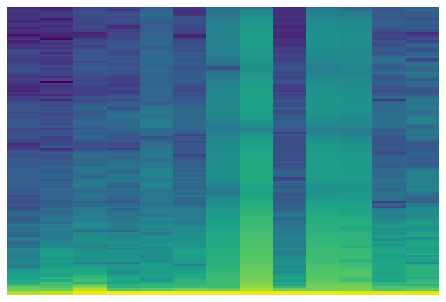

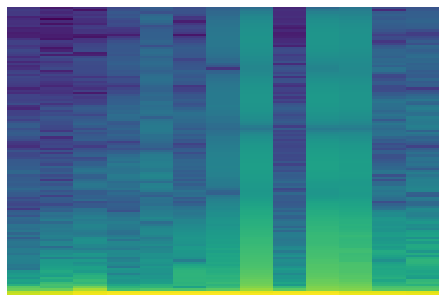

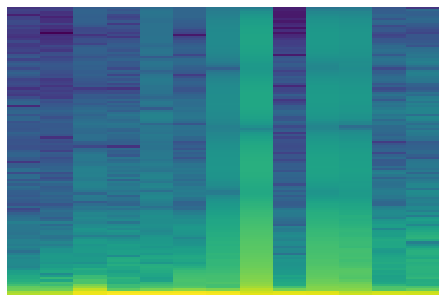

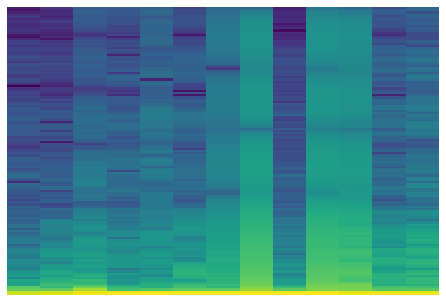

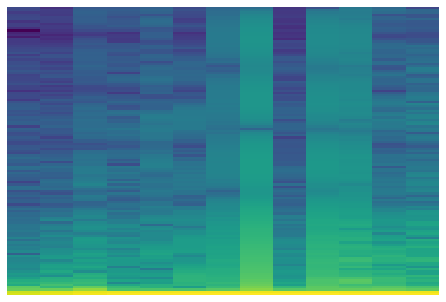

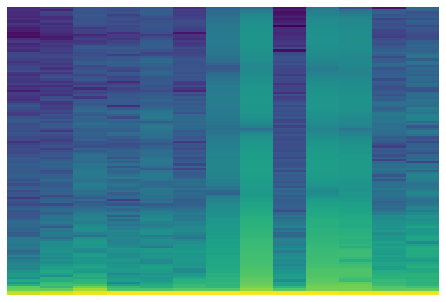

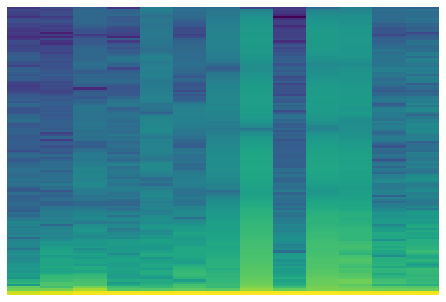

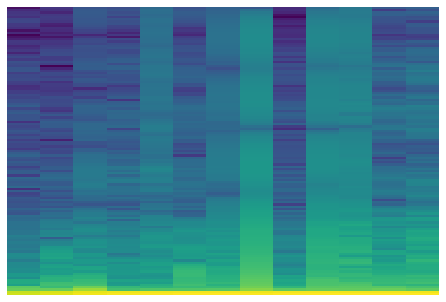

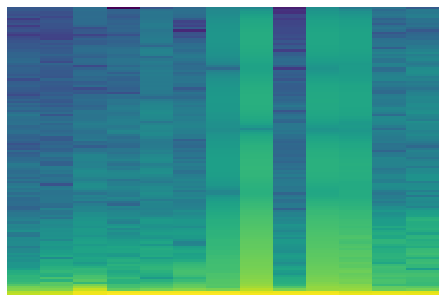

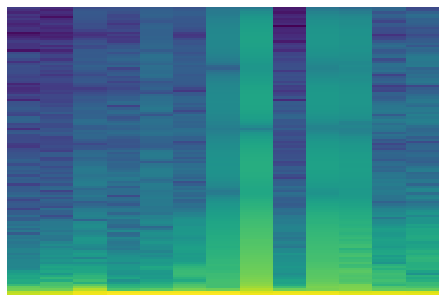

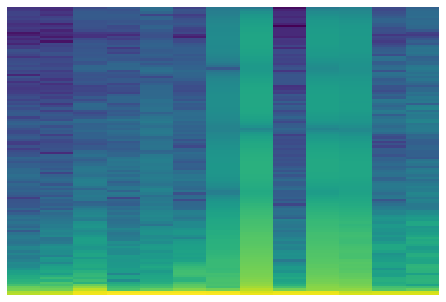

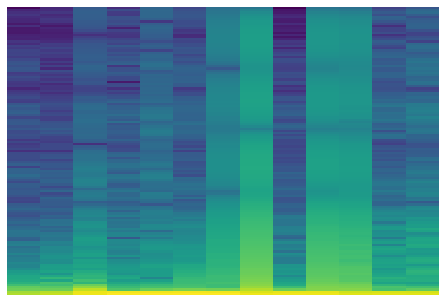

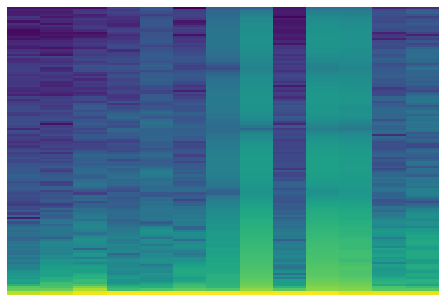

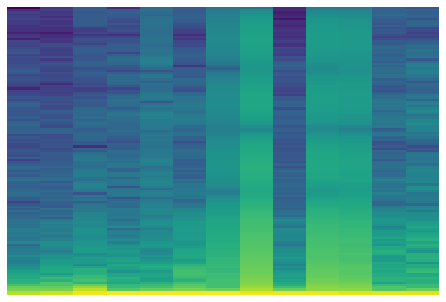

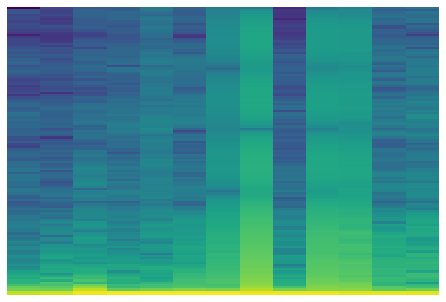

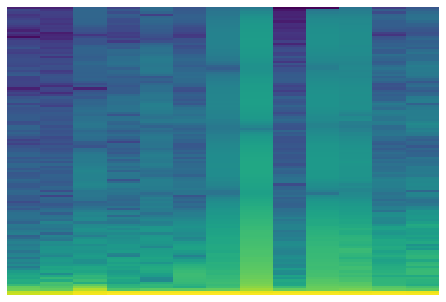

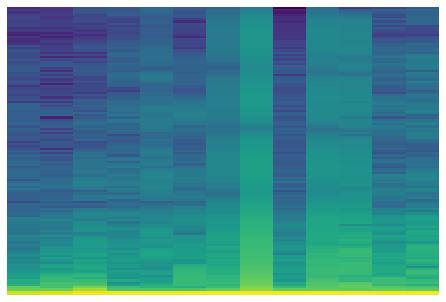

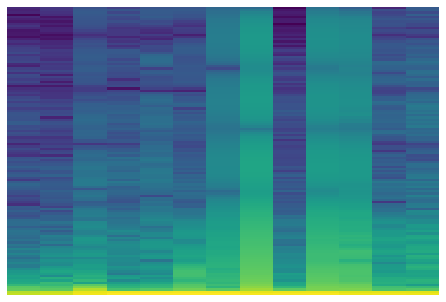

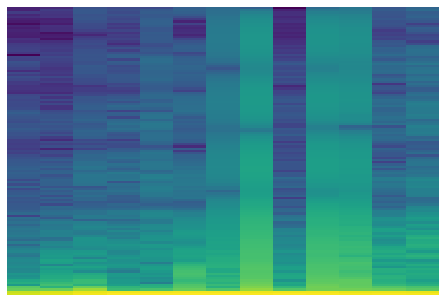

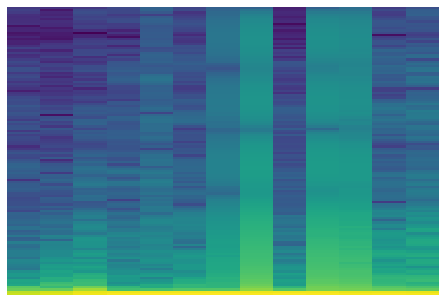

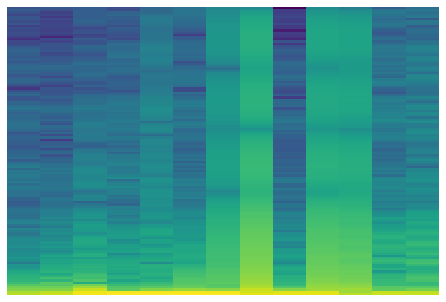

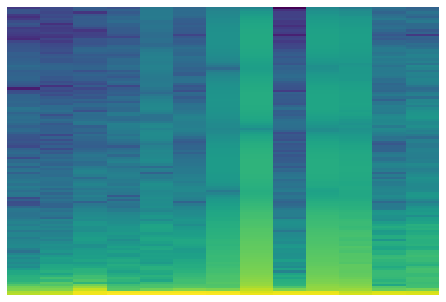

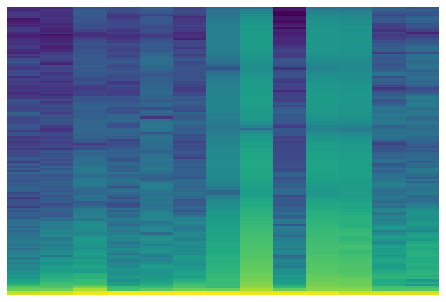

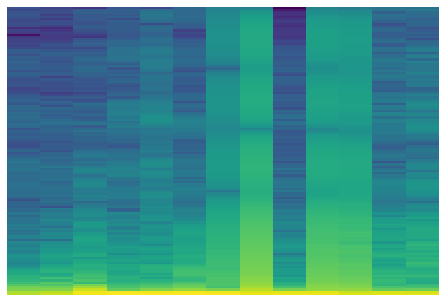

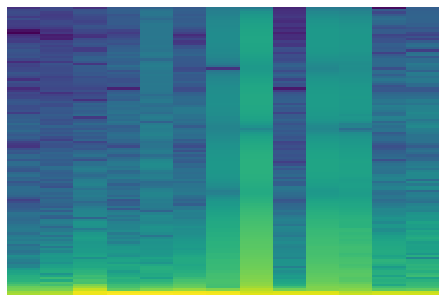

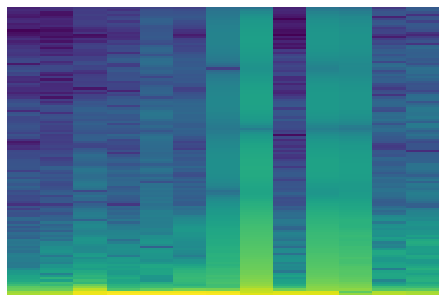

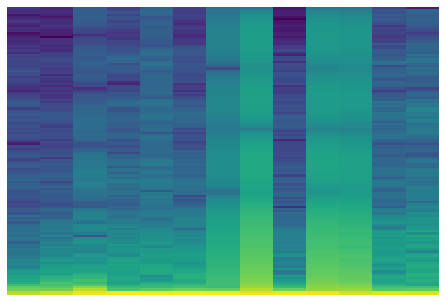

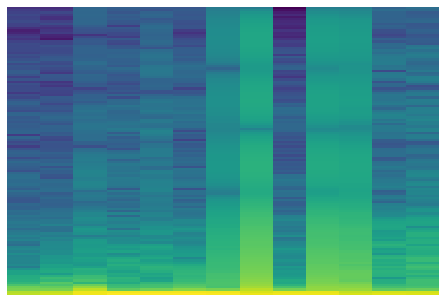

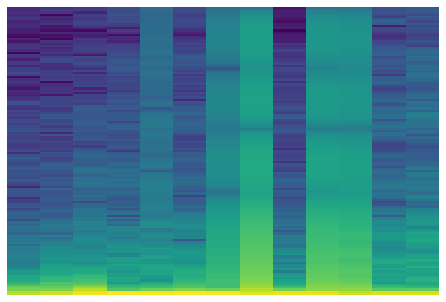

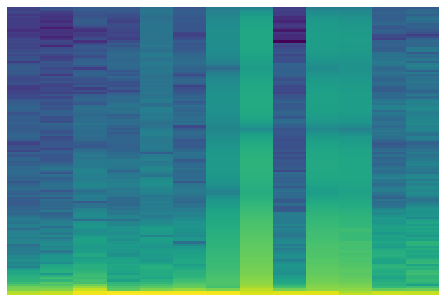

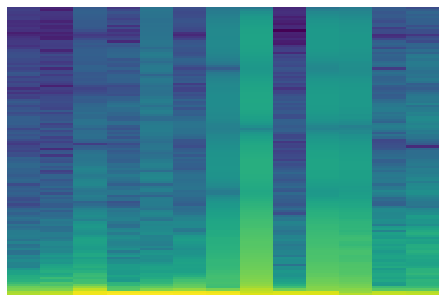

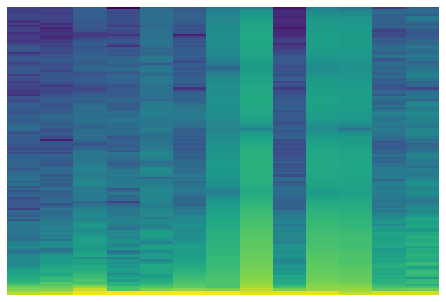

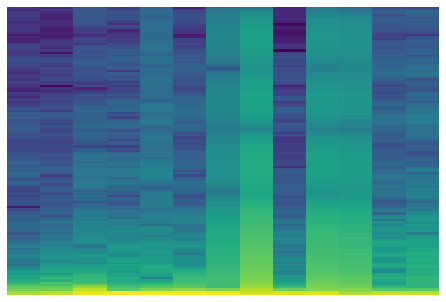

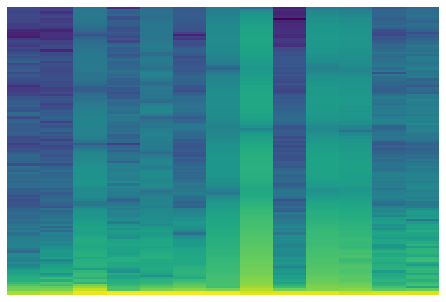

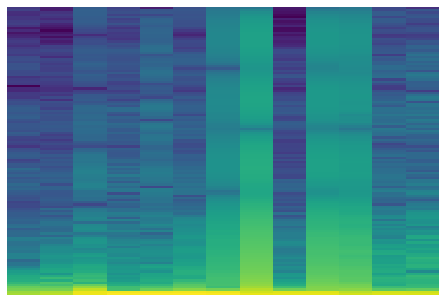

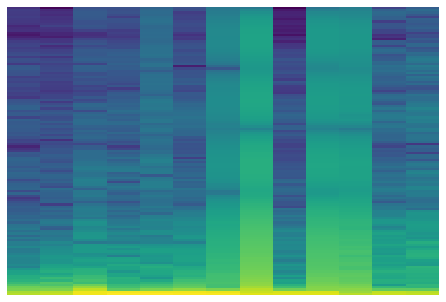

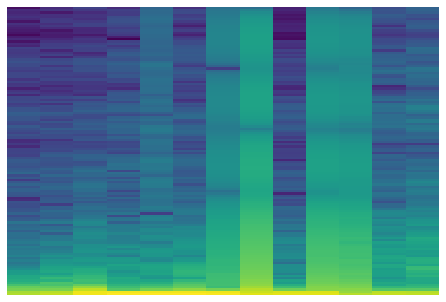

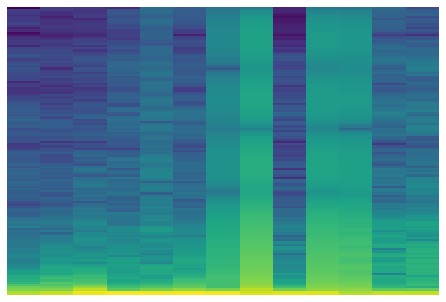

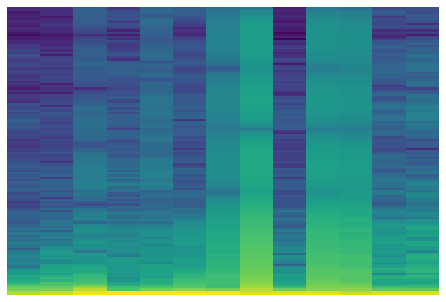

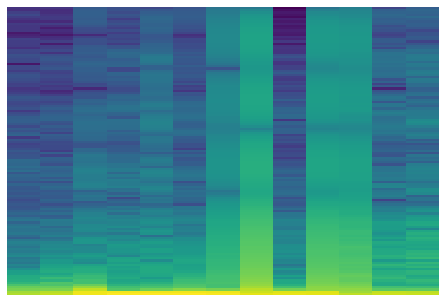

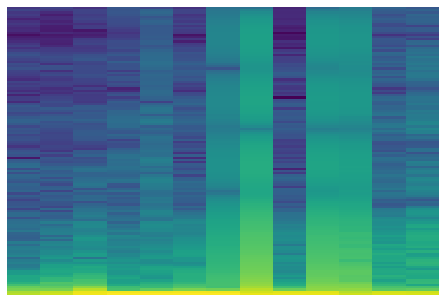

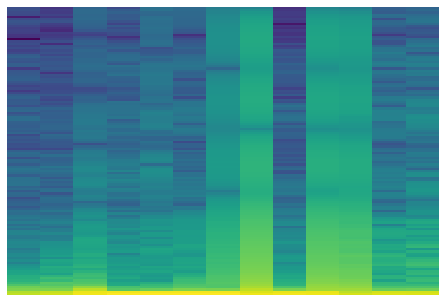

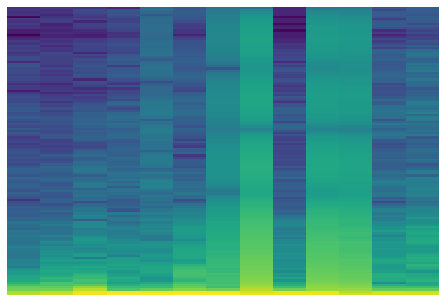

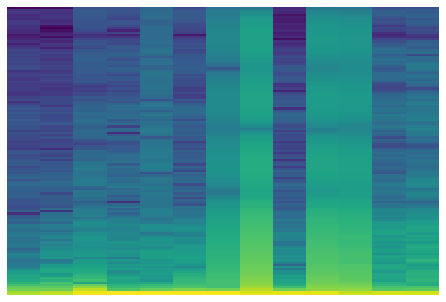

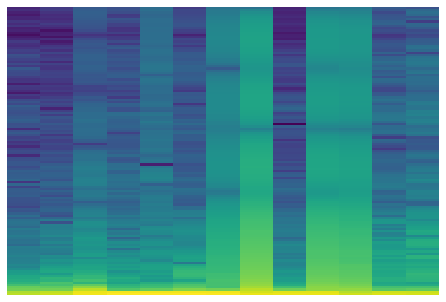

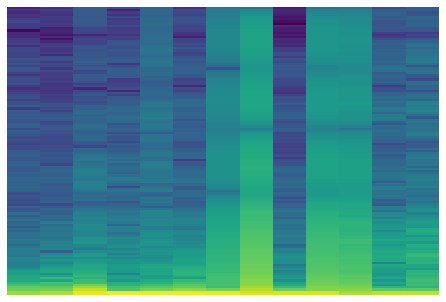

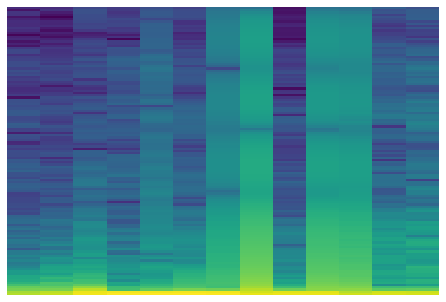

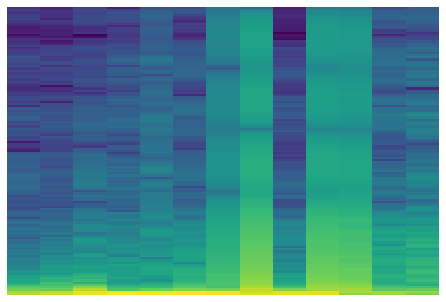

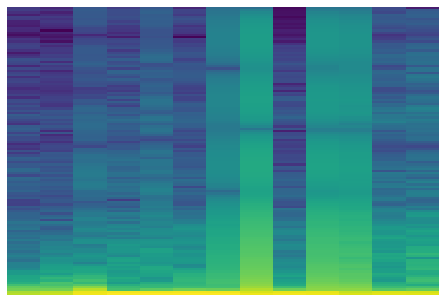

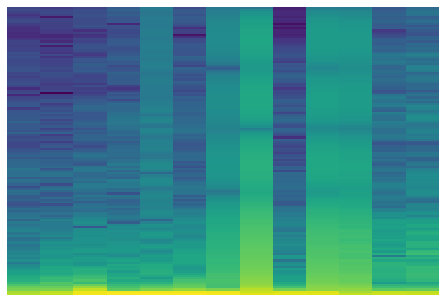

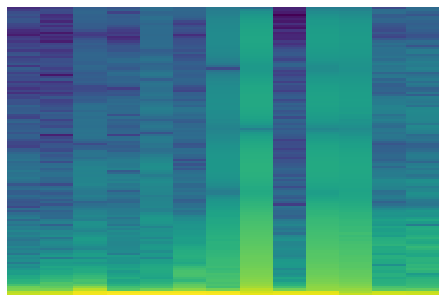

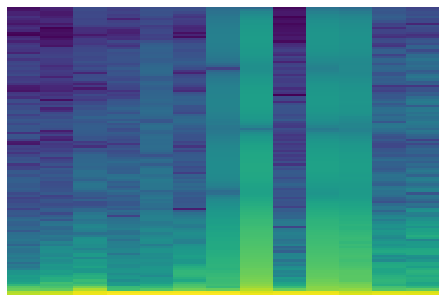

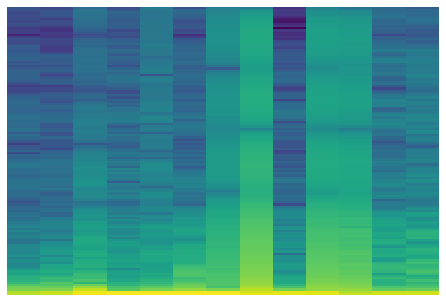

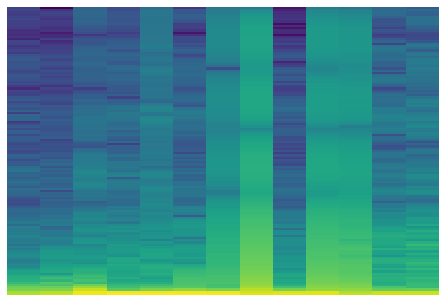

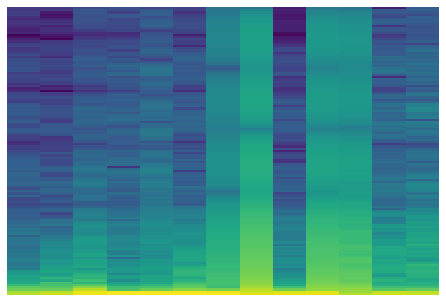

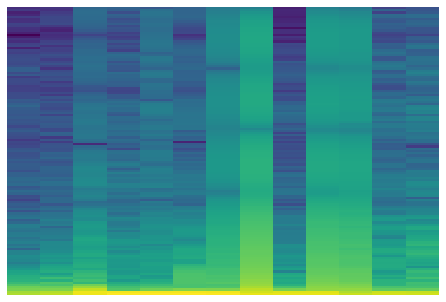

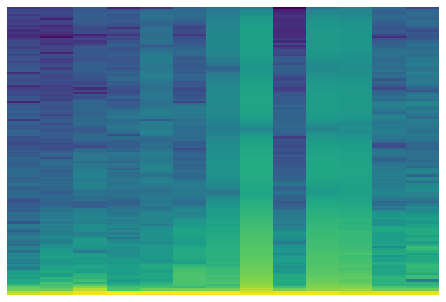

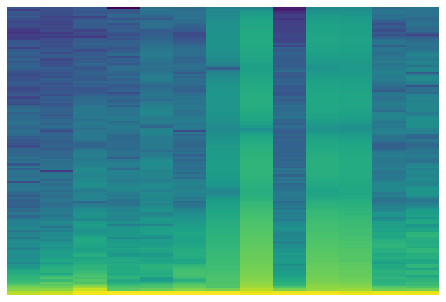

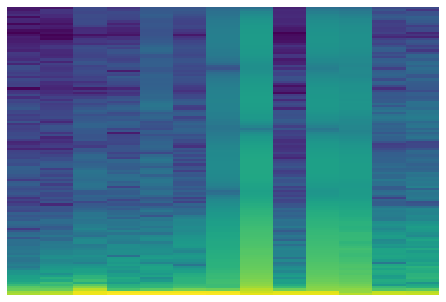

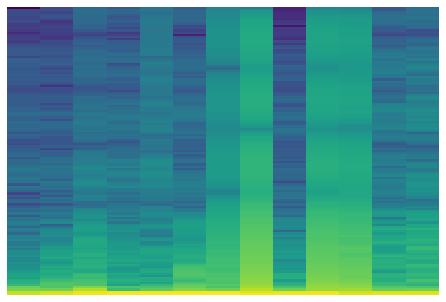

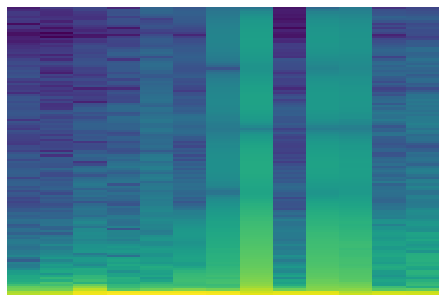

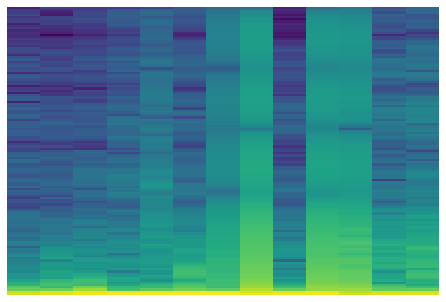

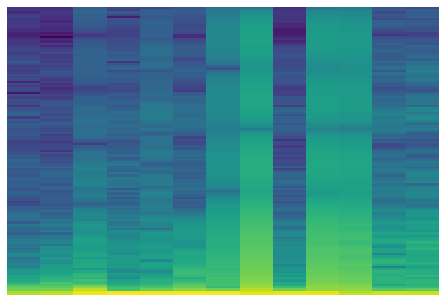

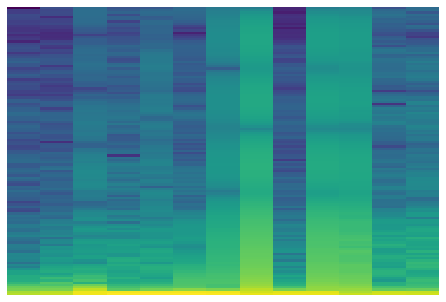

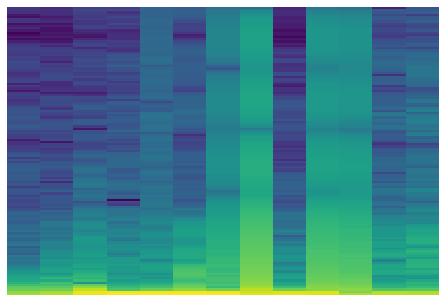

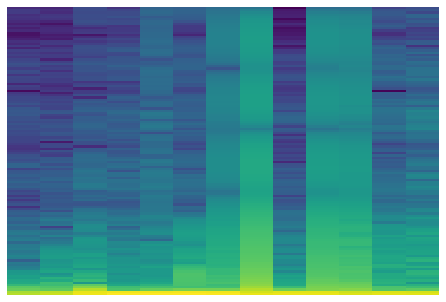

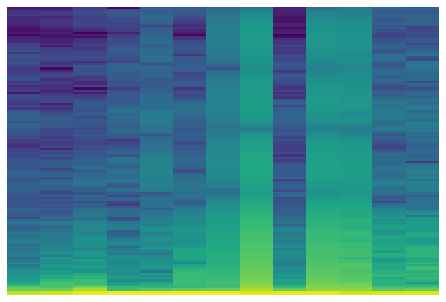

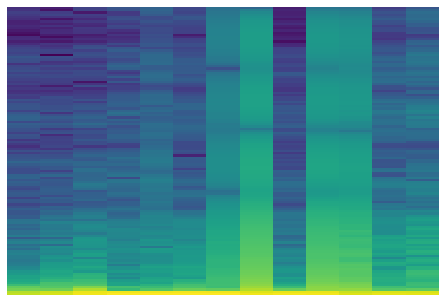

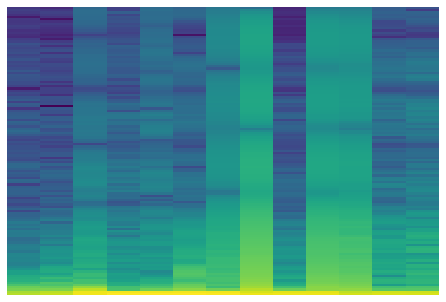

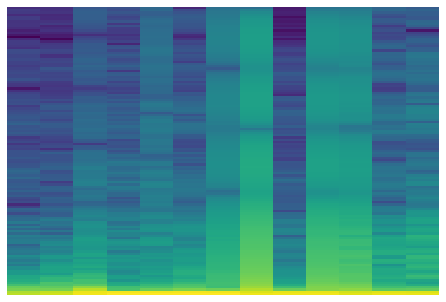

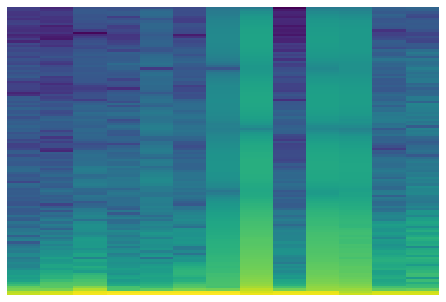

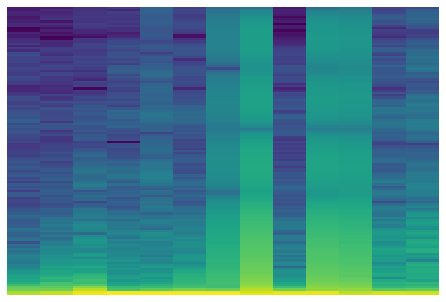

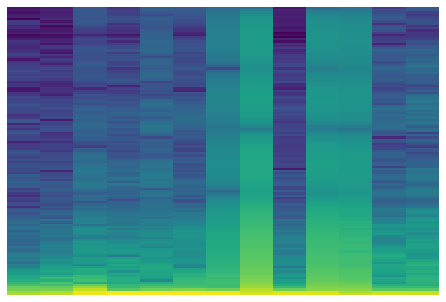

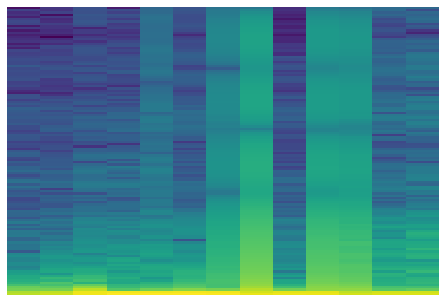

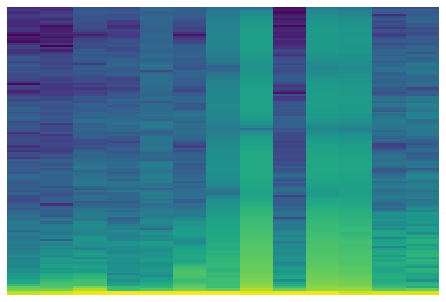

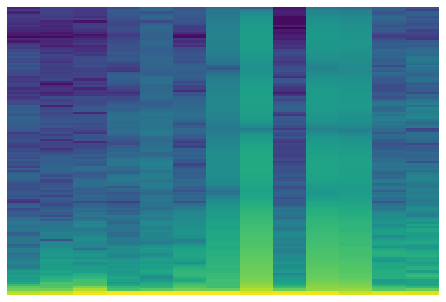

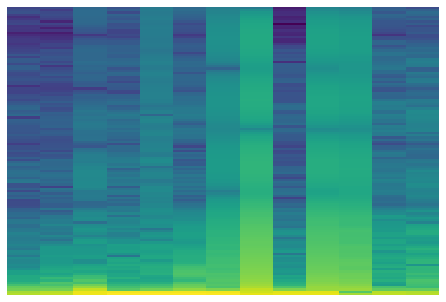

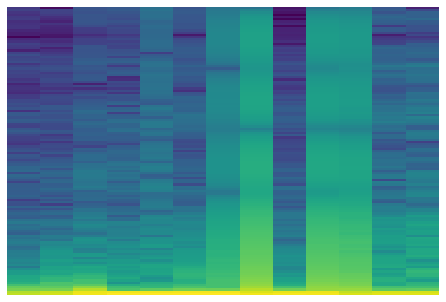

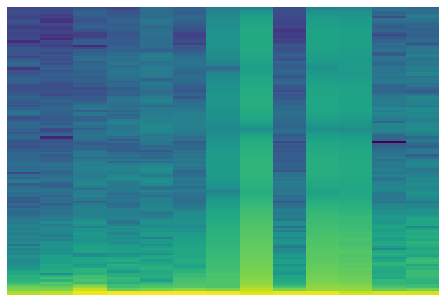

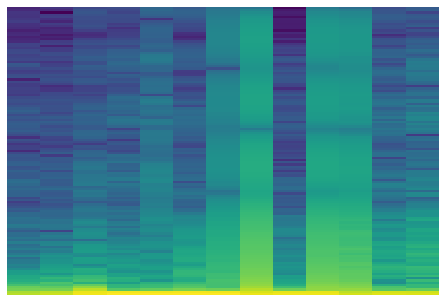

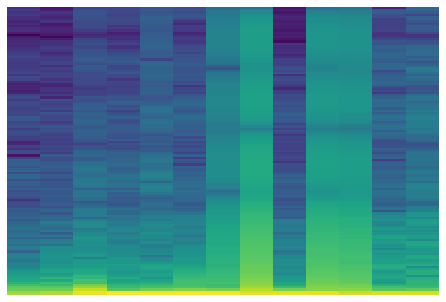

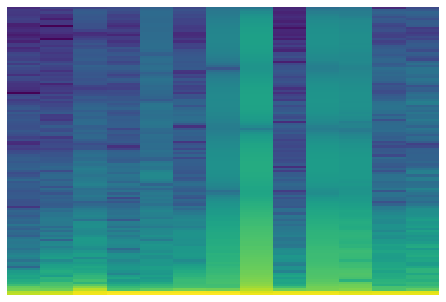

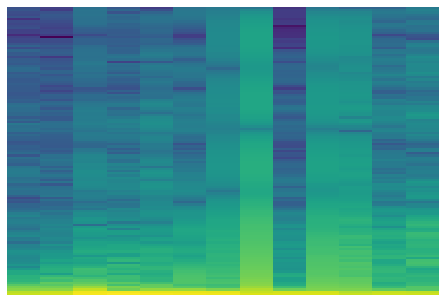

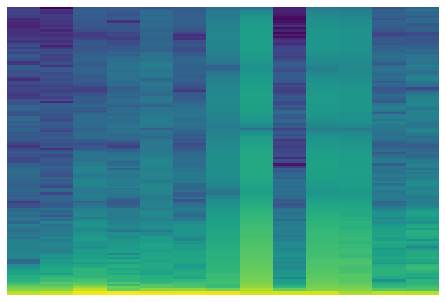

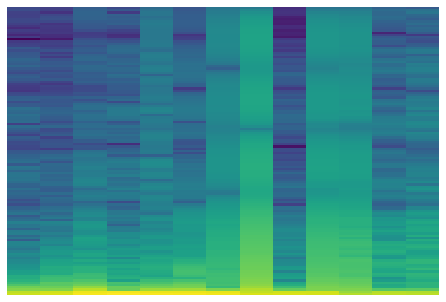

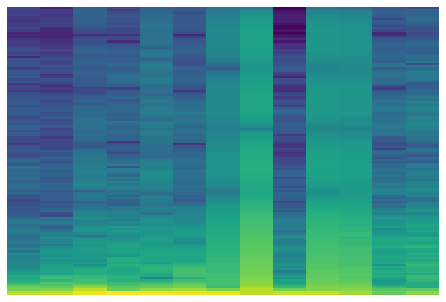

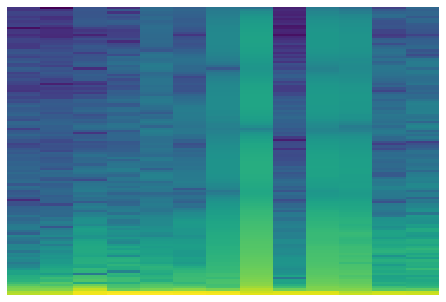

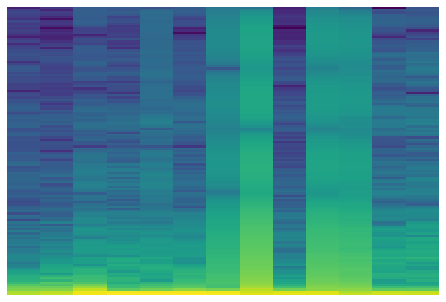

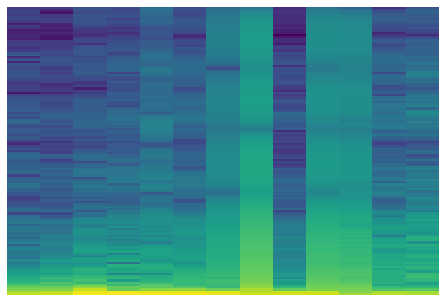

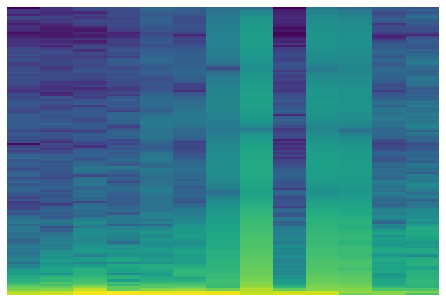

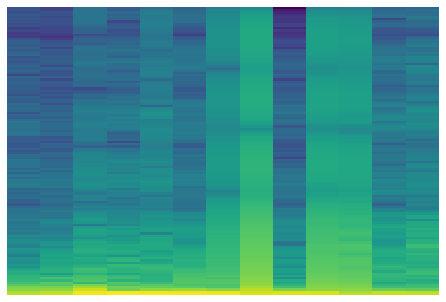

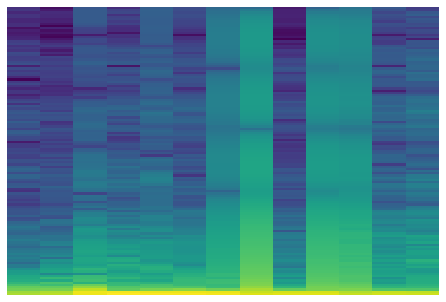

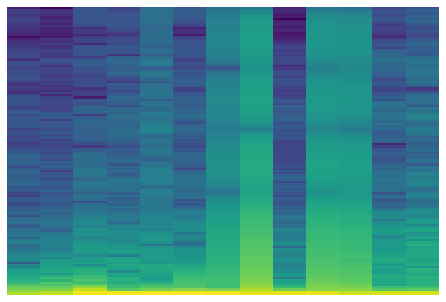

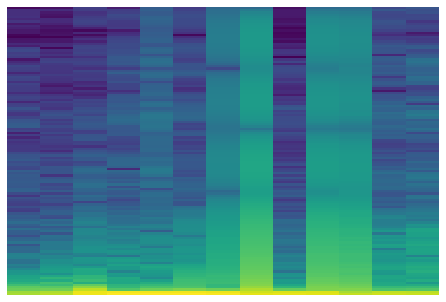

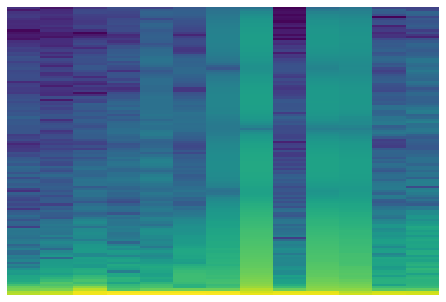

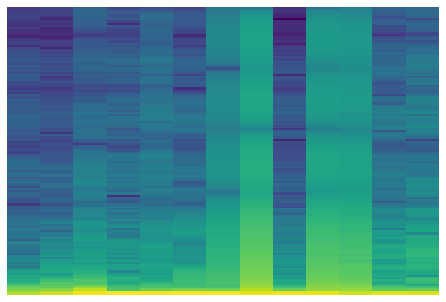

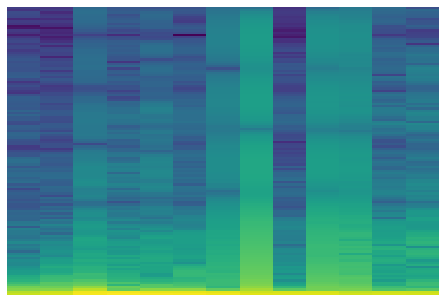

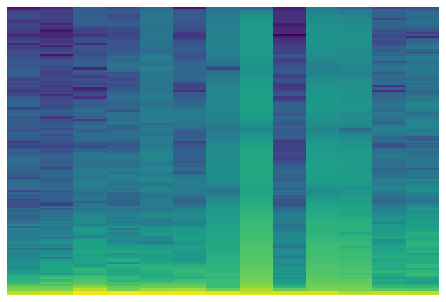

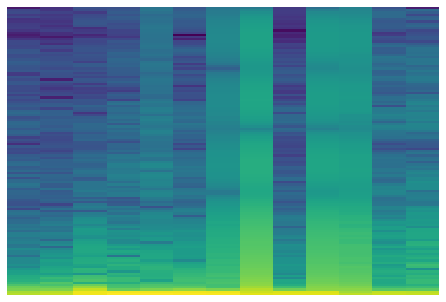

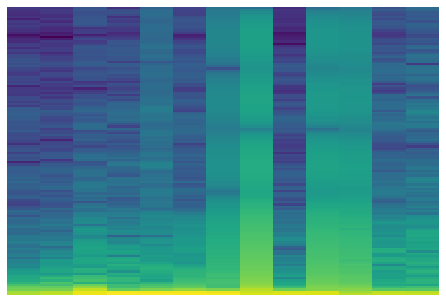

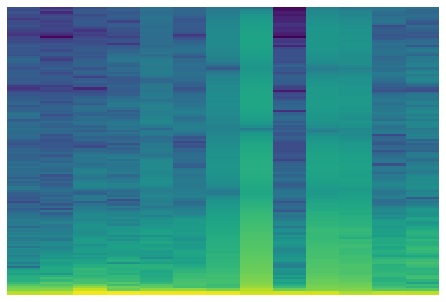

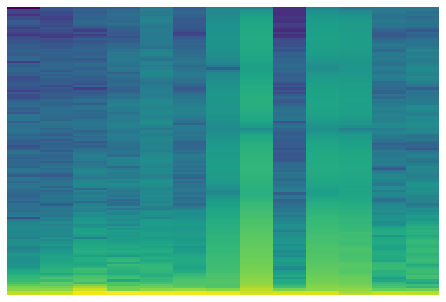

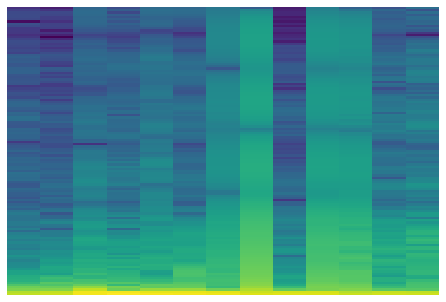

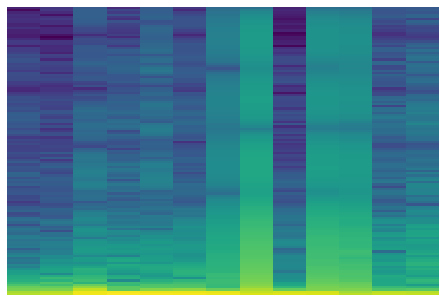

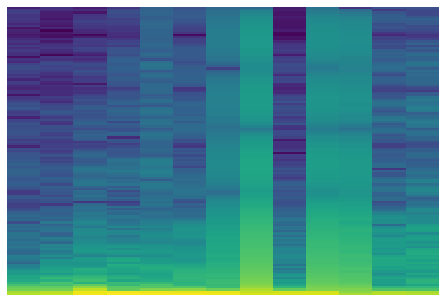

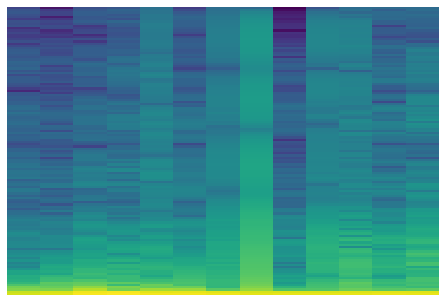

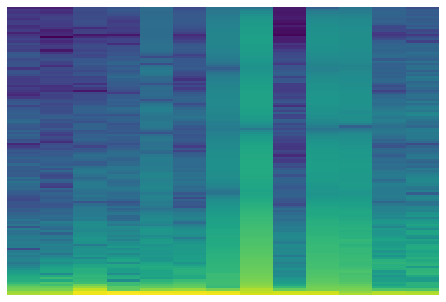

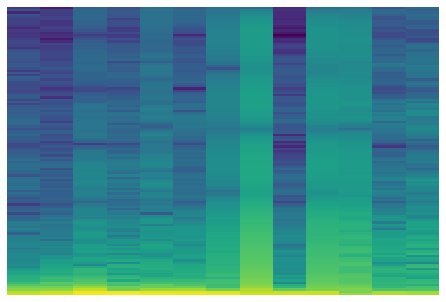

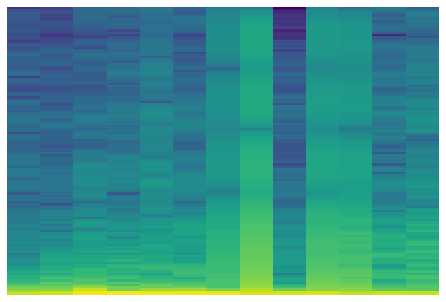

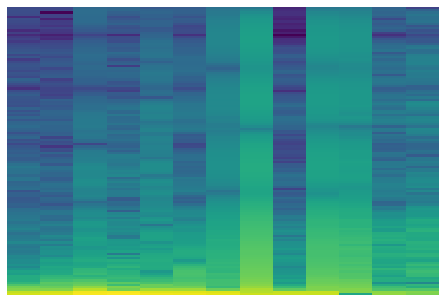

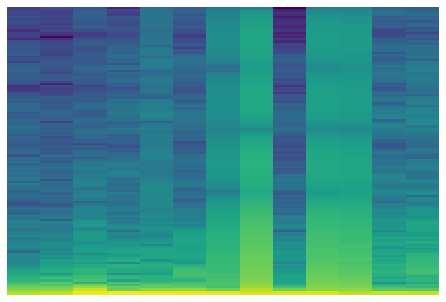

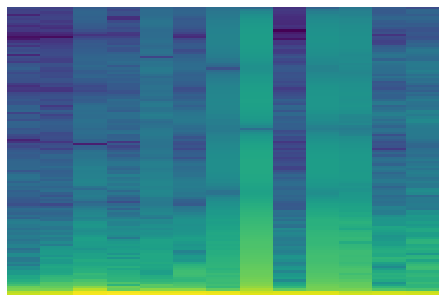

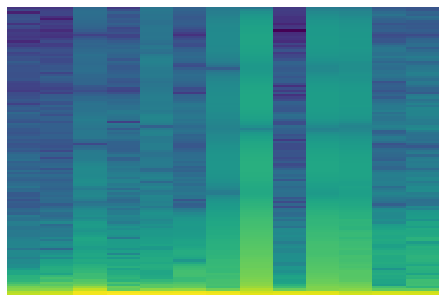

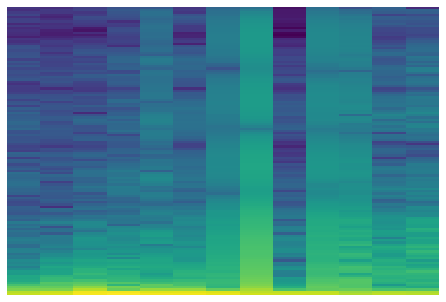

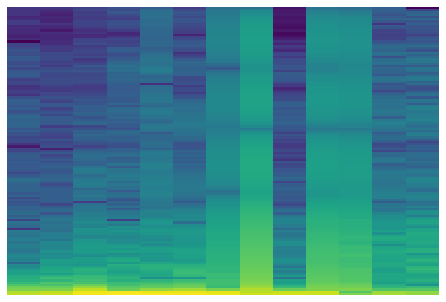

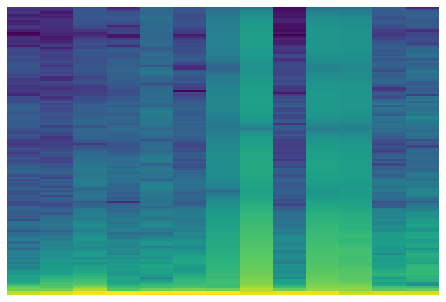

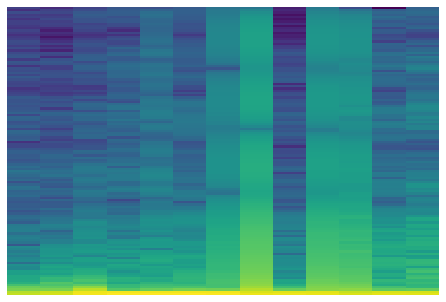

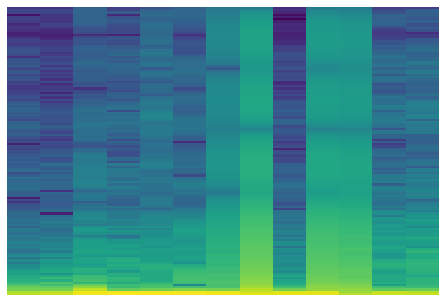

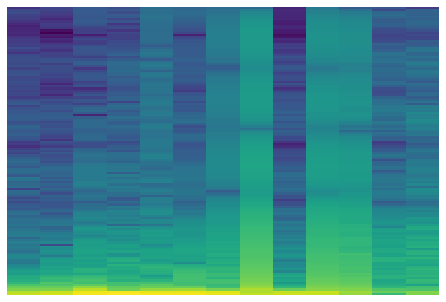

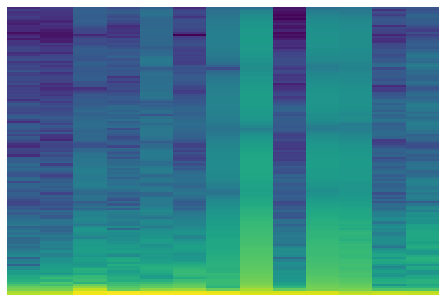

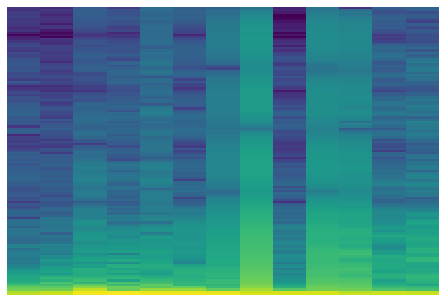

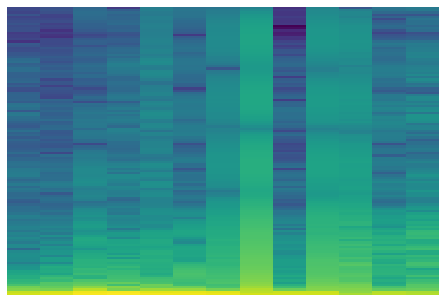

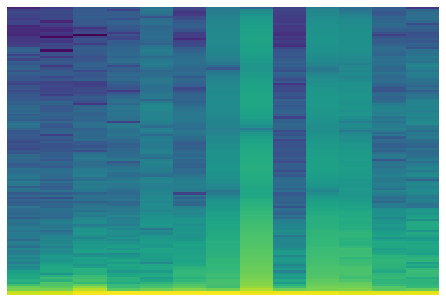

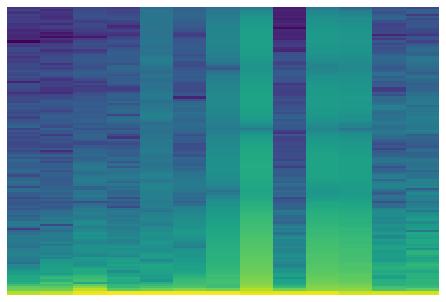

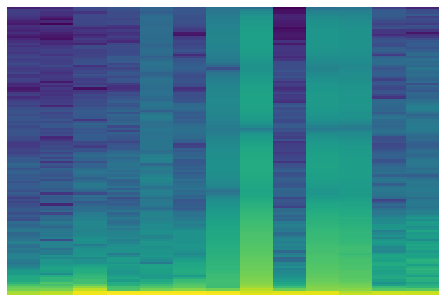

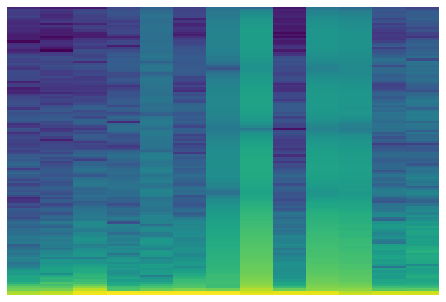

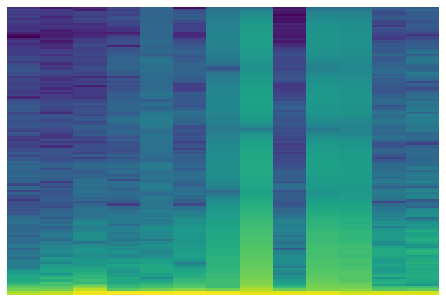

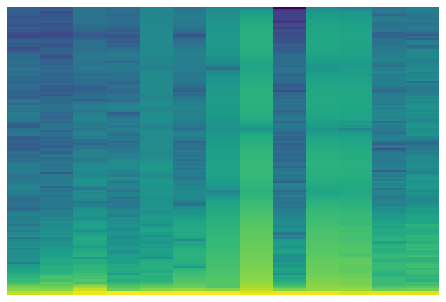

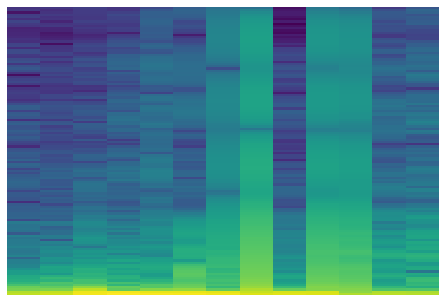

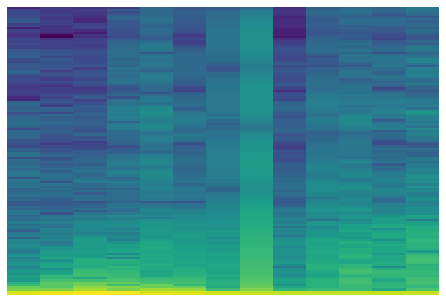

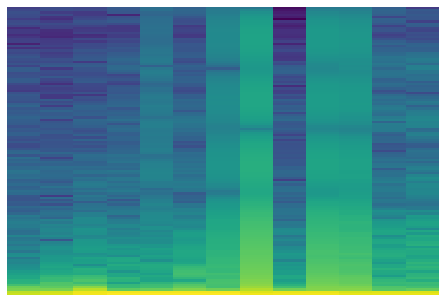

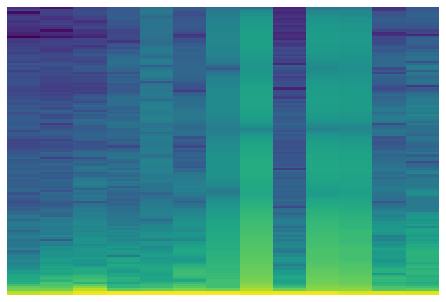

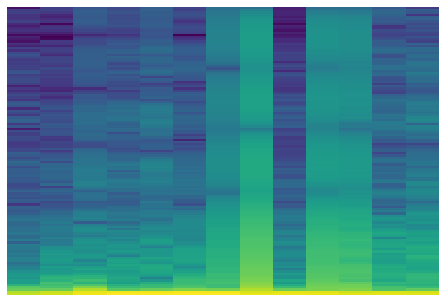

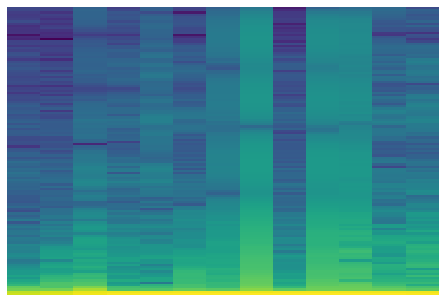

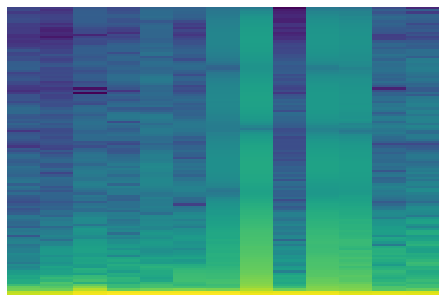

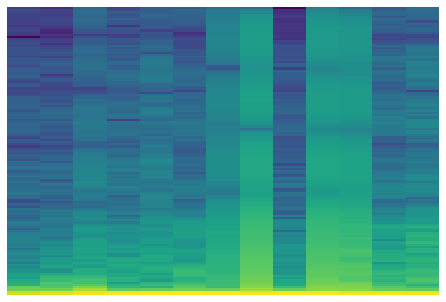

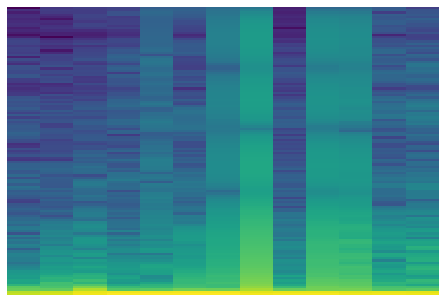

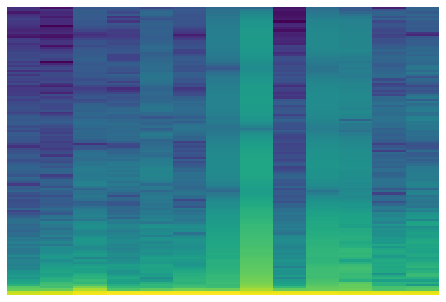

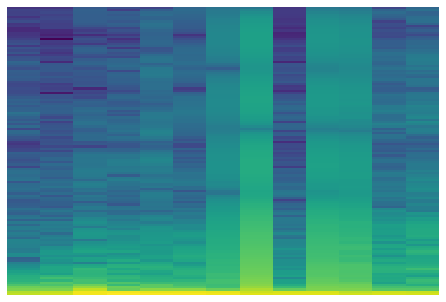

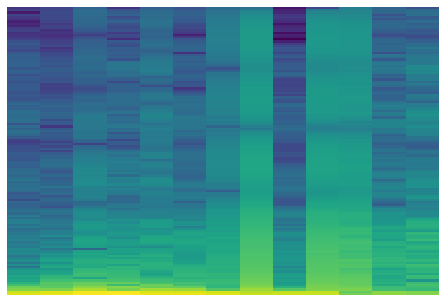

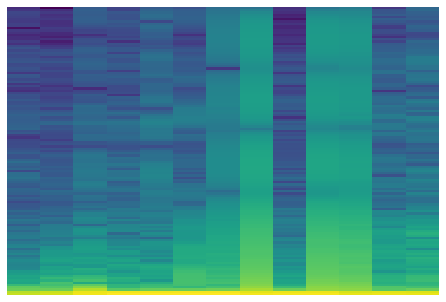

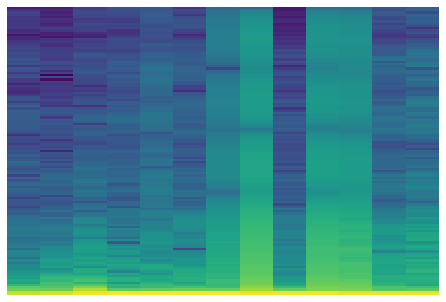

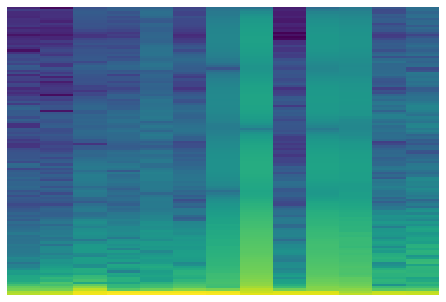

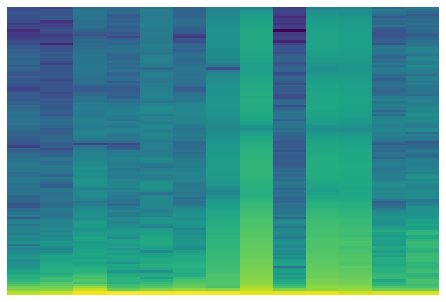

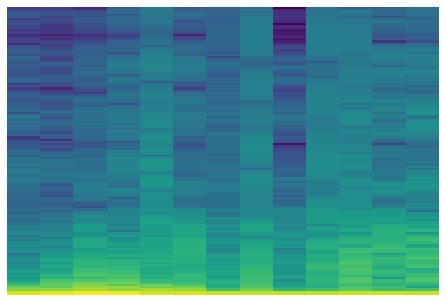

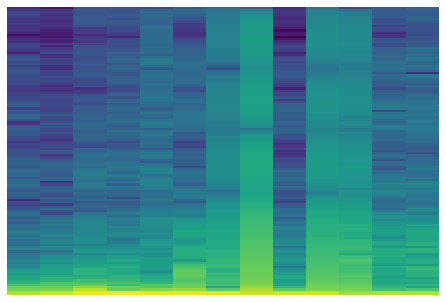

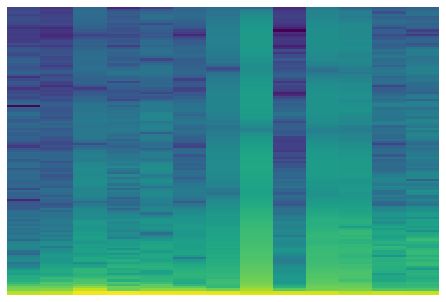

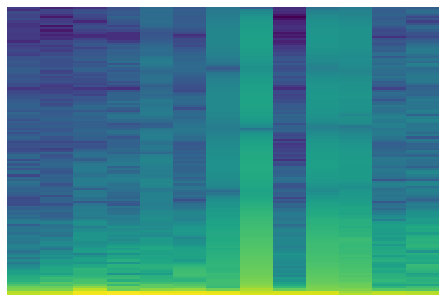

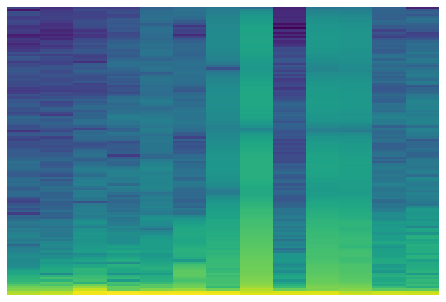

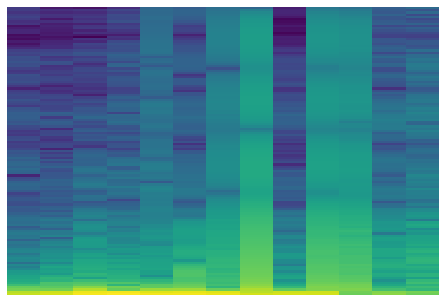

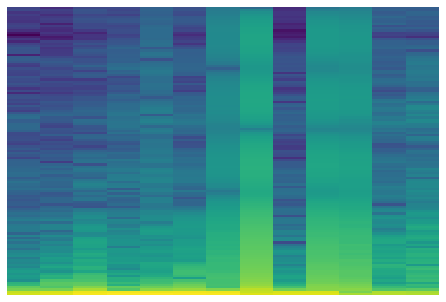

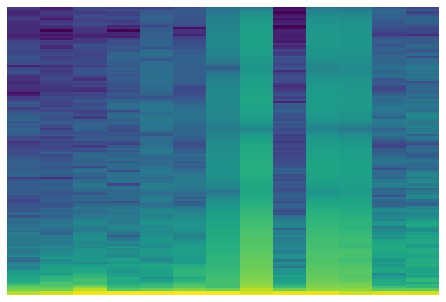

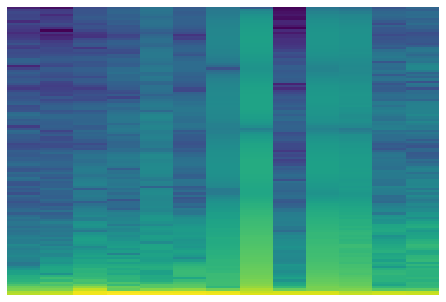

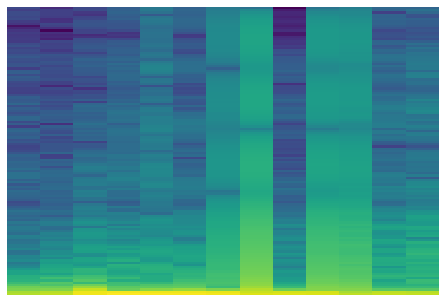

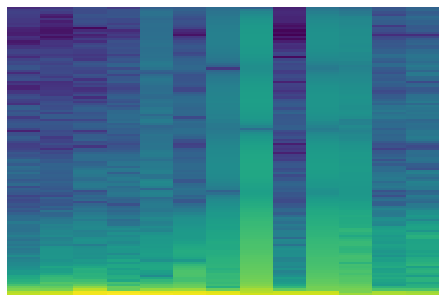

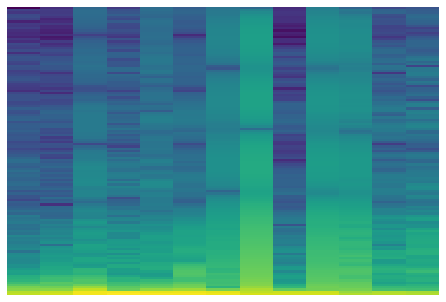

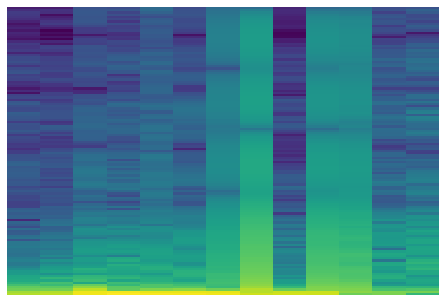

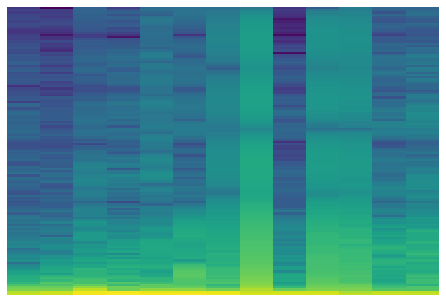

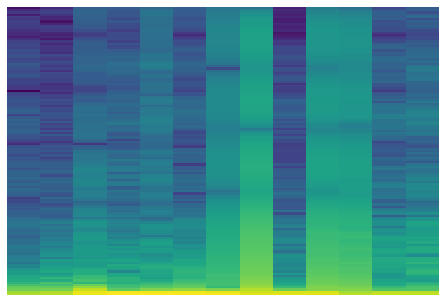

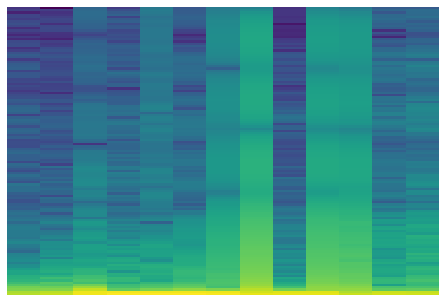

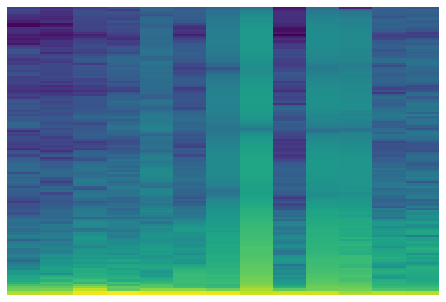

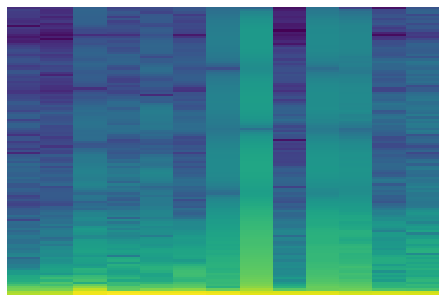

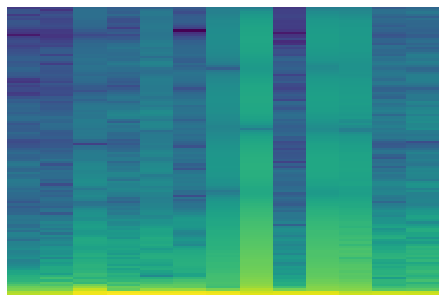

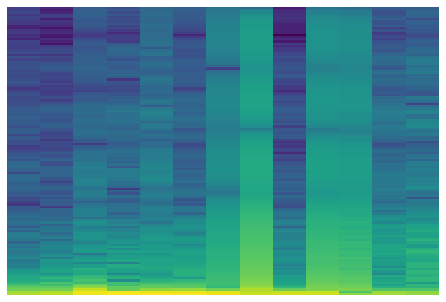

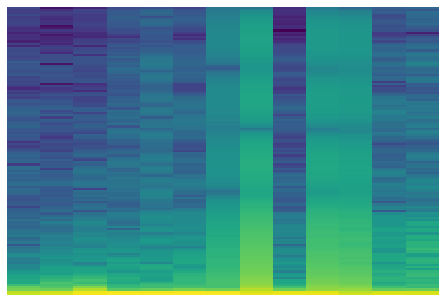

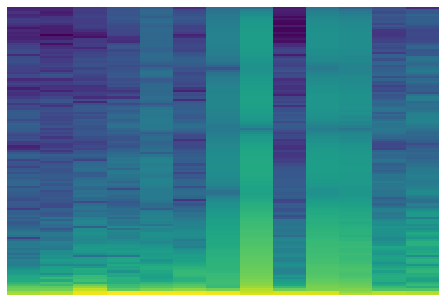

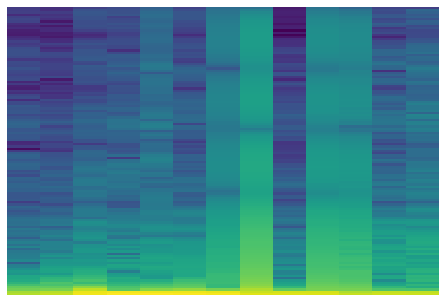

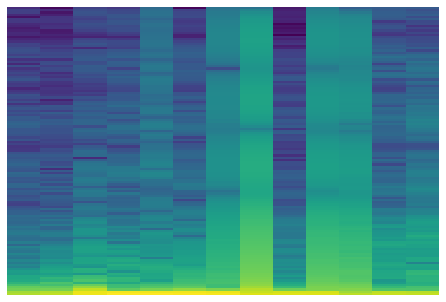

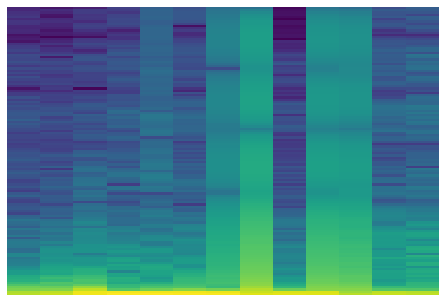

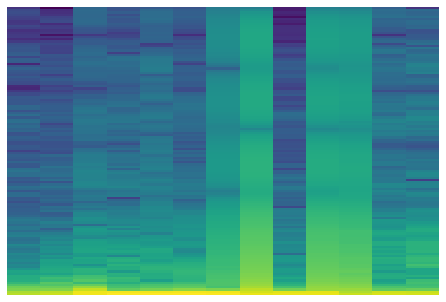

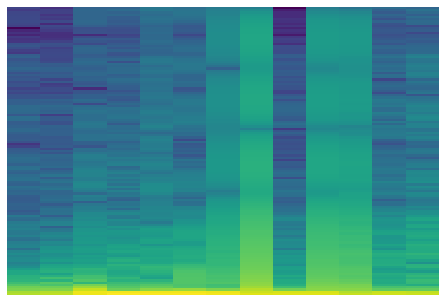

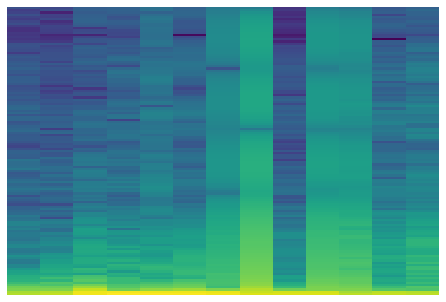

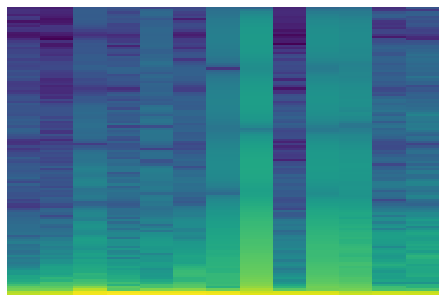

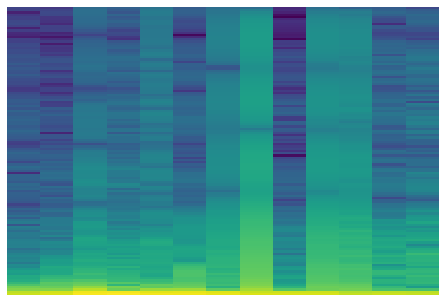

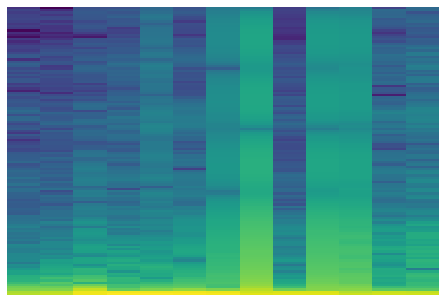

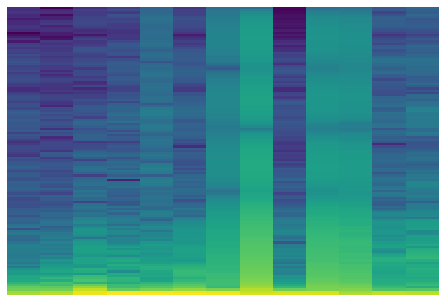

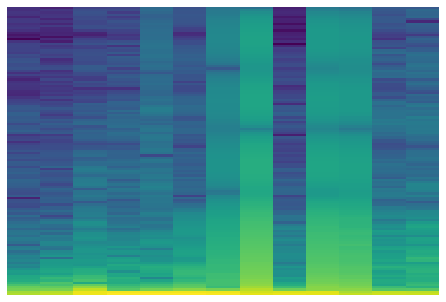

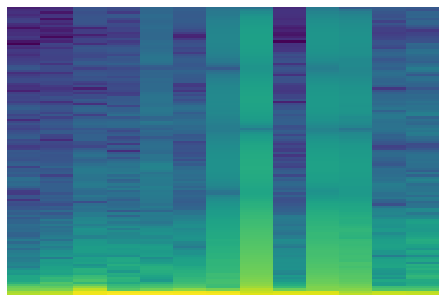

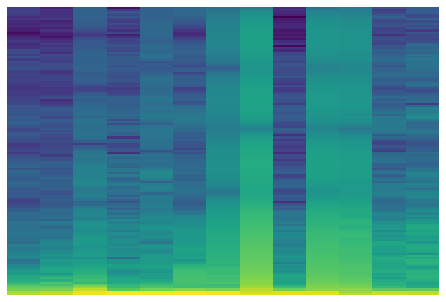

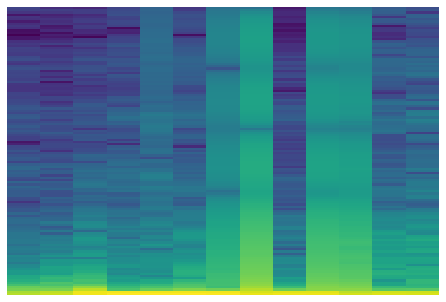

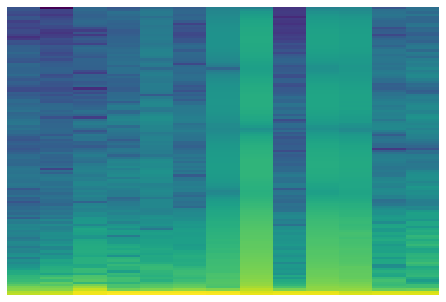

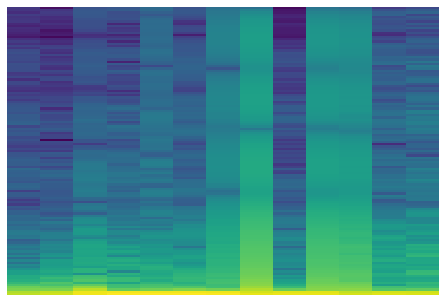

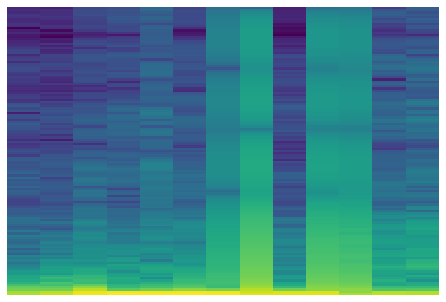

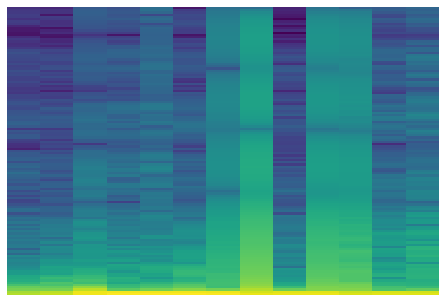

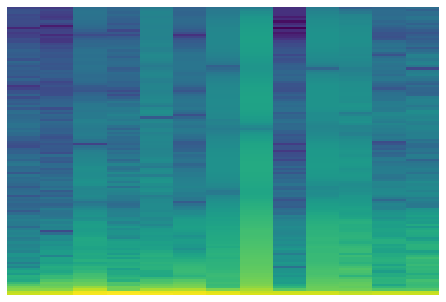

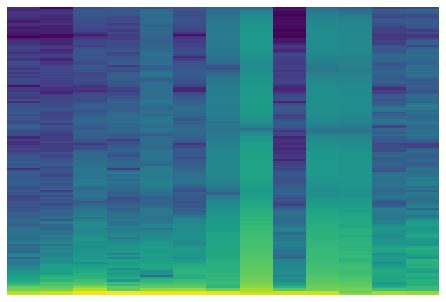

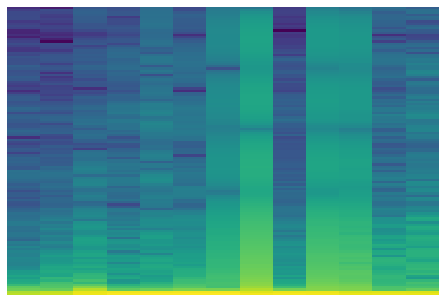

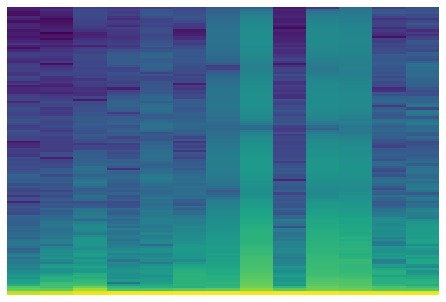

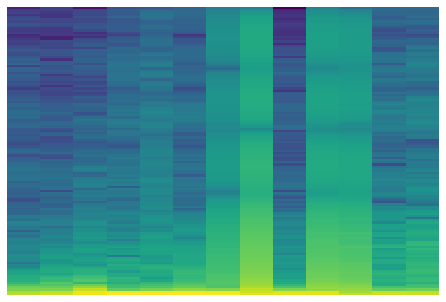

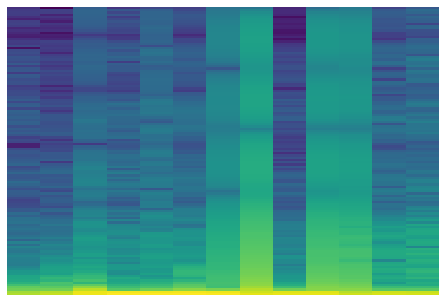

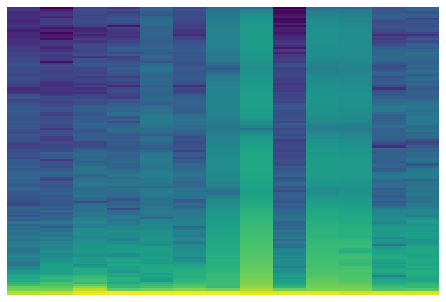

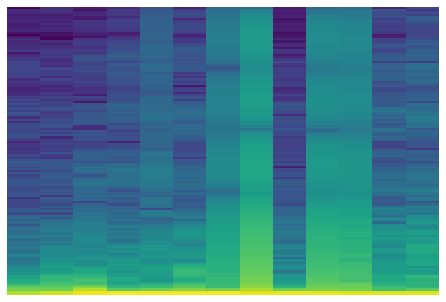

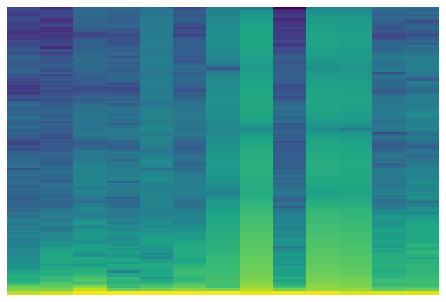

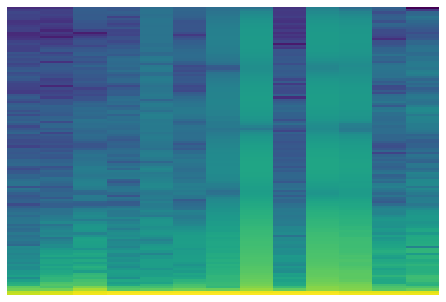

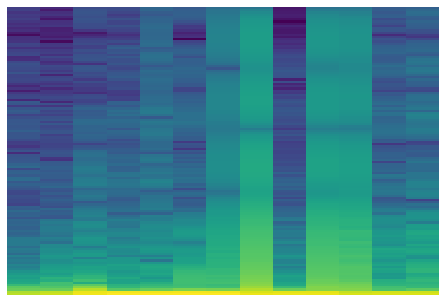

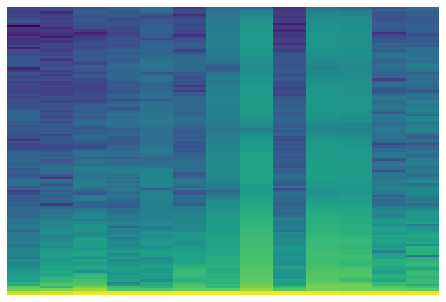

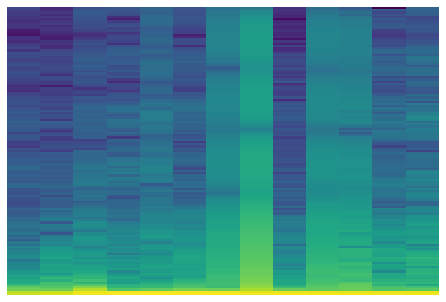

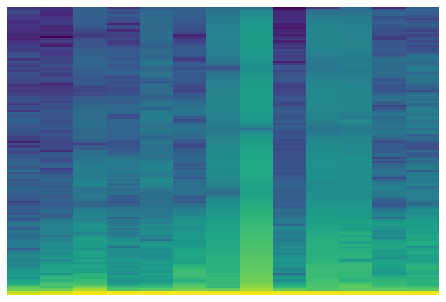

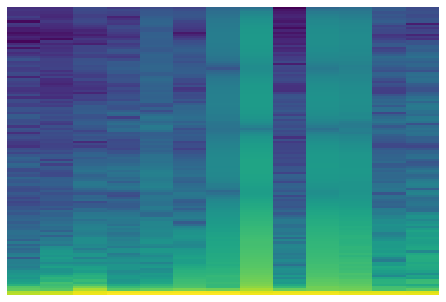

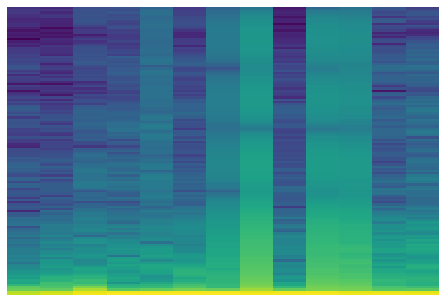

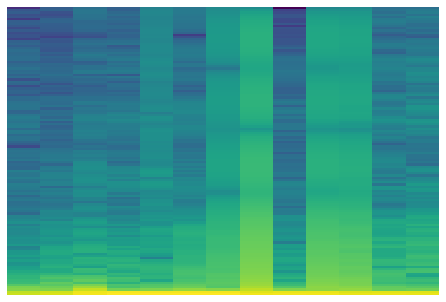

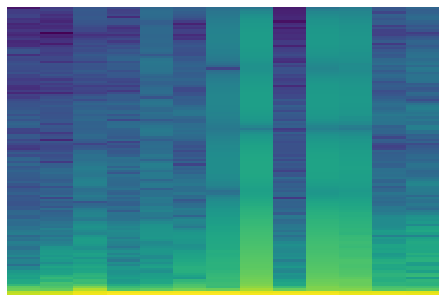

In [10]:
data_final = create_training_Data()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data_final['X_Train'], data_final['Y_Train'], test_size=0.33, random_state=0)

In [13]:
# data_final['Y_Train']

In [14]:
import tensorflow;
from tensorflow.keras import layers;
from tensorflow.keras import Model;

C:\Users\Nikhil\anaconda3\envs\data-science\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nikhil\anaconda3\envs\data-science\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nikhil\anaconda3\envs\data-science\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Nikhil\anaconda3\envs\data-science\lib\s

In [15]:
# try-1

# img_input = layers.Input(shape=(im_rows, im_cols, 3))
# x = layers.Conv2D(10, 4, activation='relu', strides = 2, padding = 'same')(img_input)
# x = layers.MaxPool2D(pool_size=2)(x)
# x = layers.Conv2D(10, 4, activation='relu', strides = 2)(x)
# x = layers.MaxPool2D(pool_size=2)(x)
# x = layers.Conv2D(10, 4, activation='relu', strides = 2)(x)
# x = layers.MaxPool2D(pool_size=2)(x)
# x = layers.Conv2D(1, 4, activation='relu', strides = 3)(x)
# output = layers.Flatten()(x)
# model = Model(img_input, output)
# model.summary()

In [16]:
# try-2

img_input = layers.Input(shape=(im_rows, im_cols, 3))
x = layers.Conv2D(100, 3, activation='relu', strides = 1, padding = 'same')(img_input)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(100, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(100, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(100, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(100, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(10, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=3)(x)
x = layers.Conv2D(1, 3, activation='relu', strides = 1)(x)
output = layers.Flatten()(x)
model = Model(img_input, output)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 432, 432, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 432, 432, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 216, 216, 100)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 214, 214, 100)     90100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 107, 107, 100)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 105, 105, 100)     90100     
_________________________________________________________________
max_

In [17]:
model.compile(loss='mean_squared_error',optimizer= 'adam', metrics=['mse']);

Instructions for updating:
Use tf.cast instead.


In [ ]:
model.fit(X_train, y_train, epochs = 3, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
224/522 [===========>..................] - ETA: 21:41 - loss: 1772.0701 - mean_squared_error: 1772.0701

In [ ]:
le = len(X_test)

In [ ]:
y_pred = model.predict(X_test.reshape(le, im_rows, im_cols, 3))

In [ ]:
# y_pred1 = np.zeros(le)
# for i in range(le):
#     y_pred1[i] = y_pred[i][0]
# y_pred1

In [ ]:
# y_test1 = np.zeros(le)
# for i in range(le):
#     y_test1[i] = y_test[i][0]
# y_test1

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
model.predict(X_train[1].reshape(1, im_rows, im_cols, 3))

In [ ]:
y_train[1]

In [ ]:
y_pred1 = np.zeros(le)
for i in range(le):
    y_pred1[i] = y_pred[i][0]
y_pred1
y_test1 = np.zeros(le)
for i in range(le):
    y_test1[i] = y_test[i][0]
# y_test1
r2_score(y_test1, y_pred1)

In [ ]:
y_test1

In [52]:
img_input = layers.Input(shape=(im_rows, im_cols, 3))
x = layers.Conv2D(100, 3, activation='relu', strides = 1, padding = 'same')(img_input)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(100, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(100, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(100, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(100, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=2)(x)
x = layers.Conv2D(10, 3, activation='relu', strides = 1)(x)
x = layers.MaxPool2D(pool_size=3)(x)
x = layers.Conv2D(1, 3, activation='relu', strides = 1)(x)
output = layers.Flatten()(x)
model = Model(img_input, output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 432, 432, 3)       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 432, 432, 100)     2800      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 216, 216, 100)     0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 214, 214, 100)     90100     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 107, 107, 100)     0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 105, 105, 100)     90100     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 52, 52, 100)       0         
__________